# Rossman Store Sales

In [1]:
#引入所需要的库
import numpy as np
import pandas as pd
from time import time
import datetime
import matplotlib.pyplot as plt
from IPython.display import display
# 设置以内联的形式显示matplotlib绘制的图片（在notebook中显示更美观）
%matplotlib inline

In [2]:
#导入数据
data = pd.read_csv('store.csv')
data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [3]:
#导入训练集观察数据
train = pd.read_csv('train.csv', parse_dates=['Date'], low_memory=False)
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
#拆分Date
train['Year']=train['Date'].dt.year
train['Month']=train['Date'].dt.month
train['Day']=train['Date'].dt.day
train['WeekOfYear']=train['Date'].dt.weekofyear

In [5]:
#测试集
test = pd.read_csv('test.csv', parse_dates=['Date'])
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [6]:
test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day']=test['Date'].dt.day
test['WeekOfYear'] = test['Date'].dt.weekofyear

In [7]:
#合并数据集 train&store
train_raw = pd.merge(data, train, on='Store', how='right')
train_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,5263,555,1,1,0,1,2015,7,31,31
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,5020,546,1,1,0,1,2015,7,30,31
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,4782,523,1,1,0,1,2015,7,29,31
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,5011,560,1,1,0,1,2015,7,28,31
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,6102,612,1,1,0,1,2015,7,27,31


In [8]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
Store                        1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null float64
CompetitionOpenSinceYear     693861 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              509178 non-null float64
Promo2SinceYear              509178 non-null float64
PromoInterval                509178 non-null object
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 n

In [9]:
#合并test&store
test_raw = pd.merge(data, test, on='Store', how='right')
test_raw.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,...,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,4,2015-09-17,1.0,1,0,0,2015,9,17,38
1,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,3,2015-09-16,1.0,1,0,0,2015,9,16,38
2,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,2,2015-09-15,1.0,1,0,0,2015,9,15,38
3,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,1,2015-09-14,1.0,1,0,0,2015,9,14,38
4,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,...,7,2015-09-13,0.0,0,0,0,2015,9,13,37


In [10]:
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41088 entries, 0 to 41087
Data columns (total 21 columns):
Store                        41088 non-null int64
StoreType                    41088 non-null object
Assortment                   41088 non-null object
CompetitionDistance          40992 non-null float64
CompetitionOpenSinceMonth    25872 non-null float64
CompetitionOpenSinceYear     25872 non-null float64
Promo2                       41088 non-null int64
Promo2SinceWeek              23856 non-null float64
Promo2SinceYear              23856 non-null float64
PromoInterval                23856 non-null object
Id                           41088 non-null int64
DayOfWeek                    41088 non-null int64
Date                         41088 non-null datetime64[ns]
Open                         41077 non-null float64
Promo                        41088 non-null int64
StateHoliday                 41088 non-null object
SchoolHoliday                41088 non-null int64
Year            

In [11]:
#将trian中open为空的填充为1
train_raw['Open'].fillna(1, inplace=True)

In [12]:
#移除销售额为0的数据
train_raw = train_raw[train_raw.Sales > 0]
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017207
Data columns (total 22 columns):
Store                        844338 non-null int64
StoreType                    844338 non-null object
Assortment                   844338 non-null object
CompetitionDistance          842152 non-null float64
CompetitionOpenSinceMonth    575738 non-null float64
CompetitionOpenSinceYear     575738 non-null float64
Promo2                       844338 non-null int64
Promo2SinceWeek              421046 non-null float64
Promo2SinceYear              421046 non-null float64
PromoInterval                421046 non-null object
DayOfWeek                    844338 non-null int64
Date                         844338 non-null datetime64[ns]
Sales                        844338 non-null int64
Customers                    844338 non-null int64
Open                         844338 non-null int64
Promo                        844338 non-null int64
StateHoliday                 844338 non-null objec

In [13]:
train_raw.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear
count,844338.000000,842152.000000,575738.000000,575738.000000,844338.000000,421046.000000,421046.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000
mean,558.421374,5458.156627,7.224842,2008.697753,0.498670,23.254177,2011.753929,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,2013.831945,5.845774,15.835706,23.646946
std,321.730861,7809.573181,3.210118,5.978064,0.499999,14.100647,1.660946,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,0.777271,3.323959,8.683392,14.389931
min,1.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,2013.000000,1.000000,1.000000,1.000000
25%,280.000000,710.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,2013.000000,3.000000,8.000000,11.000000
50%,558.000000,2320.000000,8.000000,2010.000000,0.000000,22.000000,2012.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2014.000000,6.000000,16.000000,23.000000
75%,837.000000,6890.000000,10.000000,2013.000000,1.000000,37.000000,2013.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,2014.000000,8.000000,23.000000,35.000000
max,1115.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,2015.000000,12.000000,31.000000,52.000000


In [14]:
#将test中open为空的填充为1
test_raw['Open'].fillna(1, inplace=True)

In [15]:
test_raw.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Id,DayOfWeek,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear
count,41088.000000,40992.000000,25872.000000,25872.000000,41088.000000,23856.000000,23856.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.0,41088.000000,41088.000000,41088.000000
mean,555.899533,5088.583138,7.035250,2008.641929,0.580607,24.426559,2011.820926,20544.500000,3.979167,0.854361,0.395833,0.443487,2015.0,8.354167,13.520833,34.645833
std,320.274496,7225.487467,3.143015,6.862400,0.493466,14.161312,1.692166,11861.228267,2.015481,0.352748,0.489035,0.496802,0.0,0.478266,8.448450,2.015481
min,1.000000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2015.0,8.000000,1.000000,31.000000
25%,279.750000,720.000000,4.000000,2006.000000,0.000000,13.000000,2011.000000,10272.750000,2.000000,1.000000,0.000000,0.000000,2015.0,8.000000,6.750000,33.000000
50%,553.500000,2425.000000,7.000000,2010.000000,1.000000,22.000000,2012.000000,20544.500000,4.000000,1.000000,0.000000,0.000000,2015.0,8.000000,12.500000,35.000000
75%,832.250000,6480.000000,9.000000,2012.000000,1.000000,37.000000,2013.000000,30816.250000,6.000000,1.000000,1.000000,1.000000,2015.0,9.000000,19.250000,36.000000
max,1115.000000,75860.000000,12.000000,2015.000000,1.000000,49.000000,2015.000000,41088.000000,7.000000,1.000000,1.000000,1.000000,2015.0,9.000000,31.000000,38.000000


## 一、初步进行可视化探索

#### 1.销售情况

In [ ]:
import seaborn as sns

In [ ]:
sns.barplot(x='Year', y='Sales', hue='DayOfWeek', data=train_raw)

In [ ]:
sns.barplot(x='Year',  y='Sales', hue='Month', data=train_raw)

In [ ]:
sns.barplot(x='Promo',  y='Sales', data=train_raw)

In [ ]:
sns.barplot(x='StateHoliday',  y='Sales', data=train_raw)

从上图可以看出销售量逐年递增；按月份来看，12月的销售额最多；按周来看，星期天的销售额相对较高；复活节和圣诞节销售额较大；促销能促进销售。

In [ ]:
sns.jointplot(x='Customers', y='CompetitionOpenSinceYear', data=train_raw)

In [ ]:
sns.jointplot(x='Customers', y='CompetitionDistance', data=train_raw)

## 二、数据处理

In [16]:
#整理分类变量StateHoliday除0,之外全部处理为1
dic = {'0':0, 'a':1, 'b':1, 'c':1}
train_raw.StateHoliday.replace(dic, inplace=True)


test_raw.StateHoliday.replace(dic, inplace=True)


In [17]:
#整理非数值型变量
train_raw = pd.get_dummies(train_raw)
print('Features after get_dummies:\n',list(train_raw.columns))

('Features after get_dummies:\n', ['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'])


In [18]:
test_raw = pd.get_dummies(test_raw)
print('Features after get_dummies:\n',list(test_raw.columns))

('Features after get_dummies:\n', ['Store', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'Id', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov', 'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'])


In [19]:
train_raw['StoreType_a'] = train_raw['StoreType_a'].astype(np.int64)
train_raw['StoreType_b'] = train_raw['StoreType_b'].astype(np.int64)
train_raw['StoreType_c'] = train_raw['StoreType_c'].astype(np.int64)
train_raw['StoreType_d'] = train_raw['StoreType_d'].astype(np.int64)
train_raw['Assortment_a'] = train_raw['Assortment_a'].astype(np.int64)
train_raw['Assortment_b'] = train_raw['Assortment_b'].astype(np.int64)
train_raw['Assortment_c'] = train_raw['Assortment_c'].astype(np.int64)
train_raw['PromoInterval_Feb,May,Aug,Nov'] = train_raw['PromoInterval_Feb,May,Aug,Nov'].astype(np.int64)
train_raw['PromoInterval_Jan,Apr,Jul,Oct'] = train_raw['PromoInterval_Jan,Apr,Jul,Oct'].astype(np.int64)
train_raw['PromoInterval_Mar,Jun,Sept,Dec'] = train_raw['PromoInterval_Mar,Jun,Sept,Dec'].astype(np.int64)

In [20]:
test_raw['StoreType_a'] = test_raw['StoreType_a'].astype(np.int64)
test_raw['StoreType_b'] = test_raw['StoreType_b'].astype(np.int64)
test_raw['StoreType_c'] = test_raw['StoreType_c'].astype(np.int64)
test_raw['StoreType_d'] = test_raw['StoreType_d'].astype(np.int64)
test_raw['Assortment_a'] = test_raw['Assortment_a'].astype(np.int64)
test_raw['Assortment_b'] = test_raw['Assortment_b'].astype(np.int64)
test_raw['Assortment_c'] = test_raw['Assortment_c'].astype(np.int64)
test_raw['PromoInterval_Feb,May,Aug,Nov'] = test_raw['PromoInterval_Feb,May,Aug,Nov'].astype(np.int64)
test_raw['PromoInterval_Jan,Apr,Jul,Oct'] = test_raw['PromoInterval_Jan,Apr,Jul,Oct'].astype(np.int64)
test_raw['PromoInterval_Mar,Jun,Sept,Dec'] = test_raw['PromoInterval_Mar,Jun,Sept,Dec'].astype(np.int64)

In [21]:
#处理Competition相关指标，空值默认附没有竞争对手，填入99999
train_raw['CompetitionDistance']=train_raw['CompetitionDistance'].fillna(99999)

test_raw['CompetitionDistance']=test_raw['CompetitionDistance'].fillna(99999)

In [22]:
#将CompetitionDistan做log转换
train_raw['CompetitionDistance'] = np.log(train_raw['CompetitionDistance'])

test_raw['CompetitionDistance'] = np.log(test_raw['CompetitionDistance'])

In [23]:
#对sales进行log转换
train_raw['Sales'] = np.log(train_raw['Sales'])

In [24]:
#取train_raw中后两周数据（2015-7-18~2015-7-31）作为验证集，其余做训练集
X_val = train_raw[train_raw['Date']>'7/17/2015']
X_train =train_raw[train_raw['Date']<='7/17/2015']

In [25]:
y_train = X_train['Sales']
X_train = X_train.drop('Sales', axis=1)
y_val = X_val['Sales']
X_val = X_val.drop('Sales', axis=1)

In [26]:
columns = ['Store', 'CompetitionDistance', 'Promo2', 'DayOfWeek', 'Open', 'Promo', 
            'StateHoliday', 'SchoolHoliday', 'Year', 'Month', 'Day', 'WeekOfYear', 
            'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d', 
            'Assortment_a', 'Assortment_b', 'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov', 
            'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec']
X_train = X_train[columns]
X_val = X_val[columns]

In [31]:
def rmspe(yhat, y):

    return  np.sqrt(np.mean(((y - yhat)/y) ** 2))

In [32]:
#引入XGBoost
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

#模型参数设置
clf = XGBRegressor(max_depth=10, 
                    learning_rate=0.1,
                    objective='reg:linear',
                    n_estimators=100, 
                    min_child_weight=1, 
                    subsample=0.8,
                    colsample_bytree=0.8)
eval_set = [(X_val, y_val), (X_train, y_train)]
starttime = datetime.datetime.now()
clf.fit(X_train, y_train, eval_metric='rmse', early_stopping_rounds=10, verbose = True, eval_set = eval_set)
endtime = datetime.datetime.now()

yhat = np.exp(clf.predict(X_val))
rmspe = rmspe(yhat, np.exp(y_val))
print(endtime - starttime).seconds
print('RMSPE: {:.6f}'.format(rmspe))


[0]	validation_0-rmse:7.44769	validation_1-rmse:7.44327
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:6.70371	validation_1-rmse:6.70066
[2]	validation_0-rmse:6.03477	validation_1-rmse:6.03267
[3]	validation_0-rmse:5.43443	validation_1-rmse:5.43133
[4]	validation_0-rmse:4.89259	validation_1-rmse:4.8904
[5]	validation_0-rmse:4.40703	validation_1-rmse:4.40378
[6]	validation_0-rmse:3.97081	validation_1-rmse:3.96612
[7]	validation_0-rmse:3.57761	validation_1-rmse:3.57211
[8]	validation_0-rmse:3.22243	validation_1-rmse:3.21786
[9]	validation_0-rmse:2.90456	validation_1-rmse:2.89931
[10]	validation_0-rmse:2.61725	validation_1-rmse:2.61269
[11]	validation_0-rmse:2.35964	validation_1-rmse:2.35491
[12]	validation_0-rmse:2.12965	validation_1-rmse:2.12355
[13]	validation_0-rmse:1.92237	validation_1-rmse:1.91573
[14]	validation_0-rmse:1.73608	validation_1-rmse:1.728

In [33]:
def rmspe(yhat, y):

    return  np.sqrt(np.mean(((y - yhat)/y) ** 2))

In [34]:
clf1 = xgb.XGBRegressor(max_depth=10, 
                        learning_rate=0.05,
                        objective='reg:linear',
                        n_estimators=1000, 
                        min_child_weight=1, 
                        subsample=0.8,
                        colsample_bytree=0.8)
eval_set = [(X_val, y_val), (X_train, y_train)]

starttime = datetime.datetime.now()
clf1.fit(X_train, y_train, eval_metric='rmse', early_stopping_rounds=10, verbose = True, eval_set = eval_set)
endtime = datetime.datetime.now()
yhat = np.exp(clf1.predict(X_val))
rmspe = rmspe(yhat, np.exp(y_val))
print('RMSPE: {:.6f}'.format(rmspe))
print (endtime - starttime).seconds


[0]	validation_0-rmse:7.86044	validation_1-rmse:7.85583
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:7.46832	validation_1-rmse:7.46384
[2]	validation_0-rmse:7.09556	validation_1-rmse:7.09161
[3]	validation_0-rmse:6.7424	validation_1-rmse:6.73788
[4]	validation_0-rmse:6.40609	validation_1-rmse:6.40191
[5]	validation_0-rmse:6.0876	validation_1-rmse:6.08278
[6]	validation_0-rmse:5.78447	validation_1-rmse:5.77969
[7]	validation_0-rmse:5.49737	validation_1-rmse:5.4917
[8]	validation_0-rmse:5.22333	validation_1-rmse:5.21818
[9]	validation_0-rmse:4.96426	validation_1-rmse:4.9584
[10]	validation_0-rmse:4.71761	validation_1-rmse:4.71159
[11]	validation_0-rmse:4.48334	validation_1-rmse:4.4772
[12]	validation_0-rmse:4.26075	validation_1-rmse:4.25458
[13]	validation_0-rmse:4.04997	validation_1-rmse:4.04318
[14]	validation_0-rmse:3.84947	validation_1-rmse:3.84229
[

[138]	validation_0-rmse:0.211322	validation_1-rmse:0.204644
[139]	validation_0-rmse:0.210213	validation_1-rmse:0.203463
[140]	validation_0-rmse:0.209935	validation_1-rmse:0.20319
[141]	validation_0-rmse:0.209545	validation_1-rmse:0.202797
[142]	validation_0-rmse:0.209273	validation_1-rmse:0.202506
[143]	validation_0-rmse:0.208396	validation_1-rmse:0.201961
[144]	validation_0-rmse:0.207918	validation_1-rmse:0.201489
[145]	validation_0-rmse:0.207364	validation_1-rmse:0.200921
[146]	validation_0-rmse:0.207249	validation_1-rmse:0.200742
[147]	validation_0-rmse:0.207105	validation_1-rmse:0.200612
[148]	validation_0-rmse:0.206559	validation_1-rmse:0.200055
[149]	validation_0-rmse:0.204497	validation_1-rmse:0.197821
[150]	validation_0-rmse:0.20385	validation_1-rmse:0.197502
[151]	validation_0-rmse:0.203471	validation_1-rmse:0.197073
[152]	validation_0-rmse:0.202072	validation_1-rmse:0.19555
[153]	validation_0-rmse:0.202105	validation_1-rmse:0.195392
[154]	validation_0-rmse:0.201723	validation

[275]	validation_0-rmse:0.157255	validation_1-rmse:0.146013
[276]	validation_0-rmse:0.157133	validation_1-rmse:0.145868
[277]	validation_0-rmse:0.157101	validation_1-rmse:0.145838
[278]	validation_0-rmse:0.157086	validation_1-rmse:0.145637
[279]	validation_0-rmse:0.156763	validation_1-rmse:0.145263
[280]	validation_0-rmse:0.155919	validation_1-rmse:0.14421
[281]	validation_0-rmse:0.155681	validation_1-rmse:0.143928
[282]	validation_0-rmse:0.15535	validation_1-rmse:0.143584
[283]	validation_0-rmse:0.155211	validation_1-rmse:0.143409
[284]	validation_0-rmse:0.155027	validation_1-rmse:0.143297
[285]	validation_0-rmse:0.154843	validation_1-rmse:0.143044
[286]	validation_0-rmse:0.154421	validation_1-rmse:0.142544
[287]	validation_0-rmse:0.154258	validation_1-rmse:0.142401
[288]	validation_0-rmse:0.153897	validation_1-rmse:0.142026
[289]	validation_0-rmse:0.153634	validation_1-rmse:0.141753
[290]	validation_0-rmse:0.153476	validation_1-rmse:0.141506
[291]	validation_0-rmse:0.15324	validation

[413]	validation_0-rmse:0.132722	validation_1-rmse:0.117653
[414]	validation_0-rmse:0.132657	validation_1-rmse:0.117604
[415]	validation_0-rmse:0.132576	validation_1-rmse:0.117519
[416]	validation_0-rmse:0.132429	validation_1-rmse:0.117242
[417]	validation_0-rmse:0.132315	validation_1-rmse:0.117076
[418]	validation_0-rmse:0.132075	validation_1-rmse:0.116822
[419]	validation_0-rmse:0.13202	validation_1-rmse:0.116765
[420]	validation_0-rmse:0.131976	validation_1-rmse:0.116701
[421]	validation_0-rmse:0.131769	validation_1-rmse:0.116444
[422]	validation_0-rmse:0.131736	validation_1-rmse:0.116385
[423]	validation_0-rmse:0.131695	validation_1-rmse:0.116291
[424]	validation_0-rmse:0.131582	validation_1-rmse:0.116142
[425]	validation_0-rmse:0.131425	validation_1-rmse:0.115997
[426]	validation_0-rmse:0.131282	validation_1-rmse:0.115791
[427]	validation_0-rmse:0.131154	validation_1-rmse:0.115647
[428]	validation_0-rmse:0.131035	validation_1-rmse:0.115491
[429]	validation_0-rmse:0.130899	validati

[550]	validation_0-rmse:0.122013	validation_1-rmse:0.103885
[551]	validation_0-rmse:0.121958	validation_1-rmse:0.103849
[552]	validation_0-rmse:0.121942	validation_1-rmse:0.103819
[553]	validation_0-rmse:0.121911	validation_1-rmse:0.103779
[554]	validation_0-rmse:0.121858	validation_1-rmse:0.103719
[555]	validation_0-rmse:0.121805	validation_1-rmse:0.10365
[556]	validation_0-rmse:0.121775	validation_1-rmse:0.103636
[557]	validation_0-rmse:0.121734	validation_1-rmse:0.103564
[558]	validation_0-rmse:0.121627	validation_1-rmse:0.103438
[559]	validation_0-rmse:0.121579	validation_1-rmse:0.103372
[560]	validation_0-rmse:0.121481	validation_1-rmse:0.103252
[561]	validation_0-rmse:0.121413	validation_1-rmse:0.103157
[562]	validation_0-rmse:0.121357	validation_1-rmse:0.103068
[563]	validation_0-rmse:0.121356	validation_1-rmse:0.103
[564]	validation_0-rmse:0.121397	validation_1-rmse:0.102961
[565]	validation_0-rmse:0.121333	validation_1-rmse:0.102886
[566]	validation_0-rmse:0.121282	validation_

[687]	validation_0-rmse:0.115783	validation_1-rmse:0.095672
[688]	validation_0-rmse:0.115726	validation_1-rmse:0.095587
[689]	validation_0-rmse:0.115678	validation_1-rmse:0.095539
[690]	validation_0-rmse:0.115638	validation_1-rmse:0.095483
[691]	validation_0-rmse:0.115613	validation_1-rmse:0.095452
[692]	validation_0-rmse:0.115581	validation_1-rmse:0.095374
[693]	validation_0-rmse:0.115543	validation_1-rmse:0.095337
[694]	validation_0-rmse:0.115501	validation_1-rmse:0.095271
[695]	validation_0-rmse:0.11539	validation_1-rmse:0.095225
[696]	validation_0-rmse:0.115356	validation_1-rmse:0.095163
[697]	validation_0-rmse:0.115319	validation_1-rmse:0.095112
[698]	validation_0-rmse:0.115276	validation_1-rmse:0.095064
[699]	validation_0-rmse:0.115192	validation_1-rmse:0.094972
[700]	validation_0-rmse:0.11512	validation_1-rmse:0.094892
[701]	validation_0-rmse:0.115093	validation_1-rmse:0.094857
[702]	validation_0-rmse:0.115088	validation_1-rmse:0.09485
[703]	validation_0-rmse:0.11504	validation_

[824]	validation_0-rmse:0.11196	validation_1-rmse:0.089849
[825]	validation_0-rmse:0.111939	validation_1-rmse:0.089799
[826]	validation_0-rmse:0.11193	validation_1-rmse:0.089784
[827]	validation_0-rmse:0.111904	validation_1-rmse:0.089765
[828]	validation_0-rmse:0.111888	validation_1-rmse:0.089737
[829]	validation_0-rmse:0.111888	validation_1-rmse:0.089711
[830]	validation_0-rmse:0.111873	validation_1-rmse:0.089681
[831]	validation_0-rmse:0.111827	validation_1-rmse:0.08962
[832]	validation_0-rmse:0.111814	validation_1-rmse:0.089605
[833]	validation_0-rmse:0.11179	validation_1-rmse:0.089571
[834]	validation_0-rmse:0.111776	validation_1-rmse:0.089541
[835]	validation_0-rmse:0.11174	validation_1-rmse:0.089471
[836]	validation_0-rmse:0.111728	validation_1-rmse:0.08945
[837]	validation_0-rmse:0.111719	validation_1-rmse:0.089426
[838]	validation_0-rmse:0.111708	validation_1-rmse:0.089412
[839]	validation_0-rmse:0.111687	validation_1-rmse:0.089381
[840]	validation_0-rmse:0.111669	validation_1-

[962]	validation_0-rmse:0.109704	validation_1-rmse:0.085925
[963]	validation_0-rmse:0.109686	validation_1-rmse:0.085905
[964]	validation_0-rmse:0.109682	validation_1-rmse:0.085884
[965]	validation_0-rmse:0.109664	validation_1-rmse:0.085867
[966]	validation_0-rmse:0.109594	validation_1-rmse:0.085832
[967]	validation_0-rmse:0.109584	validation_1-rmse:0.085814
[968]	validation_0-rmse:0.109569	validation_1-rmse:0.08579
[969]	validation_0-rmse:0.109548	validation_1-rmse:0.085761
[970]	validation_0-rmse:0.109535	validation_1-rmse:0.085741
[971]	validation_0-rmse:0.109527	validation_1-rmse:0.085724
[972]	validation_0-rmse:0.109515	validation_1-rmse:0.085698
[973]	validation_0-rmse:0.109512	validation_1-rmse:0.085675
[974]	validation_0-rmse:0.109489	validation_1-rmse:0.085652
[975]	validation_0-rmse:0.109488	validation_1-rmse:0.085637
[976]	validation_0-rmse:0.109474	validation_1-rmse:0.08561
[977]	validation_0-rmse:0.109446	validation_1-rmse:0.085578
[978]	validation_0-rmse:0.109442	validatio

In [39]:
def rmspe(yhat, y):

    return  np.sqrt(np.mean(((y - yhat)/y) ** 2))

In [40]:
clf2 = xgb.XGBRegressor(max_depth=10, 
                        learning_rate=0.05,
                        objective='reg:linear',
                        n_estimators=2000, 
                        min_child_weight=1, 
                        subsample=0.8,
                        colsample_bytree=0.8)
eval_set = [(X_val, y_val), (X_train, y_train)]
starttime = datetime.datetime.now()
clf2.fit(X_train, y_train, eval_metric='rmse', early_stopping_rounds=10, verbose = True, eval_set = eval_set)
endtime = datetime.datetime.now()
yhat = np.exp(clf2.predict(X_val))
rmspe = rmspe(yhat, np.exp(y_val))
print('RMSPE: {:.6f}'.format(rmspe))
print (endtime - starttime).seconds

[0]	validation_0-rmse:7.86044	validation_1-rmse:7.85583
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:7.46832	validation_1-rmse:7.46384
[2]	validation_0-rmse:7.09556	validation_1-rmse:7.09161
[3]	validation_0-rmse:6.7424	validation_1-rmse:6.73788
[4]	validation_0-rmse:6.40609	validation_1-rmse:6.40191
[5]	validation_0-rmse:6.0876	validation_1-rmse:6.08278
[6]	validation_0-rmse:5.78447	validation_1-rmse:5.77969
[7]	validation_0-rmse:5.49737	validation_1-rmse:5.4917
[8]	validation_0-rmse:5.22333	validation_1-rmse:5.21818
[9]	validation_0-rmse:4.96426	validation_1-rmse:4.9584
[10]	validation_0-rmse:4.71761	validation_1-rmse:4.71159
[11]	validation_0-rmse:4.48334	validation_1-rmse:4.4772
[12]	validation_0-rmse:4.26075	validation_1-rmse:4.25458
[13]	validation_0-rmse:4.04997	validation_1-rmse:4.04318
[14]	validation_0-rmse:3.84947	validation_1-rmse:3.84229
[

[138]	validation_0-rmse:0.211322	validation_1-rmse:0.204644
[139]	validation_0-rmse:0.210213	validation_1-rmse:0.203463
[140]	validation_0-rmse:0.209935	validation_1-rmse:0.20319
[141]	validation_0-rmse:0.209545	validation_1-rmse:0.202797
[142]	validation_0-rmse:0.209273	validation_1-rmse:0.202506
[143]	validation_0-rmse:0.208396	validation_1-rmse:0.201961
[144]	validation_0-rmse:0.207918	validation_1-rmse:0.201489
[145]	validation_0-rmse:0.207364	validation_1-rmse:0.200921
[146]	validation_0-rmse:0.207249	validation_1-rmse:0.200742
[147]	validation_0-rmse:0.207105	validation_1-rmse:0.200612
[148]	validation_0-rmse:0.206559	validation_1-rmse:0.200055
[149]	validation_0-rmse:0.204497	validation_1-rmse:0.197821
[150]	validation_0-rmse:0.20385	validation_1-rmse:0.197502
[151]	validation_0-rmse:0.203471	validation_1-rmse:0.197073
[152]	validation_0-rmse:0.202072	validation_1-rmse:0.19555
[153]	validation_0-rmse:0.202105	validation_1-rmse:0.195392
[154]	validation_0-rmse:0.201723	validation

[275]	validation_0-rmse:0.157255	validation_1-rmse:0.146013
[276]	validation_0-rmse:0.157133	validation_1-rmse:0.145868
[277]	validation_0-rmse:0.157101	validation_1-rmse:0.145838
[278]	validation_0-rmse:0.157086	validation_1-rmse:0.145637
[279]	validation_0-rmse:0.156763	validation_1-rmse:0.145263
[280]	validation_0-rmse:0.155919	validation_1-rmse:0.14421
[281]	validation_0-rmse:0.155681	validation_1-rmse:0.143928
[282]	validation_0-rmse:0.15535	validation_1-rmse:0.143584
[283]	validation_0-rmse:0.155211	validation_1-rmse:0.143409
[284]	validation_0-rmse:0.155027	validation_1-rmse:0.143297
[285]	validation_0-rmse:0.154843	validation_1-rmse:0.143044
[286]	validation_0-rmse:0.154421	validation_1-rmse:0.142544
[287]	validation_0-rmse:0.154258	validation_1-rmse:0.142401
[288]	validation_0-rmse:0.153897	validation_1-rmse:0.142026
[289]	validation_0-rmse:0.153634	validation_1-rmse:0.141753
[290]	validation_0-rmse:0.153476	validation_1-rmse:0.141506
[291]	validation_0-rmse:0.15324	validation

[413]	validation_0-rmse:0.132722	validation_1-rmse:0.117653
[414]	validation_0-rmse:0.132657	validation_1-rmse:0.117604
[415]	validation_0-rmse:0.132576	validation_1-rmse:0.117519
[416]	validation_0-rmse:0.132429	validation_1-rmse:0.117242
[417]	validation_0-rmse:0.132315	validation_1-rmse:0.117076
[418]	validation_0-rmse:0.132075	validation_1-rmse:0.116822
[419]	validation_0-rmse:0.13202	validation_1-rmse:0.116765
[420]	validation_0-rmse:0.131976	validation_1-rmse:0.116701
[421]	validation_0-rmse:0.131769	validation_1-rmse:0.116444
[422]	validation_0-rmse:0.131736	validation_1-rmse:0.116385
[423]	validation_0-rmse:0.131695	validation_1-rmse:0.116291
[424]	validation_0-rmse:0.131582	validation_1-rmse:0.116142
[425]	validation_0-rmse:0.131425	validation_1-rmse:0.115997
[426]	validation_0-rmse:0.131282	validation_1-rmse:0.115791
[427]	validation_0-rmse:0.131154	validation_1-rmse:0.115647
[428]	validation_0-rmse:0.131035	validation_1-rmse:0.115491
[429]	validation_0-rmse:0.130899	validati

[550]	validation_0-rmse:0.122013	validation_1-rmse:0.103885
[551]	validation_0-rmse:0.121958	validation_1-rmse:0.103849
[552]	validation_0-rmse:0.121942	validation_1-rmse:0.103819
[553]	validation_0-rmse:0.121911	validation_1-rmse:0.103779
[554]	validation_0-rmse:0.121858	validation_1-rmse:0.103719
[555]	validation_0-rmse:0.121805	validation_1-rmse:0.10365
[556]	validation_0-rmse:0.121775	validation_1-rmse:0.103636
[557]	validation_0-rmse:0.121734	validation_1-rmse:0.103564
[558]	validation_0-rmse:0.121627	validation_1-rmse:0.103438
[559]	validation_0-rmse:0.121579	validation_1-rmse:0.103372
[560]	validation_0-rmse:0.121481	validation_1-rmse:0.103252
[561]	validation_0-rmse:0.121413	validation_1-rmse:0.103157
[562]	validation_0-rmse:0.121357	validation_1-rmse:0.103068
[563]	validation_0-rmse:0.121356	validation_1-rmse:0.103
[564]	validation_0-rmse:0.121397	validation_1-rmse:0.102961
[565]	validation_0-rmse:0.121333	validation_1-rmse:0.102886
[566]	validation_0-rmse:0.121282	validation_

[687]	validation_0-rmse:0.115783	validation_1-rmse:0.095672
[688]	validation_0-rmse:0.115726	validation_1-rmse:0.095587
[689]	validation_0-rmse:0.115678	validation_1-rmse:0.095539
[690]	validation_0-rmse:0.115638	validation_1-rmse:0.095483
[691]	validation_0-rmse:0.115613	validation_1-rmse:0.095452
[692]	validation_0-rmse:0.115581	validation_1-rmse:0.095374
[693]	validation_0-rmse:0.115543	validation_1-rmse:0.095337
[694]	validation_0-rmse:0.115501	validation_1-rmse:0.095271
[695]	validation_0-rmse:0.11539	validation_1-rmse:0.095225
[696]	validation_0-rmse:0.115356	validation_1-rmse:0.095163
[697]	validation_0-rmse:0.115319	validation_1-rmse:0.095112
[698]	validation_0-rmse:0.115276	validation_1-rmse:0.095064
[699]	validation_0-rmse:0.115192	validation_1-rmse:0.094972
[700]	validation_0-rmse:0.11512	validation_1-rmse:0.094892
[701]	validation_0-rmse:0.115093	validation_1-rmse:0.094857
[702]	validation_0-rmse:0.115088	validation_1-rmse:0.09485
[703]	validation_0-rmse:0.11504	validation_

[824]	validation_0-rmse:0.11196	validation_1-rmse:0.089849
[825]	validation_0-rmse:0.111939	validation_1-rmse:0.089799
[826]	validation_0-rmse:0.11193	validation_1-rmse:0.089784
[827]	validation_0-rmse:0.111904	validation_1-rmse:0.089765
[828]	validation_0-rmse:0.111888	validation_1-rmse:0.089737
[829]	validation_0-rmse:0.111888	validation_1-rmse:0.089711
[830]	validation_0-rmse:0.111873	validation_1-rmse:0.089681
[831]	validation_0-rmse:0.111827	validation_1-rmse:0.08962
[832]	validation_0-rmse:0.111814	validation_1-rmse:0.089605
[833]	validation_0-rmse:0.11179	validation_1-rmse:0.089571
[834]	validation_0-rmse:0.111776	validation_1-rmse:0.089541
[835]	validation_0-rmse:0.11174	validation_1-rmse:0.089471
[836]	validation_0-rmse:0.111728	validation_1-rmse:0.08945
[837]	validation_0-rmse:0.111719	validation_1-rmse:0.089426
[838]	validation_0-rmse:0.111708	validation_1-rmse:0.089412
[839]	validation_0-rmse:0.111687	validation_1-rmse:0.089381
[840]	validation_0-rmse:0.111669	validation_1-

[962]	validation_0-rmse:0.109704	validation_1-rmse:0.085925
[963]	validation_0-rmse:0.109686	validation_1-rmse:0.085905
[964]	validation_0-rmse:0.109682	validation_1-rmse:0.085884
[965]	validation_0-rmse:0.109664	validation_1-rmse:0.085867
[966]	validation_0-rmse:0.109594	validation_1-rmse:0.085832
[967]	validation_0-rmse:0.109584	validation_1-rmse:0.085814
[968]	validation_0-rmse:0.109569	validation_1-rmse:0.08579
[969]	validation_0-rmse:0.109548	validation_1-rmse:0.085761
[970]	validation_0-rmse:0.109535	validation_1-rmse:0.085741
[971]	validation_0-rmse:0.109527	validation_1-rmse:0.085724
[972]	validation_0-rmse:0.109515	validation_1-rmse:0.085698
[973]	validation_0-rmse:0.109512	validation_1-rmse:0.085675
[974]	validation_0-rmse:0.109489	validation_1-rmse:0.085652
[975]	validation_0-rmse:0.109488	validation_1-rmse:0.085637
[976]	validation_0-rmse:0.109474	validation_1-rmse:0.08561
[977]	validation_0-rmse:0.109446	validation_1-rmse:0.085578
[978]	validation_0-rmse:0.109442	validatio

[1098]	validation_0-rmse:0.107924	validation_1-rmse:0.082722
[1099]	validation_0-rmse:0.107925	validation_1-rmse:0.082703
[1100]	validation_0-rmse:0.107912	validation_1-rmse:0.082684
[1101]	validation_0-rmse:0.107914	validation_1-rmse:0.082669
[1102]	validation_0-rmse:0.107913	validation_1-rmse:0.082658
[1103]	validation_0-rmse:0.107897	validation_1-rmse:0.082628
[1104]	validation_0-rmse:0.107892	validation_1-rmse:0.082617
[1105]	validation_0-rmse:0.10788	validation_1-rmse:0.082582
[1106]	validation_0-rmse:0.107872	validation_1-rmse:0.082563
[1107]	validation_0-rmse:0.107864	validation_1-rmse:0.082549
[1108]	validation_0-rmse:0.107839	validation_1-rmse:0.082523
[1109]	validation_0-rmse:0.10783	validation_1-rmse:0.082498
[1110]	validation_0-rmse:0.107806	validation_1-rmse:0.082466
[1111]	validation_0-rmse:0.107799	validation_1-rmse:0.082451
[1112]	validation_0-rmse:0.107797	validation_1-rmse:0.082423
[1113]	validation_0-rmse:0.107785	validation_1-rmse:0.082413
[1114]	validation_0-rmse:0

[1233]	validation_0-rmse:0.106964	validation_1-rmse:0.079955
[1234]	validation_0-rmse:0.106959	validation_1-rmse:0.079942
[1235]	validation_0-rmse:0.10695	validation_1-rmse:0.079914
[1236]	validation_0-rmse:0.106941	validation_1-rmse:0.079895
[1237]	validation_0-rmse:0.106926	validation_1-rmse:0.07987
[1238]	validation_0-rmse:0.106925	validation_1-rmse:0.079861
[1239]	validation_0-rmse:0.106906	validation_1-rmse:0.079842
[1240]	validation_0-rmse:0.1069	validation_1-rmse:0.079829
[1241]	validation_0-rmse:0.106897	validation_1-rmse:0.079817
[1242]	validation_0-rmse:0.106891	validation_1-rmse:0.079804
[1243]	validation_0-rmse:0.106883	validation_1-rmse:0.079787
[1244]	validation_0-rmse:0.106879	validation_1-rmse:0.079773
[1245]	validation_0-rmse:0.106867	validation_1-rmse:0.079755
[1246]	validation_0-rmse:0.106849	validation_1-rmse:0.079732
[1247]	validation_0-rmse:0.106854	validation_1-rmse:0.079708
[1248]	validation_0-rmse:0.106847	validation_1-rmse:0.07969
[1249]	validation_0-rmse:0.10

[1368]	validation_0-rmse:0.106005	validation_1-rmse:0.077673
[1369]	validation_0-rmse:0.105982	validation_1-rmse:0.077658
[1370]	validation_0-rmse:0.105977	validation_1-rmse:0.07764
[1371]	validation_0-rmse:0.10597	validation_1-rmse:0.077629
[1372]	validation_0-rmse:0.105958	validation_1-rmse:0.077614
[1373]	validation_0-rmse:0.105957	validation_1-rmse:0.0776
[1374]	validation_0-rmse:0.105946	validation_1-rmse:0.077583
[1375]	validation_0-rmse:0.10593	validation_1-rmse:0.077568
[1376]	validation_0-rmse:0.105916	validation_1-rmse:0.077547
[1377]	validation_0-rmse:0.105919	validation_1-rmse:0.077519
[1378]	validation_0-rmse:0.105915	validation_1-rmse:0.077501
[1379]	validation_0-rmse:0.105915	validation_1-rmse:0.077493
[1380]	validation_0-rmse:0.105967	validation_1-rmse:0.077481
[1381]	validation_0-rmse:0.105964	validation_1-rmse:0.077463
[1382]	validation_0-rmse:0.105959	validation_1-rmse:0.077444
[1383]	validation_0-rmse:0.105955	validation_1-rmse:0.077429
[1384]	validation_0-rmse:0.10

[1503]	validation_0-rmse:0.10519	validation_1-rmse:0.075657
[1504]	validation_0-rmse:0.105176	validation_1-rmse:0.075644
[1505]	validation_0-rmse:0.105164	validation_1-rmse:0.075631
[1506]	validation_0-rmse:0.105167	validation_1-rmse:0.07562
[1507]	validation_0-rmse:0.105162	validation_1-rmse:0.075599
[1508]	validation_0-rmse:0.105163	validation_1-rmse:0.075591
[1509]	validation_0-rmse:0.105172	validation_1-rmse:0.075583
[1510]	validation_0-rmse:0.105172	validation_1-rmse:0.075573
[1511]	validation_0-rmse:0.105174	validation_1-rmse:0.075557
[1512]	validation_0-rmse:0.105165	validation_1-rmse:0.075537
[1513]	validation_0-rmse:0.105167	validation_1-rmse:0.075522
[1514]	validation_0-rmse:0.105162	validation_1-rmse:0.075516
[1515]	validation_0-rmse:0.105158	validation_1-rmse:0.075502
[1516]	validation_0-rmse:0.105154	validation_1-rmse:0.075487
[1517]	validation_0-rmse:0.105146	validation_1-rmse:0.07547
[1518]	validation_0-rmse:0.105142	validation_1-rmse:0.075461
[1519]	validation_0-rmse:0.

[1638]	validation_0-rmse:0.104746	validation_1-rmse:0.073863
[1639]	validation_0-rmse:0.104737	validation_1-rmse:0.073851
[1640]	validation_0-rmse:0.104738	validation_1-rmse:0.073841
[1641]	validation_0-rmse:0.104729	validation_1-rmse:0.073827
[1642]	validation_0-rmse:0.104715	validation_1-rmse:0.073807
[1643]	validation_0-rmse:0.104712	validation_1-rmse:0.073791
[1644]	validation_0-rmse:0.104714	validation_1-rmse:0.073774
[1645]	validation_0-rmse:0.104712	validation_1-rmse:0.073763
[1646]	validation_0-rmse:0.10471	validation_1-rmse:0.073753
[1647]	validation_0-rmse:0.104683	validation_1-rmse:0.073735
[1648]	validation_0-rmse:0.104677	validation_1-rmse:0.073723
[1649]	validation_0-rmse:0.104681	validation_1-rmse:0.073712
[1650]	validation_0-rmse:0.104681	validation_1-rmse:0.073705
[1651]	validation_0-rmse:0.104678	validation_1-rmse:0.073694
[1652]	validation_0-rmse:0.104677	validation_1-rmse:0.073682
[1653]	validation_0-rmse:0.104678	validation_1-rmse:0.073673
[1654]	validation_0-rmse:

[1773]	validation_0-rmse:0.104543	validation_1-rmse:0.07227
[1774]	validation_0-rmse:0.104537	validation_1-rmse:0.072259
[1775]	validation_0-rmse:0.10451	validation_1-rmse:0.072247
[1776]	validation_0-rmse:0.104512	validation_1-rmse:0.072237
[1777]	validation_0-rmse:0.104516	validation_1-rmse:0.072229
[1778]	validation_0-rmse:0.104515	validation_1-rmse:0.072221
[1779]	validation_0-rmse:0.104513	validation_1-rmse:0.072211
[1780]	validation_0-rmse:0.104511	validation_1-rmse:0.072202
[1781]	validation_0-rmse:0.104504	validation_1-rmse:0.072196
[1782]	validation_0-rmse:0.104506	validation_1-rmse:0.072191
[1783]	validation_0-rmse:0.104498	validation_1-rmse:0.07218
[1784]	validation_0-rmse:0.104495	validation_1-rmse:0.072166
[1785]	validation_0-rmse:0.104495	validation_1-rmse:0.072156
[1786]	validation_0-rmse:0.104499	validation_1-rmse:0.07215
[1787]	validation_0-rmse:0.104471	validation_1-rmse:0.072138
[1788]	validation_0-rmse:0.10447	validation_1-rmse:0.072125
[1789]	validation_0-rmse:0.10

[1908]	validation_0-rmse:0.104286	validation_1-rmse:0.070787
[1909]	validation_0-rmse:0.104271	validation_1-rmse:0.070777
[1910]	validation_0-rmse:0.104269	validation_1-rmse:0.070765
[1911]	validation_0-rmse:0.104265	validation_1-rmse:0.070754
[1912]	validation_0-rmse:0.104261	validation_1-rmse:0.070745
[1913]	validation_0-rmse:0.104261	validation_1-rmse:0.070738
[1914]	validation_0-rmse:0.104259	validation_1-rmse:0.070727
[1915]	validation_0-rmse:0.104256	validation_1-rmse:0.070719
[1916]	validation_0-rmse:0.10424	validation_1-rmse:0.070709
[1917]	validation_0-rmse:0.104237	validation_1-rmse:0.0707
[1918]	validation_0-rmse:0.104241	validation_1-rmse:0.070686
[1919]	validation_0-rmse:0.104236	validation_1-rmse:0.070677
[1920]	validation_0-rmse:0.104269	validation_1-rmse:0.070671
[1921]	validation_0-rmse:0.104268	validation_1-rmse:0.070661
[1922]	validation_0-rmse:0.104261	validation_1-rmse:0.070651
[1923]	validation_0-rmse:0.104259	validation_1-rmse:0.07064
[1924]	validation_0-rmse:0.1

In [41]:
def rmspe(yhat, y):

    return  np.sqrt(np.mean(((y - yhat)/y) ** 2))

In [42]:
clf3 = xgb.XGBRegressor(max_depth=10, 
                        learning_rate=0.05,
                        objective='reg:linear',
                        n_estimators=20000, 
                        min_child_weight=1, 
                        subsample=0.8,
                        colsample_bytree=0.8)
eval_set = [(X_val, y_val), (X_train, y_train)]
starttime = datetime.datetime.now()
clf3.fit(X_train, y_train, eval_metric='rmse', early_stopping_rounds=10, verbose = True, eval_set = eval_set)
endtime = datetime.datetime.now()
yhat = np.exp(clf3.predict(X_val))
rmspe = rmspe(yhat, np.exp(y_val))
print('RMSPE: {:.6f}'.format(rmspe))
print (endtime - starttime).seconds

[0]	validation_0-rmse:7.86044	validation_1-rmse:7.85583
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:7.46832	validation_1-rmse:7.46384
[2]	validation_0-rmse:7.09556	validation_1-rmse:7.09161
[3]	validation_0-rmse:6.7424	validation_1-rmse:6.73788
[4]	validation_0-rmse:6.40609	validation_1-rmse:6.40191
[5]	validation_0-rmse:6.0876	validation_1-rmse:6.08278
[6]	validation_0-rmse:5.78447	validation_1-rmse:5.77969
[7]	validation_0-rmse:5.49737	validation_1-rmse:5.4917
[8]	validation_0-rmse:5.22333	validation_1-rmse:5.21818
[9]	validation_0-rmse:4.96426	validation_1-rmse:4.9584
[10]	validation_0-rmse:4.71761	validation_1-rmse:4.71159
[11]	validation_0-rmse:4.48334	validation_1-rmse:4.4772
[12]	validation_0-rmse:4.26075	validation_1-rmse:4.25458
[13]	validation_0-rmse:4.04997	validation_1-rmse:4.04318
[14]	validation_0-rmse:3.84947	validation_1-rmse:3.84229
[

[138]	validation_0-rmse:0.211322	validation_1-rmse:0.204644
[139]	validation_0-rmse:0.210213	validation_1-rmse:0.203463
[140]	validation_0-rmse:0.209935	validation_1-rmse:0.20319
[141]	validation_0-rmse:0.209545	validation_1-rmse:0.202797
[142]	validation_0-rmse:0.209273	validation_1-rmse:0.202506
[143]	validation_0-rmse:0.208396	validation_1-rmse:0.201961
[144]	validation_0-rmse:0.207918	validation_1-rmse:0.201489
[145]	validation_0-rmse:0.207364	validation_1-rmse:0.200921
[146]	validation_0-rmse:0.207249	validation_1-rmse:0.200742
[147]	validation_0-rmse:0.207105	validation_1-rmse:0.200612
[148]	validation_0-rmse:0.206559	validation_1-rmse:0.200055
[149]	validation_0-rmse:0.204497	validation_1-rmse:0.197821
[150]	validation_0-rmse:0.20385	validation_1-rmse:0.197502
[151]	validation_0-rmse:0.203471	validation_1-rmse:0.197073
[152]	validation_0-rmse:0.202072	validation_1-rmse:0.19555
[153]	validation_0-rmse:0.202105	validation_1-rmse:0.195392
[154]	validation_0-rmse:0.201723	validation

[275]	validation_0-rmse:0.157255	validation_1-rmse:0.146013
[276]	validation_0-rmse:0.157133	validation_1-rmse:0.145868
[277]	validation_0-rmse:0.157101	validation_1-rmse:0.145838
[278]	validation_0-rmse:0.157086	validation_1-rmse:0.145637
[279]	validation_0-rmse:0.156763	validation_1-rmse:0.145263
[280]	validation_0-rmse:0.155919	validation_1-rmse:0.14421
[281]	validation_0-rmse:0.155681	validation_1-rmse:0.143928
[282]	validation_0-rmse:0.15535	validation_1-rmse:0.143584
[283]	validation_0-rmse:0.155211	validation_1-rmse:0.143409
[284]	validation_0-rmse:0.155027	validation_1-rmse:0.143297
[285]	validation_0-rmse:0.154843	validation_1-rmse:0.143044
[286]	validation_0-rmse:0.154421	validation_1-rmse:0.142544
[287]	validation_0-rmse:0.154258	validation_1-rmse:0.142401
[288]	validation_0-rmse:0.153897	validation_1-rmse:0.142026
[289]	validation_0-rmse:0.153634	validation_1-rmse:0.141753
[290]	validation_0-rmse:0.153476	validation_1-rmse:0.141506
[291]	validation_0-rmse:0.15324	validation

[413]	validation_0-rmse:0.132722	validation_1-rmse:0.117653
[414]	validation_0-rmse:0.132657	validation_1-rmse:0.117604
[415]	validation_0-rmse:0.132576	validation_1-rmse:0.117519
[416]	validation_0-rmse:0.132429	validation_1-rmse:0.117242
[417]	validation_0-rmse:0.132315	validation_1-rmse:0.117076
[418]	validation_0-rmse:0.132075	validation_1-rmse:0.116822
[419]	validation_0-rmse:0.13202	validation_1-rmse:0.116765
[420]	validation_0-rmse:0.131976	validation_1-rmse:0.116701
[421]	validation_0-rmse:0.131769	validation_1-rmse:0.116444
[422]	validation_0-rmse:0.131736	validation_1-rmse:0.116385
[423]	validation_0-rmse:0.131695	validation_1-rmse:0.116291
[424]	validation_0-rmse:0.131582	validation_1-rmse:0.116142
[425]	validation_0-rmse:0.131425	validation_1-rmse:0.115997
[426]	validation_0-rmse:0.131282	validation_1-rmse:0.115791
[427]	validation_0-rmse:0.131154	validation_1-rmse:0.115647
[428]	validation_0-rmse:0.131035	validation_1-rmse:0.115491
[429]	validation_0-rmse:0.130899	validati

[550]	validation_0-rmse:0.122013	validation_1-rmse:0.103885
[551]	validation_0-rmse:0.121958	validation_1-rmse:0.103849
[552]	validation_0-rmse:0.121942	validation_1-rmse:0.103819
[553]	validation_0-rmse:0.121911	validation_1-rmse:0.103779
[554]	validation_0-rmse:0.121858	validation_1-rmse:0.103719
[555]	validation_0-rmse:0.121805	validation_1-rmse:0.10365
[556]	validation_0-rmse:0.121775	validation_1-rmse:0.103636
[557]	validation_0-rmse:0.121734	validation_1-rmse:0.103564
[558]	validation_0-rmse:0.121627	validation_1-rmse:0.103438
[559]	validation_0-rmse:0.121579	validation_1-rmse:0.103372
[560]	validation_0-rmse:0.121481	validation_1-rmse:0.103252
[561]	validation_0-rmse:0.121413	validation_1-rmse:0.103157
[562]	validation_0-rmse:0.121357	validation_1-rmse:0.103068
[563]	validation_0-rmse:0.121356	validation_1-rmse:0.103
[564]	validation_0-rmse:0.121397	validation_1-rmse:0.102961
[565]	validation_0-rmse:0.121333	validation_1-rmse:0.102886
[566]	validation_0-rmse:0.121282	validation_

[687]	validation_0-rmse:0.115783	validation_1-rmse:0.095672
[688]	validation_0-rmse:0.115726	validation_1-rmse:0.095587
[689]	validation_0-rmse:0.115678	validation_1-rmse:0.095539
[690]	validation_0-rmse:0.115638	validation_1-rmse:0.095483
[691]	validation_0-rmse:0.115613	validation_1-rmse:0.095452
[692]	validation_0-rmse:0.115581	validation_1-rmse:0.095374
[693]	validation_0-rmse:0.115543	validation_1-rmse:0.095337
[694]	validation_0-rmse:0.115501	validation_1-rmse:0.095271
[695]	validation_0-rmse:0.11539	validation_1-rmse:0.095225
[696]	validation_0-rmse:0.115356	validation_1-rmse:0.095163
[697]	validation_0-rmse:0.115319	validation_1-rmse:0.095112
[698]	validation_0-rmse:0.115276	validation_1-rmse:0.095064
[699]	validation_0-rmse:0.115192	validation_1-rmse:0.094972
[700]	validation_0-rmse:0.11512	validation_1-rmse:0.094892
[701]	validation_0-rmse:0.115093	validation_1-rmse:0.094857
[702]	validation_0-rmse:0.115088	validation_1-rmse:0.09485
[703]	validation_0-rmse:0.11504	validation_

[824]	validation_0-rmse:0.11196	validation_1-rmse:0.089849
[825]	validation_0-rmse:0.111939	validation_1-rmse:0.089799
[826]	validation_0-rmse:0.11193	validation_1-rmse:0.089784
[827]	validation_0-rmse:0.111904	validation_1-rmse:0.089765
[828]	validation_0-rmse:0.111888	validation_1-rmse:0.089737
[829]	validation_0-rmse:0.111888	validation_1-rmse:0.089711
[830]	validation_0-rmse:0.111873	validation_1-rmse:0.089681
[831]	validation_0-rmse:0.111827	validation_1-rmse:0.08962
[832]	validation_0-rmse:0.111814	validation_1-rmse:0.089605
[833]	validation_0-rmse:0.11179	validation_1-rmse:0.089571
[834]	validation_0-rmse:0.111776	validation_1-rmse:0.089541
[835]	validation_0-rmse:0.11174	validation_1-rmse:0.089471
[836]	validation_0-rmse:0.111728	validation_1-rmse:0.08945
[837]	validation_0-rmse:0.111719	validation_1-rmse:0.089426
[838]	validation_0-rmse:0.111708	validation_1-rmse:0.089412
[839]	validation_0-rmse:0.111687	validation_1-rmse:0.089381
[840]	validation_0-rmse:0.111669	validation_1-

[962]	validation_0-rmse:0.109704	validation_1-rmse:0.085925
[963]	validation_0-rmse:0.109686	validation_1-rmse:0.085905
[964]	validation_0-rmse:0.109682	validation_1-rmse:0.085884
[965]	validation_0-rmse:0.109664	validation_1-rmse:0.085867
[966]	validation_0-rmse:0.109594	validation_1-rmse:0.085832
[967]	validation_0-rmse:0.109584	validation_1-rmse:0.085814
[968]	validation_0-rmse:0.109569	validation_1-rmse:0.08579
[969]	validation_0-rmse:0.109548	validation_1-rmse:0.085761
[970]	validation_0-rmse:0.109535	validation_1-rmse:0.085741
[971]	validation_0-rmse:0.109527	validation_1-rmse:0.085724
[972]	validation_0-rmse:0.109515	validation_1-rmse:0.085698
[973]	validation_0-rmse:0.109512	validation_1-rmse:0.085675
[974]	validation_0-rmse:0.109489	validation_1-rmse:0.085652
[975]	validation_0-rmse:0.109488	validation_1-rmse:0.085637
[976]	validation_0-rmse:0.109474	validation_1-rmse:0.08561
[977]	validation_0-rmse:0.109446	validation_1-rmse:0.085578
[978]	validation_0-rmse:0.109442	validatio

[1098]	validation_0-rmse:0.107924	validation_1-rmse:0.082722
[1099]	validation_0-rmse:0.107925	validation_1-rmse:0.082703
[1100]	validation_0-rmse:0.107912	validation_1-rmse:0.082684
[1101]	validation_0-rmse:0.107914	validation_1-rmse:0.082669
[1102]	validation_0-rmse:0.107913	validation_1-rmse:0.082658
[1103]	validation_0-rmse:0.107897	validation_1-rmse:0.082628
[1104]	validation_0-rmse:0.107892	validation_1-rmse:0.082617
[1105]	validation_0-rmse:0.10788	validation_1-rmse:0.082582
[1106]	validation_0-rmse:0.107872	validation_1-rmse:0.082563
[1107]	validation_0-rmse:0.107864	validation_1-rmse:0.082549
[1108]	validation_0-rmse:0.107839	validation_1-rmse:0.082523
[1109]	validation_0-rmse:0.10783	validation_1-rmse:0.082498
[1110]	validation_0-rmse:0.107806	validation_1-rmse:0.082466
[1111]	validation_0-rmse:0.107799	validation_1-rmse:0.082451
[1112]	validation_0-rmse:0.107797	validation_1-rmse:0.082423
[1113]	validation_0-rmse:0.107785	validation_1-rmse:0.082413
[1114]	validation_0-rmse:0

[1233]	validation_0-rmse:0.106964	validation_1-rmse:0.079955
[1234]	validation_0-rmse:0.106959	validation_1-rmse:0.079942
[1235]	validation_0-rmse:0.10695	validation_1-rmse:0.079914
[1236]	validation_0-rmse:0.106941	validation_1-rmse:0.079895
[1237]	validation_0-rmse:0.106926	validation_1-rmse:0.07987
[1238]	validation_0-rmse:0.106925	validation_1-rmse:0.079861
[1239]	validation_0-rmse:0.106906	validation_1-rmse:0.079842
[1240]	validation_0-rmse:0.1069	validation_1-rmse:0.079829
[1241]	validation_0-rmse:0.106897	validation_1-rmse:0.079817
[1242]	validation_0-rmse:0.106891	validation_1-rmse:0.079804
[1243]	validation_0-rmse:0.106883	validation_1-rmse:0.079787
[1244]	validation_0-rmse:0.106879	validation_1-rmse:0.079773
[1245]	validation_0-rmse:0.106867	validation_1-rmse:0.079755
[1246]	validation_0-rmse:0.106849	validation_1-rmse:0.079732
[1247]	validation_0-rmse:0.106854	validation_1-rmse:0.079708
[1248]	validation_0-rmse:0.106847	validation_1-rmse:0.07969
[1249]	validation_0-rmse:0.10

[1368]	validation_0-rmse:0.106005	validation_1-rmse:0.077673
[1369]	validation_0-rmse:0.105982	validation_1-rmse:0.077658
[1370]	validation_0-rmse:0.105977	validation_1-rmse:0.07764
[1371]	validation_0-rmse:0.10597	validation_1-rmse:0.077629
[1372]	validation_0-rmse:0.105958	validation_1-rmse:0.077614
[1373]	validation_0-rmse:0.105957	validation_1-rmse:0.0776
[1374]	validation_0-rmse:0.105946	validation_1-rmse:0.077583
[1375]	validation_0-rmse:0.10593	validation_1-rmse:0.077568
[1376]	validation_0-rmse:0.105916	validation_1-rmse:0.077547
[1377]	validation_0-rmse:0.105919	validation_1-rmse:0.077519
[1378]	validation_0-rmse:0.105915	validation_1-rmse:0.077501
[1379]	validation_0-rmse:0.105915	validation_1-rmse:0.077493
[1380]	validation_0-rmse:0.105967	validation_1-rmse:0.077481
[1381]	validation_0-rmse:0.105964	validation_1-rmse:0.077463
[1382]	validation_0-rmse:0.105959	validation_1-rmse:0.077444
[1383]	validation_0-rmse:0.105955	validation_1-rmse:0.077429
[1384]	validation_0-rmse:0.10

[1503]	validation_0-rmse:0.10519	validation_1-rmse:0.075657
[1504]	validation_0-rmse:0.105176	validation_1-rmse:0.075644
[1505]	validation_0-rmse:0.105164	validation_1-rmse:0.075631
[1506]	validation_0-rmse:0.105167	validation_1-rmse:0.07562
[1507]	validation_0-rmse:0.105162	validation_1-rmse:0.075599
[1508]	validation_0-rmse:0.105163	validation_1-rmse:0.075591
[1509]	validation_0-rmse:0.105172	validation_1-rmse:0.075583
[1510]	validation_0-rmse:0.105172	validation_1-rmse:0.075573
[1511]	validation_0-rmse:0.105174	validation_1-rmse:0.075557
[1512]	validation_0-rmse:0.105165	validation_1-rmse:0.075537
[1513]	validation_0-rmse:0.105167	validation_1-rmse:0.075522
[1514]	validation_0-rmse:0.105162	validation_1-rmse:0.075516
[1515]	validation_0-rmse:0.105158	validation_1-rmse:0.075502
[1516]	validation_0-rmse:0.105154	validation_1-rmse:0.075487
[1517]	validation_0-rmse:0.105146	validation_1-rmse:0.07547
[1518]	validation_0-rmse:0.105142	validation_1-rmse:0.075461
[1519]	validation_0-rmse:0.

[1638]	validation_0-rmse:0.104746	validation_1-rmse:0.073863
[1639]	validation_0-rmse:0.104737	validation_1-rmse:0.073851
[1640]	validation_0-rmse:0.104738	validation_1-rmse:0.073841
[1641]	validation_0-rmse:0.104729	validation_1-rmse:0.073827
[1642]	validation_0-rmse:0.104715	validation_1-rmse:0.073807
[1643]	validation_0-rmse:0.104712	validation_1-rmse:0.073791
[1644]	validation_0-rmse:0.104714	validation_1-rmse:0.073774
[1645]	validation_0-rmse:0.104712	validation_1-rmse:0.073763
[1646]	validation_0-rmse:0.10471	validation_1-rmse:0.073753
[1647]	validation_0-rmse:0.104683	validation_1-rmse:0.073735
[1648]	validation_0-rmse:0.104677	validation_1-rmse:0.073723
[1649]	validation_0-rmse:0.104681	validation_1-rmse:0.073712
[1650]	validation_0-rmse:0.104681	validation_1-rmse:0.073705
[1651]	validation_0-rmse:0.104678	validation_1-rmse:0.073694
[1652]	validation_0-rmse:0.104677	validation_1-rmse:0.073682
[1653]	validation_0-rmse:0.104678	validation_1-rmse:0.073673
[1654]	validation_0-rmse:

[1773]	validation_0-rmse:0.104543	validation_1-rmse:0.07227
[1774]	validation_0-rmse:0.104537	validation_1-rmse:0.072259
[1775]	validation_0-rmse:0.10451	validation_1-rmse:0.072247
[1776]	validation_0-rmse:0.104512	validation_1-rmse:0.072237
[1777]	validation_0-rmse:0.104516	validation_1-rmse:0.072229
[1778]	validation_0-rmse:0.104515	validation_1-rmse:0.072221
[1779]	validation_0-rmse:0.104513	validation_1-rmse:0.072211
[1780]	validation_0-rmse:0.104511	validation_1-rmse:0.072202
[1781]	validation_0-rmse:0.104504	validation_1-rmse:0.072196
[1782]	validation_0-rmse:0.104506	validation_1-rmse:0.072191
[1783]	validation_0-rmse:0.104498	validation_1-rmse:0.07218
[1784]	validation_0-rmse:0.104495	validation_1-rmse:0.072166
[1785]	validation_0-rmse:0.104495	validation_1-rmse:0.072156
[1786]	validation_0-rmse:0.104499	validation_1-rmse:0.07215
[1787]	validation_0-rmse:0.104471	validation_1-rmse:0.072138
[1788]	validation_0-rmse:0.10447	validation_1-rmse:0.072125
[1789]	validation_0-rmse:0.10

[1908]	validation_0-rmse:0.104286	validation_1-rmse:0.070787
[1909]	validation_0-rmse:0.104271	validation_1-rmse:0.070777
[1910]	validation_0-rmse:0.104269	validation_1-rmse:0.070765
[1911]	validation_0-rmse:0.104265	validation_1-rmse:0.070754
[1912]	validation_0-rmse:0.104261	validation_1-rmse:0.070745
[1913]	validation_0-rmse:0.104261	validation_1-rmse:0.070738
[1914]	validation_0-rmse:0.104259	validation_1-rmse:0.070727
[1915]	validation_0-rmse:0.104256	validation_1-rmse:0.070719
[1916]	validation_0-rmse:0.10424	validation_1-rmse:0.070709
[1917]	validation_0-rmse:0.104237	validation_1-rmse:0.0707
[1918]	validation_0-rmse:0.104241	validation_1-rmse:0.070686
[1919]	validation_0-rmse:0.104236	validation_1-rmse:0.070677
[1920]	validation_0-rmse:0.104269	validation_1-rmse:0.070671
[1921]	validation_0-rmse:0.104268	validation_1-rmse:0.070661
[1922]	validation_0-rmse:0.104261	validation_1-rmse:0.070651
[1923]	validation_0-rmse:0.104259	validation_1-rmse:0.07064
[1924]	validation_0-rmse:0.1

[2043]	validation_0-rmse:0.104117	validation_1-rmse:0.069487
[2044]	validation_0-rmse:0.104117	validation_1-rmse:0.069477
[2045]	validation_0-rmse:0.104116	validation_1-rmse:0.069466
[2046]	validation_0-rmse:0.104106	validation_1-rmse:0.069451
[2047]	validation_0-rmse:0.1041	validation_1-rmse:0.069442
[2048]	validation_0-rmse:0.104098	validation_1-rmse:0.069435
[2049]	validation_0-rmse:0.104103	validation_1-rmse:0.069425
[2050]	validation_0-rmse:0.104103	validation_1-rmse:0.069414
[2051]	validation_0-rmse:0.104102	validation_1-rmse:0.069403
[2052]	validation_0-rmse:0.104099	validation_1-rmse:0.069386
[2053]	validation_0-rmse:0.104096	validation_1-rmse:0.069377
[2054]	validation_0-rmse:0.104087	validation_1-rmse:0.069363
[2055]	validation_0-rmse:0.104079	validation_1-rmse:0.069355
[2056]	validation_0-rmse:0.104058	validation_1-rmse:0.069352
[2057]	validation_0-rmse:0.104052	validation_1-rmse:0.069346
[2058]	validation_0-rmse:0.10405	validation_1-rmse:0.069337
[2059]	validation_0-rmse:0.

[2178]	validation_0-rmse:0.103891	validation_1-rmse:0.068238
[2179]	validation_0-rmse:0.10389	validation_1-rmse:0.068228
[2180]	validation_0-rmse:0.103889	validation_1-rmse:0.06822
[2181]	validation_0-rmse:0.10389	validation_1-rmse:0.068206
[2182]	validation_0-rmse:0.103886	validation_1-rmse:0.0682
[2183]	validation_0-rmse:0.103865	validation_1-rmse:0.068185
[2184]	validation_0-rmse:0.103864	validation_1-rmse:0.068179
[2185]	validation_0-rmse:0.103861	validation_1-rmse:0.068168
[2186]	validation_0-rmse:0.103866	validation_1-rmse:0.06816
[2187]	validation_0-rmse:0.103861	validation_1-rmse:0.068147
[2188]	validation_0-rmse:0.103851	validation_1-rmse:0.068137
[2189]	validation_0-rmse:0.103848	validation_1-rmse:0.068128
[2190]	validation_0-rmse:0.103846	validation_1-rmse:0.068124
[2191]	validation_0-rmse:0.103834	validation_1-rmse:0.06812
[2192]	validation_0-rmse:0.103833	validation_1-rmse:0.068116
[2193]	validation_0-rmse:0.103831	validation_1-rmse:0.068108
[2194]	validation_0-rmse:0.1038

[2313]	validation_0-rmse:0.103581	validation_1-rmse:0.067097
[2314]	validation_0-rmse:0.103583	validation_1-rmse:0.067088
[2315]	validation_0-rmse:0.103576	validation_1-rmse:0.067081
[2316]	validation_0-rmse:0.103596	validation_1-rmse:0.067074
[2317]	validation_0-rmse:0.1036	validation_1-rmse:0.067069
[2318]	validation_0-rmse:0.103601	validation_1-rmse:0.067063
[2319]	validation_0-rmse:0.103606	validation_1-rmse:0.067053
[2320]	validation_0-rmse:0.103606	validation_1-rmse:0.067045
[2321]	validation_0-rmse:0.103602	validation_1-rmse:0.067037
[2322]	validation_0-rmse:0.103598	validation_1-rmse:0.067025
[2323]	validation_0-rmse:0.103602	validation_1-rmse:0.067017
[2324]	validation_0-rmse:0.103597	validation_1-rmse:0.067009
[2325]	validation_0-rmse:0.103596	validation_1-rmse:0.067002
[2326]	validation_0-rmse:0.103597	validation_1-rmse:0.066997
[2327]	validation_0-rmse:0.103599	validation_1-rmse:0.066992
[2328]	validation_0-rmse:0.103598	validation_1-rmse:0.066986
[2329]	validation_0-rmse:0

[2448]	validation_0-rmse:0.10348	validation_1-rmse:0.066023
[2449]	validation_0-rmse:0.103478	validation_1-rmse:0.066015
[2450]	validation_0-rmse:0.103477	validation_1-rmse:0.066009
[2451]	validation_0-rmse:0.103477	validation_1-rmse:0.065999
[2452]	validation_0-rmse:0.103484	validation_1-rmse:0.065989
[2453]	validation_0-rmse:0.103486	validation_1-rmse:0.065981
[2454]	validation_0-rmse:0.103485	validation_1-rmse:0.065976
[2455]	validation_0-rmse:0.103487	validation_1-rmse:0.065972
[2456]	validation_0-rmse:0.103493	validation_1-rmse:0.065963
[2457]	validation_0-rmse:0.103499	validation_1-rmse:0.065956
[2458]	validation_0-rmse:0.103496	validation_1-rmse:0.065948
[2459]	validation_0-rmse:0.103499	validation_1-rmse:0.06594
[2460]	validation_0-rmse:0.103505	validation_1-rmse:0.06593
[2461]	validation_0-rmse:0.103506	validation_1-rmse:0.065922
[2462]	validation_0-rmse:0.103507	validation_1-rmse:0.065915
[2463]	validation_0-rmse:0.103512	validation_1-rmse:0.065913
[2464]	validation_0-rmse:0.

[2583]	validation_0-rmse:0.103452	validation_1-rmse:0.065017
[2584]	validation_0-rmse:0.103448	validation_1-rmse:0.065008
[2585]	validation_0-rmse:0.103442	validation_1-rmse:0.065001
[2586]	validation_0-rmse:0.103444	validation_1-rmse:0.064995
[2587]	validation_0-rmse:0.103442	validation_1-rmse:0.064987
[2588]	validation_0-rmse:0.103443	validation_1-rmse:0.06498
[2589]	validation_0-rmse:0.10344	validation_1-rmse:0.064975
[2590]	validation_0-rmse:0.103442	validation_1-rmse:0.064968
[2591]	validation_0-rmse:0.103439	validation_1-rmse:0.06496
[2592]	validation_0-rmse:0.103439	validation_1-rmse:0.064952
[2593]	validation_0-rmse:0.103443	validation_1-rmse:0.064947
[2594]	validation_0-rmse:0.103438	validation_1-rmse:0.064937
[2595]	validation_0-rmse:0.103438	validation_1-rmse:0.06493
[2596]	validation_0-rmse:0.103439	validation_1-rmse:0.064924
[2597]	validation_0-rmse:0.103426	validation_1-rmse:0.064914
[2598]	validation_0-rmse:0.103428	validation_1-rmse:0.064905
[2599]	validation_0-rmse:0.1

[2718]	validation_0-rmse:0.103338	validation_1-rmse:0.064026
[2719]	validation_0-rmse:0.103332	validation_1-rmse:0.064018
[2720]	validation_0-rmse:0.103328	validation_1-rmse:0.064013
[2721]	validation_0-rmse:0.103331	validation_1-rmse:0.064004
[2722]	validation_0-rmse:0.103335	validation_1-rmse:0.063996
[2723]	validation_0-rmse:0.103336	validation_1-rmse:0.063989
[2724]	validation_0-rmse:0.103335	validation_1-rmse:0.063982
[2725]	validation_0-rmse:0.103326	validation_1-rmse:0.063973
[2726]	validation_0-rmse:0.103326	validation_1-rmse:0.063965
[2727]	validation_0-rmse:0.103328	validation_1-rmse:0.063958
[2728]	validation_0-rmse:0.103327	validation_1-rmse:0.06395
[2729]	validation_0-rmse:0.103323	validation_1-rmse:0.063947
[2730]	validation_0-rmse:0.103325	validation_1-rmse:0.063944
[2731]	validation_0-rmse:0.103325	validation_1-rmse:0.063936
[2732]	validation_0-rmse:0.103334	validation_1-rmse:0.063928
[2733]	validation_0-rmse:0.103328	validation_1-rmse:0.063921
[2734]	validation_0-rmse:

[2853]	validation_0-rmse:0.103273	validation_1-rmse:0.063122
[2854]	validation_0-rmse:0.103277	validation_1-rmse:0.063111
[2855]	validation_0-rmse:0.103273	validation_1-rmse:0.063105
[2856]	validation_0-rmse:0.103286	validation_1-rmse:0.063098
[2857]	validation_0-rmse:0.103289	validation_1-rmse:0.063092
[2858]	validation_0-rmse:0.103285	validation_1-rmse:0.063083
[2859]	validation_0-rmse:0.103285	validation_1-rmse:0.063077
[2860]	validation_0-rmse:0.103287	validation_1-rmse:0.063071
[2861]	validation_0-rmse:0.103291	validation_1-rmse:0.063064
[2862]	validation_0-rmse:0.103289	validation_1-rmse:0.063058
[2863]	validation_0-rmse:0.103296	validation_1-rmse:0.063053
[2864]	validation_0-rmse:0.103297	validation_1-rmse:0.063046
[2865]	validation_0-rmse:0.1033	validation_1-rmse:0.06304
[2866]	validation_0-rmse:0.103297	validation_1-rmse:0.063033
[2867]	validation_0-rmse:0.103293	validation_1-rmse:0.063026
[2868]	validation_0-rmse:0.103295	validation_1-rmse:0.063023
[2869]	validation_0-rmse:0.

[2988]	validation_0-rmse:0.103392	validation_1-rmse:0.062306
[2989]	validation_0-rmse:0.103387	validation_1-rmse:0.062301
[2990]	validation_0-rmse:0.103391	validation_1-rmse:0.062296
[2991]	validation_0-rmse:0.103388	validation_1-rmse:0.062287
[2992]	validation_0-rmse:0.10339	validation_1-rmse:0.06228
[2993]	validation_0-rmse:0.103394	validation_1-rmse:0.062273
[2994]	validation_0-rmse:0.103396	validation_1-rmse:0.062266
[2995]	validation_0-rmse:0.103393	validation_1-rmse:0.062262
[2996]	validation_0-rmse:0.103393	validation_1-rmse:0.062258
[2997]	validation_0-rmse:0.103391	validation_1-rmse:0.062253
[2998]	validation_0-rmse:0.103394	validation_1-rmse:0.062246
[2999]	validation_0-rmse:0.103395	validation_1-rmse:0.062237
[3000]	validation_0-rmse:0.103393	validation_1-rmse:0.062231
[3001]	validation_0-rmse:0.103391	validation_1-rmse:0.062226
[3002]	validation_0-rmse:0.103387	validation_1-rmse:0.06222
[3003]	validation_0-rmse:0.103386	validation_1-rmse:0.062215
[3004]	validation_0-rmse:0.

[3123]	validation_0-rmse:0.103476	validation_1-rmse:0.06148
[3124]	validation_0-rmse:0.103476	validation_1-rmse:0.061474
[3125]	validation_0-rmse:0.103476	validation_1-rmse:0.061467
[3126]	validation_0-rmse:0.103476	validation_1-rmse:0.061459
[3127]	validation_0-rmse:0.103473	validation_1-rmse:0.06145
[3128]	validation_0-rmse:0.103467	validation_1-rmse:0.061444
[3129]	validation_0-rmse:0.103467	validation_1-rmse:0.061436
[3130]	validation_0-rmse:0.103468	validation_1-rmse:0.061427
[3131]	validation_0-rmse:0.10346	validation_1-rmse:0.06142
[3132]	validation_0-rmse:0.103464	validation_1-rmse:0.061413
[3133]	validation_0-rmse:0.103464	validation_1-rmse:0.061406
[3134]	validation_0-rmse:0.103464	validation_1-rmse:0.061402
[3135]	validation_0-rmse:0.103463	validation_1-rmse:0.061396
[3136]	validation_0-rmse:0.103471	validation_1-rmse:0.06139
[3137]	validation_0-rmse:0.103476	validation_1-rmse:0.061385
[3138]	validation_0-rmse:0.103476	validation_1-rmse:0.061381
[3139]	validation_0-rmse:0.10

[3258]	validation_0-rmse:0.10353	validation_1-rmse:0.060694
[3259]	validation_0-rmse:0.103529	validation_1-rmse:0.060686
[3260]	validation_0-rmse:0.103527	validation_1-rmse:0.06068
[3261]	validation_0-rmse:0.103523	validation_1-rmse:0.060674
[3262]	validation_0-rmse:0.103521	validation_1-rmse:0.060668
[3263]	validation_0-rmse:0.10352	validation_1-rmse:0.060662
[3264]	validation_0-rmse:0.103518	validation_1-rmse:0.060657
[3265]	validation_0-rmse:0.103518	validation_1-rmse:0.060652
[3266]	validation_0-rmse:0.103519	validation_1-rmse:0.060648
[3267]	validation_0-rmse:0.10352	validation_1-rmse:0.060641
[3268]	validation_0-rmse:0.103519	validation_1-rmse:0.060636
[3269]	validation_0-rmse:0.103519	validation_1-rmse:0.06063
[3270]	validation_0-rmse:0.10352	validation_1-rmse:0.060627
[3271]	validation_0-rmse:0.103522	validation_1-rmse:0.060621
[3272]	validation_0-rmse:0.103521	validation_1-rmse:0.060616
[3273]	validation_0-rmse:0.103518	validation_1-rmse:0.06061
[3274]	validation_0-rmse:0.1035

[3393]	validation_0-rmse:0.103627	validation_1-rmse:0.059937
[3394]	validation_0-rmse:0.103629	validation_1-rmse:0.059932
[3395]	validation_0-rmse:0.103625	validation_1-rmse:0.059925
[3396]	validation_0-rmse:0.103618	validation_1-rmse:0.059923
[3397]	validation_0-rmse:0.10362	validation_1-rmse:0.059918
[3398]	validation_0-rmse:0.103616	validation_1-rmse:0.059912
[3399]	validation_0-rmse:0.103623	validation_1-rmse:0.059908
[3400]	validation_0-rmse:0.10362	validation_1-rmse:0.059901
[3401]	validation_0-rmse:0.10362	validation_1-rmse:0.059897
[3402]	validation_0-rmse:0.103619	validation_1-rmse:0.059891
[3403]	validation_0-rmse:0.10362	validation_1-rmse:0.059885
[3404]	validation_0-rmse:0.103621	validation_1-rmse:0.05988
[3405]	validation_0-rmse:0.103622	validation_1-rmse:0.059874
[3406]	validation_0-rmse:0.10362	validation_1-rmse:0.059869
[3407]	validation_0-rmse:0.103622	validation_1-rmse:0.059863
[3408]	validation_0-rmse:0.103618	validation_1-rmse:0.059859
[3409]	validation_0-rmse:0.103

[3528]	validation_0-rmse:0.103767	validation_1-rmse:0.059199
[3529]	validation_0-rmse:0.103765	validation_1-rmse:0.059191
[3530]	validation_0-rmse:0.103765	validation_1-rmse:0.059186
[3531]	validation_0-rmse:0.103763	validation_1-rmse:0.059178
[3532]	validation_0-rmse:0.103761	validation_1-rmse:0.059174
[3533]	validation_0-rmse:0.103766	validation_1-rmse:0.059167
[3534]	validation_0-rmse:0.103768	validation_1-rmse:0.059164
[3535]	validation_0-rmse:0.103772	validation_1-rmse:0.05916
[3536]	validation_0-rmse:0.103776	validation_1-rmse:0.059154
[3537]	validation_0-rmse:0.103778	validation_1-rmse:0.05915
[3538]	validation_0-rmse:0.103779	validation_1-rmse:0.059144
[3539]	validation_0-rmse:0.10378	validation_1-rmse:0.05914
[3540]	validation_0-rmse:0.10377	validation_1-rmse:0.059135
[3541]	validation_0-rmse:0.103766	validation_1-rmse:0.059128
[3542]	validation_0-rmse:0.103783	validation_1-rmse:0.059121
[3543]	validation_0-rmse:0.103782	validation_1-rmse:0.059118
[3544]	validation_0-rmse:0.10

[3663]	validation_0-rmse:0.103819	validation_1-rmse:0.058501
[3664]	validation_0-rmse:0.103821	validation_1-rmse:0.058496
[3665]	validation_0-rmse:0.103818	validation_1-rmse:0.058489
[3666]	validation_0-rmse:0.103844	validation_1-rmse:0.058485
[3667]	validation_0-rmse:0.103844	validation_1-rmse:0.058481
[3668]	validation_0-rmse:0.103842	validation_1-rmse:0.058478
[3669]	validation_0-rmse:0.103837	validation_1-rmse:0.058475
[3670]	validation_0-rmse:0.103837	validation_1-rmse:0.058468
[3671]	validation_0-rmse:0.103836	validation_1-rmse:0.058464
[3672]	validation_0-rmse:0.103835	validation_1-rmse:0.058457
[3673]	validation_0-rmse:0.103836	validation_1-rmse:0.058447
[3674]	validation_0-rmse:0.103836	validation_1-rmse:0.058443
[3675]	validation_0-rmse:0.103842	validation_1-rmse:0.058438
[3676]	validation_0-rmse:0.103857	validation_1-rmse:0.058432
[3677]	validation_0-rmse:0.103859	validation_1-rmse:0.058427
[3678]	validation_0-rmse:0.103861	validation_1-rmse:0.058421
[3679]	validation_0-rmse

[3798]	validation_0-rmse:0.1039	validation_1-rmse:0.057831
[3799]	validation_0-rmse:0.103902	validation_1-rmse:0.057828
[3800]	validation_0-rmse:0.103901	validation_1-rmse:0.057824
[3801]	validation_0-rmse:0.103898	validation_1-rmse:0.05782
[3802]	validation_0-rmse:0.103896	validation_1-rmse:0.057813
[3803]	validation_0-rmse:0.103897	validation_1-rmse:0.05781
[3804]	validation_0-rmse:0.103896	validation_1-rmse:0.057808
[3805]	validation_0-rmse:0.103899	validation_1-rmse:0.057804
[3806]	validation_0-rmse:0.103899	validation_1-rmse:0.057797
[3807]	validation_0-rmse:0.1039	validation_1-rmse:0.057791
[3808]	validation_0-rmse:0.103901	validation_1-rmse:0.057787
[3809]	validation_0-rmse:0.103904	validation_1-rmse:0.057782
[3810]	validation_0-rmse:0.103904	validation_1-rmse:0.057776
[3811]	validation_0-rmse:0.103908	validation_1-rmse:0.057774
[3812]	validation_0-rmse:0.103907	validation_1-rmse:0.057769
[3813]	validation_0-rmse:0.103908	validation_1-rmse:0.057765
[3814]	validation_0-rmse:0.103

[3933]	validation_0-rmse:0.103937	validation_1-rmse:0.05719
[3934]	validation_0-rmse:0.103935	validation_1-rmse:0.057185
[3935]	validation_0-rmse:0.103938	validation_1-rmse:0.057179
[3936]	validation_0-rmse:0.103937	validation_1-rmse:0.057175
[3937]	validation_0-rmse:0.103936	validation_1-rmse:0.05717
[3938]	validation_0-rmse:0.103929	validation_1-rmse:0.057164
[3939]	validation_0-rmse:0.103931	validation_1-rmse:0.05716
[3940]	validation_0-rmse:0.103933	validation_1-rmse:0.057153
[3941]	validation_0-rmse:0.103931	validation_1-rmse:0.05715
[3942]	validation_0-rmse:0.103929	validation_1-rmse:0.057143
[3943]	validation_0-rmse:0.103931	validation_1-rmse:0.05714
[3944]	validation_0-rmse:0.103932	validation_1-rmse:0.057133
[3945]	validation_0-rmse:0.103934	validation_1-rmse:0.05713
[3946]	validation_0-rmse:0.103932	validation_1-rmse:0.057128
[3947]	validation_0-rmse:0.103929	validation_1-rmse:0.057123
[3948]	validation_0-rmse:0.103931	validation_1-rmse:0.057119
[3949]	validation_0-rmse:0.103

[4068]	validation_0-rmse:0.104006	validation_1-rmse:0.056565
[4069]	validation_0-rmse:0.104017	validation_1-rmse:0.056563
[4070]	validation_0-rmse:0.104017	validation_1-rmse:0.056558
[4071]	validation_0-rmse:0.104015	validation_1-rmse:0.056552
[4072]	validation_0-rmse:0.104016	validation_1-rmse:0.056548
[4073]	validation_0-rmse:0.104017	validation_1-rmse:0.056543
[4074]	validation_0-rmse:0.10402	validation_1-rmse:0.056535
[4075]	validation_0-rmse:0.104024	validation_1-rmse:0.056529
[4076]	validation_0-rmse:0.104023	validation_1-rmse:0.056522
[4077]	validation_0-rmse:0.104025	validation_1-rmse:0.056519
[4078]	validation_0-rmse:0.104023	validation_1-rmse:0.056513
[4079]	validation_0-rmse:0.104024	validation_1-rmse:0.05651
[4080]	validation_0-rmse:0.104021	validation_1-rmse:0.056501
[4081]	validation_0-rmse:0.104022	validation_1-rmse:0.056497
[4082]	validation_0-rmse:0.104027	validation_1-rmse:0.056493
[4083]	validation_0-rmse:0.10403	validation_1-rmse:0.05649
[4084]	validation_0-rmse:0.1

[4203]	validation_0-rmse:0.104096	validation_1-rmse:0.055957
[4204]	validation_0-rmse:0.104099	validation_1-rmse:0.055952
[4205]	validation_0-rmse:0.104097	validation_1-rmse:0.05595
[4206]	validation_0-rmse:0.104094	validation_1-rmse:0.055946
[4207]	validation_0-rmse:0.104098	validation_1-rmse:0.055942
[4208]	validation_0-rmse:0.1041	validation_1-rmse:0.055937
[4209]	validation_0-rmse:0.104102	validation_1-rmse:0.055932
[4210]	validation_0-rmse:0.104102	validation_1-rmse:0.055929
[4211]	validation_0-rmse:0.104102	validation_1-rmse:0.055924
[4212]	validation_0-rmse:0.104104	validation_1-rmse:0.055918
[4213]	validation_0-rmse:0.104101	validation_1-rmse:0.055913
[4214]	validation_0-rmse:0.104101	validation_1-rmse:0.055909
[4215]	validation_0-rmse:0.104107	validation_1-rmse:0.055902
[4216]	validation_0-rmse:0.104104	validation_1-rmse:0.055898
[4217]	validation_0-rmse:0.104107	validation_1-rmse:0.055894
[4218]	validation_0-rmse:0.104106	validation_1-rmse:0.055889
[4219]	validation_0-rmse:0.

[4338]	validation_0-rmse:0.104138	validation_1-rmse:0.055398
[4339]	validation_0-rmse:0.10414	validation_1-rmse:0.055395
[4340]	validation_0-rmse:0.104149	validation_1-rmse:0.055391
[4341]	validation_0-rmse:0.104152	validation_1-rmse:0.055388
[4342]	validation_0-rmse:0.104155	validation_1-rmse:0.055384
[4343]	validation_0-rmse:0.104153	validation_1-rmse:0.055382
[4344]	validation_0-rmse:0.104154	validation_1-rmse:0.055377
[4345]	validation_0-rmse:0.104152	validation_1-rmse:0.055371
[4346]	validation_0-rmse:0.104151	validation_1-rmse:0.055367
[4347]	validation_0-rmse:0.104154	validation_1-rmse:0.055361
[4348]	validation_0-rmse:0.104159	validation_1-rmse:0.055356
[4349]	validation_0-rmse:0.10416	validation_1-rmse:0.055352
[4350]	validation_0-rmse:0.104157	validation_1-rmse:0.055346
[4351]	validation_0-rmse:0.104157	validation_1-rmse:0.05534
[4352]	validation_0-rmse:0.104163	validation_1-rmse:0.055336
[4353]	validation_0-rmse:0.104165	validation_1-rmse:0.055334
[4354]	validation_0-rmse:0.

[4473]	validation_0-rmse:0.104214	validation_1-rmse:0.054841
[4474]	validation_0-rmse:0.104218	validation_1-rmse:0.054836
[4475]	validation_0-rmse:0.104219	validation_1-rmse:0.054833
[4476]	validation_0-rmse:0.104217	validation_1-rmse:0.054829
[4477]	validation_0-rmse:0.104225	validation_1-rmse:0.054824
[4478]	validation_0-rmse:0.104227	validation_1-rmse:0.054819
[4479]	validation_0-rmse:0.104229	validation_1-rmse:0.054816
[4480]	validation_0-rmse:0.104217	validation_1-rmse:0.05481
[4481]	validation_0-rmse:0.104218	validation_1-rmse:0.054807
[4482]	validation_0-rmse:0.104221	validation_1-rmse:0.054802
[4483]	validation_0-rmse:0.104221	validation_1-rmse:0.054798
[4484]	validation_0-rmse:0.104224	validation_1-rmse:0.054794
[4485]	validation_0-rmse:0.104225	validation_1-rmse:0.054789
[4486]	validation_0-rmse:0.104232	validation_1-rmse:0.054784
[4487]	validation_0-rmse:0.104231	validation_1-rmse:0.054781
[4488]	validation_0-rmse:0.104232	validation_1-rmse:0.054778
[4489]	validation_0-rmse:

[4608]	validation_0-rmse:0.104416	validation_1-rmse:0.054278
[4609]	validation_0-rmse:0.104421	validation_1-rmse:0.054273
[4610]	validation_0-rmse:0.104424	validation_1-rmse:0.05427
[4611]	validation_0-rmse:0.10442	validation_1-rmse:0.054264
[4612]	validation_0-rmse:0.104421	validation_1-rmse:0.054259
[4613]	validation_0-rmse:0.104421	validation_1-rmse:0.054257
[4614]	validation_0-rmse:0.104418	validation_1-rmse:0.054252
[4615]	validation_0-rmse:0.10442	validation_1-rmse:0.054248
[4616]	validation_0-rmse:0.104418	validation_1-rmse:0.054245
[4617]	validation_0-rmse:0.104419	validation_1-rmse:0.054243
[4618]	validation_0-rmse:0.104416	validation_1-rmse:0.054238
[4619]	validation_0-rmse:0.104416	validation_1-rmse:0.054233
[4620]	validation_0-rmse:0.104416	validation_1-rmse:0.054229
[4621]	validation_0-rmse:0.104415	validation_1-rmse:0.054225
[4622]	validation_0-rmse:0.104417	validation_1-rmse:0.054222
[4623]	validation_0-rmse:0.104418	validation_1-rmse:0.054219
[4624]	validation_0-rmse:0.

[4743]	validation_0-rmse:0.104505	validation_1-rmse:0.053734
[4744]	validation_0-rmse:0.104509	validation_1-rmse:0.053732
[4745]	validation_0-rmse:0.104512	validation_1-rmse:0.053727
[4746]	validation_0-rmse:0.104529	validation_1-rmse:0.053722
[4747]	validation_0-rmse:0.104529	validation_1-rmse:0.053717
[4748]	validation_0-rmse:0.104517	validation_1-rmse:0.053713
[4749]	validation_0-rmse:0.104517	validation_1-rmse:0.053709
[4750]	validation_0-rmse:0.104519	validation_1-rmse:0.053705
[4751]	validation_0-rmse:0.104521	validation_1-rmse:0.053701
[4752]	validation_0-rmse:0.104519	validation_1-rmse:0.053697
[4753]	validation_0-rmse:0.104517	validation_1-rmse:0.053691
[4754]	validation_0-rmse:0.104517	validation_1-rmse:0.053687
[4755]	validation_0-rmse:0.104518	validation_1-rmse:0.053683
[4756]	validation_0-rmse:0.104516	validation_1-rmse:0.053677
[4757]	validation_0-rmse:0.104516	validation_1-rmse:0.053674
[4758]	validation_0-rmse:0.104514	validation_1-rmse:0.05367
[4759]	validation_0-rmse:

[4878]	validation_0-rmse:0.104602	validation_1-rmse:0.053218
[4879]	validation_0-rmse:0.104601	validation_1-rmse:0.053213
[4880]	validation_0-rmse:0.104607	validation_1-rmse:0.053209
[4881]	validation_0-rmse:0.104607	validation_1-rmse:0.053206
[4882]	validation_0-rmse:0.10461	validation_1-rmse:0.053203
[4883]	validation_0-rmse:0.104613	validation_1-rmse:0.053196
[4884]	validation_0-rmse:0.104616	validation_1-rmse:0.053192
[4885]	validation_0-rmse:0.104615	validation_1-rmse:0.05319
[4886]	validation_0-rmse:0.104608	validation_1-rmse:0.053185
[4887]	validation_0-rmse:0.104611	validation_1-rmse:0.053182
[4888]	validation_0-rmse:0.104608	validation_1-rmse:0.053177
[4889]	validation_0-rmse:0.104611	validation_1-rmse:0.053174
[4890]	validation_0-rmse:0.104612	validation_1-rmse:0.053171
[4891]	validation_0-rmse:0.104611	validation_1-rmse:0.053167
[4892]	validation_0-rmse:0.104609	validation_1-rmse:0.053164
[4893]	validation_0-rmse:0.104608	validation_1-rmse:0.05316
[4894]	validation_0-rmse:0.

[5013]	validation_0-rmse:0.104664	validation_1-rmse:0.052711
[5014]	validation_0-rmse:0.104664	validation_1-rmse:0.052706
[5015]	validation_0-rmse:0.104665	validation_1-rmse:0.052703
[5016]	validation_0-rmse:0.104666	validation_1-rmse:0.052699
[5017]	validation_0-rmse:0.104667	validation_1-rmse:0.052697
[5018]	validation_0-rmse:0.104668	validation_1-rmse:0.052693
[5019]	validation_0-rmse:0.10467	validation_1-rmse:0.052688
[5020]	validation_0-rmse:0.104659	validation_1-rmse:0.052684
[5021]	validation_0-rmse:0.104658	validation_1-rmse:0.052681
[5022]	validation_0-rmse:0.104661	validation_1-rmse:0.052678
[5023]	validation_0-rmse:0.104671	validation_1-rmse:0.052677
[5024]	validation_0-rmse:0.104673	validation_1-rmse:0.052672
[5025]	validation_0-rmse:0.104673	validation_1-rmse:0.052671
[5026]	validation_0-rmse:0.104672	validation_1-rmse:0.052668
[5027]	validation_0-rmse:0.104672	validation_1-rmse:0.052663
[5028]	validation_0-rmse:0.10467	validation_1-rmse:0.05266
[5029]	validation_0-rmse:0.

[5148]	validation_0-rmse:0.104791	validation_1-rmse:0.052225
[5149]	validation_0-rmse:0.104792	validation_1-rmse:0.05222
[5150]	validation_0-rmse:0.104789	validation_1-rmse:0.052216
[5151]	validation_0-rmse:0.10479	validation_1-rmse:0.052213
[5152]	validation_0-rmse:0.104794	validation_1-rmse:0.052209
[5153]	validation_0-rmse:0.104792	validation_1-rmse:0.052204
[5154]	validation_0-rmse:0.104793	validation_1-rmse:0.052199
[5155]	validation_0-rmse:0.104793	validation_1-rmse:0.052197
[5156]	validation_0-rmse:0.1048	validation_1-rmse:0.052193
[5157]	validation_0-rmse:0.104797	validation_1-rmse:0.052189
[5158]	validation_0-rmse:0.104798	validation_1-rmse:0.052186
[5159]	validation_0-rmse:0.104802	validation_1-rmse:0.052183
[5160]	validation_0-rmse:0.104803	validation_1-rmse:0.05218
[5161]	validation_0-rmse:0.104802	validation_1-rmse:0.052176
[5162]	validation_0-rmse:0.104812	validation_1-rmse:0.052172
[5163]	validation_0-rmse:0.104813	validation_1-rmse:0.052167
[5164]	validation_0-rmse:0.10

[5283]	validation_0-rmse:0.104929	validation_1-rmse:0.051754
[5284]	validation_0-rmse:0.104927	validation_1-rmse:0.051751
[5285]	validation_0-rmse:0.104926	validation_1-rmse:0.051747
[5286]	validation_0-rmse:0.104935	validation_1-rmse:0.051745
[5287]	validation_0-rmse:0.10494	validation_1-rmse:0.051744
[5288]	validation_0-rmse:0.104942	validation_1-rmse:0.05174
[5289]	validation_0-rmse:0.104945	validation_1-rmse:0.051736
[5290]	validation_0-rmse:0.104947	validation_1-rmse:0.051733
[5291]	validation_0-rmse:0.104946	validation_1-rmse:0.05173
[5292]	validation_0-rmse:0.104946	validation_1-rmse:0.051727
[5293]	validation_0-rmse:0.104947	validation_1-rmse:0.051723
[5294]	validation_0-rmse:0.104954	validation_1-rmse:0.051719
[5295]	validation_0-rmse:0.104957	validation_1-rmse:0.051716
[5296]	validation_0-rmse:0.104959	validation_1-rmse:0.051713
[5297]	validation_0-rmse:0.104956	validation_1-rmse:0.05171
[5298]	validation_0-rmse:0.104957	validation_1-rmse:0.051706
[5299]	validation_0-rmse:0.1

[5418]	validation_0-rmse:0.105048	validation_1-rmse:0.051289
[5419]	validation_0-rmse:0.105039	validation_1-rmse:0.051284
[5420]	validation_0-rmse:0.105043	validation_1-rmse:0.051281
[5421]	validation_0-rmse:0.105044	validation_1-rmse:0.051278
[5422]	validation_0-rmse:0.105047	validation_1-rmse:0.051275
[5423]	validation_0-rmse:0.105048	validation_1-rmse:0.051271
[5424]	validation_0-rmse:0.105049	validation_1-rmse:0.051267
[5425]	validation_0-rmse:0.105053	validation_1-rmse:0.051264
[5426]	validation_0-rmse:0.105053	validation_1-rmse:0.051262
[5427]	validation_0-rmse:0.105053	validation_1-rmse:0.051259
[5428]	validation_0-rmse:0.105054	validation_1-rmse:0.051257
[5429]	validation_0-rmse:0.105059	validation_1-rmse:0.051254
[5430]	validation_0-rmse:0.105059	validation_1-rmse:0.051251
[5431]	validation_0-rmse:0.10506	validation_1-rmse:0.051248
[5432]	validation_0-rmse:0.105065	validation_1-rmse:0.051244
[5433]	validation_0-rmse:0.105063	validation_1-rmse:0.051241
[5434]	validation_0-rmse:

[5553]	validation_0-rmse:0.105121	validation_1-rmse:0.05082
[5554]	validation_0-rmse:0.10512	validation_1-rmse:0.050816
[5555]	validation_0-rmse:0.105124	validation_1-rmse:0.050812
[5556]	validation_0-rmse:0.105116	validation_1-rmse:0.05081
[5557]	validation_0-rmse:0.105117	validation_1-rmse:0.050806
[5558]	validation_0-rmse:0.105117	validation_1-rmse:0.050803
[5559]	validation_0-rmse:0.10512	validation_1-rmse:0.050801
[5560]	validation_0-rmse:0.105125	validation_1-rmse:0.050798
[5561]	validation_0-rmse:0.105125	validation_1-rmse:0.050795
[5562]	validation_0-rmse:0.105129	validation_1-rmse:0.05079
[5563]	validation_0-rmse:0.10513	validation_1-rmse:0.050784
[5564]	validation_0-rmse:0.105129	validation_1-rmse:0.050781
[5565]	validation_0-rmse:0.105132	validation_1-rmse:0.05078
[5566]	validation_0-rmse:0.105132	validation_1-rmse:0.050777
[5567]	validation_0-rmse:0.105133	validation_1-rmse:0.050775
[5568]	validation_0-rmse:0.105134	validation_1-rmse:0.050771
[5569]	validation_0-rmse:0.1051

[5688]	validation_0-rmse:0.105195	validation_1-rmse:0.050388
[5689]	validation_0-rmse:0.105194	validation_1-rmse:0.050385
[5690]	validation_0-rmse:0.105194	validation_1-rmse:0.050381
[5691]	validation_0-rmse:0.105198	validation_1-rmse:0.050377
[5692]	validation_0-rmse:0.105197	validation_1-rmse:0.050374
[5693]	validation_0-rmse:0.105194	validation_1-rmse:0.050371
[5694]	validation_0-rmse:0.105194	validation_1-rmse:0.050367
[5695]	validation_0-rmse:0.105201	validation_1-rmse:0.050364
[5696]	validation_0-rmse:0.1052	validation_1-rmse:0.050361
[5697]	validation_0-rmse:0.105201	validation_1-rmse:0.050358
[5698]	validation_0-rmse:0.105204	validation_1-rmse:0.050356
[5699]	validation_0-rmse:0.105204	validation_1-rmse:0.050355
[5700]	validation_0-rmse:0.105219	validation_1-rmse:0.050351
[5701]	validation_0-rmse:0.105222	validation_1-rmse:0.05035
[5702]	validation_0-rmse:0.105223	validation_1-rmse:0.050346
[5703]	validation_0-rmse:0.105224	validation_1-rmse:0.050342
[5704]	validation_0-rmse:0.

[5823]	validation_0-rmse:0.105331	validation_1-rmse:0.049962
[5824]	validation_0-rmse:0.10533	validation_1-rmse:0.049957
[5825]	validation_0-rmse:0.105337	validation_1-rmse:0.049953
[5826]	validation_0-rmse:0.105336	validation_1-rmse:0.049949
[5827]	validation_0-rmse:0.105335	validation_1-rmse:0.049944
[5828]	validation_0-rmse:0.105334	validation_1-rmse:0.049942
[5829]	validation_0-rmse:0.105332	validation_1-rmse:0.049941
[5830]	validation_0-rmse:0.105333	validation_1-rmse:0.049937
[5831]	validation_0-rmse:0.105335	validation_1-rmse:0.049934
[5832]	validation_0-rmse:0.105334	validation_1-rmse:0.049932
[5833]	validation_0-rmse:0.105338	validation_1-rmse:0.049928
[5834]	validation_0-rmse:0.10534	validation_1-rmse:0.049925
[5835]	validation_0-rmse:0.105338	validation_1-rmse:0.049922
[5836]	validation_0-rmse:0.105344	validation_1-rmse:0.049918
[5837]	validation_0-rmse:0.105341	validation_1-rmse:0.049914
[5838]	validation_0-rmse:0.105341	validation_1-rmse:0.049911
[5839]	validation_0-rmse:0

[5958]	validation_0-rmse:0.105387	validation_1-rmse:0.049534
[5959]	validation_0-rmse:0.105387	validation_1-rmse:0.049531
[5960]	validation_0-rmse:0.10539	validation_1-rmse:0.049528
[5961]	validation_0-rmse:0.105392	validation_1-rmse:0.049526
[5962]	validation_0-rmse:0.105396	validation_1-rmse:0.049522
[5963]	validation_0-rmse:0.105396	validation_1-rmse:0.04952
[5964]	validation_0-rmse:0.105391	validation_1-rmse:0.049517
[5965]	validation_0-rmse:0.105391	validation_1-rmse:0.049512
[5966]	validation_0-rmse:0.105391	validation_1-rmse:0.049509
[5967]	validation_0-rmse:0.105395	validation_1-rmse:0.049505
[5968]	validation_0-rmse:0.105397	validation_1-rmse:0.049502
[5969]	validation_0-rmse:0.105401	validation_1-rmse:0.049499
[5970]	validation_0-rmse:0.105404	validation_1-rmse:0.049496
[5971]	validation_0-rmse:0.105405	validation_1-rmse:0.049492
[5972]	validation_0-rmse:0.105404	validation_1-rmse:0.049489
[5973]	validation_0-rmse:0.105402	validation_1-rmse:0.049485
[5974]	validation_0-rmse:0

[6093]	validation_0-rmse:0.105507	validation_1-rmse:0.049117
[6094]	validation_0-rmse:0.105506	validation_1-rmse:0.049114
[6095]	validation_0-rmse:0.105506	validation_1-rmse:0.04911
[6096]	validation_0-rmse:0.105508	validation_1-rmse:0.049107
[6097]	validation_0-rmse:0.105512	validation_1-rmse:0.049105
[6098]	validation_0-rmse:0.105513	validation_1-rmse:0.049103
[6099]	validation_0-rmse:0.105511	validation_1-rmse:0.0491
[6100]	validation_0-rmse:0.105512	validation_1-rmse:0.049095
[6101]	validation_0-rmse:0.105515	validation_1-rmse:0.049092
[6102]	validation_0-rmse:0.105516	validation_1-rmse:0.049091
[6103]	validation_0-rmse:0.105511	validation_1-rmse:0.049087
[6104]	validation_0-rmse:0.105511	validation_1-rmse:0.049084
[6105]	validation_0-rmse:0.105505	validation_1-rmse:0.049081
[6106]	validation_0-rmse:0.105506	validation_1-rmse:0.049078
[6107]	validation_0-rmse:0.105507	validation_1-rmse:0.049074
[6108]	validation_0-rmse:0.105507	validation_1-rmse:0.049072
[6109]	validation_0-rmse:0.

[6228]	validation_0-rmse:0.105552	validation_1-rmse:0.048715
[6229]	validation_0-rmse:0.105553	validation_1-rmse:0.048713
[6230]	validation_0-rmse:0.105551	validation_1-rmse:0.048709
[6231]	validation_0-rmse:0.105548	validation_1-rmse:0.048707
[6232]	validation_0-rmse:0.105549	validation_1-rmse:0.048704
[6233]	validation_0-rmse:0.105548	validation_1-rmse:0.048702
[6234]	validation_0-rmse:0.10555	validation_1-rmse:0.048699
[6235]	validation_0-rmse:0.10555	validation_1-rmse:0.048696
[6236]	validation_0-rmse:0.105552	validation_1-rmse:0.048692
[6237]	validation_0-rmse:0.105558	validation_1-rmse:0.048689
[6238]	validation_0-rmse:0.105556	validation_1-rmse:0.048687
[6239]	validation_0-rmse:0.105558	validation_1-rmse:0.048685
[6240]	validation_0-rmse:0.105555	validation_1-rmse:0.048683
[6241]	validation_0-rmse:0.105554	validation_1-rmse:0.048682
[6242]	validation_0-rmse:0.105554	validation_1-rmse:0.048679
[6243]	validation_0-rmse:0.105565	validation_1-rmse:0.048678
[6244]	validation_0-rmse:0

[6363]	validation_0-rmse:0.105626	validation_1-rmse:0.048313
[6364]	validation_0-rmse:0.105627	validation_1-rmse:0.04831
[6365]	validation_0-rmse:0.105627	validation_1-rmse:0.048306
[6366]	validation_0-rmse:0.105625	validation_1-rmse:0.048301
[6367]	validation_0-rmse:0.105626	validation_1-rmse:0.048299
[6368]	validation_0-rmse:0.105626	validation_1-rmse:0.048296
[6369]	validation_0-rmse:0.105625	validation_1-rmse:0.048292
[6370]	validation_0-rmse:0.105625	validation_1-rmse:0.048288
[6371]	validation_0-rmse:0.105627	validation_1-rmse:0.048285
[6372]	validation_0-rmse:0.10563	validation_1-rmse:0.048281
[6373]	validation_0-rmse:0.105628	validation_1-rmse:0.048279
[6374]	validation_0-rmse:0.105627	validation_1-rmse:0.048277
[6375]	validation_0-rmse:0.105628	validation_1-rmse:0.048274
[6376]	validation_0-rmse:0.105627	validation_1-rmse:0.04827
[6377]	validation_0-rmse:0.105629	validation_1-rmse:0.048267
[6378]	validation_0-rmse:0.105627	validation_1-rmse:0.048265
[6379]	validation_0-rmse:0.

[6498]	validation_0-rmse:0.105695	validation_1-rmse:0.047933
[6499]	validation_0-rmse:0.105694	validation_1-rmse:0.047928
[6500]	validation_0-rmse:0.105695	validation_1-rmse:0.047925
[6501]	validation_0-rmse:0.105695	validation_1-rmse:0.047924
[6502]	validation_0-rmse:0.105692	validation_1-rmse:0.04792
[6503]	validation_0-rmse:0.105697	validation_1-rmse:0.047917
[6504]	validation_0-rmse:0.105701	validation_1-rmse:0.047916
[6505]	validation_0-rmse:0.105701	validation_1-rmse:0.047913
[6506]	validation_0-rmse:0.105701	validation_1-rmse:0.047911
[6507]	validation_0-rmse:0.105702	validation_1-rmse:0.047908
[6508]	validation_0-rmse:0.105703	validation_1-rmse:0.047903
[6509]	validation_0-rmse:0.105703	validation_1-rmse:0.047899
[6510]	validation_0-rmse:0.105703	validation_1-rmse:0.047896
[6511]	validation_0-rmse:0.105704	validation_1-rmse:0.047894
[6512]	validation_0-rmse:0.105704	validation_1-rmse:0.047892
[6513]	validation_0-rmse:0.105705	validation_1-rmse:0.047889
[6514]	validation_0-rmse:

[6633]	validation_0-rmse:0.105809	validation_1-rmse:0.04755
[6634]	validation_0-rmse:0.105809	validation_1-rmse:0.047547
[6635]	validation_0-rmse:0.10581	validation_1-rmse:0.047546
[6636]	validation_0-rmse:0.105809	validation_1-rmse:0.047544
[6637]	validation_0-rmse:0.105813	validation_1-rmse:0.047541
[6638]	validation_0-rmse:0.105812	validation_1-rmse:0.047539
[6639]	validation_0-rmse:0.105811	validation_1-rmse:0.047535
[6640]	validation_0-rmse:0.105816	validation_1-rmse:0.047531
[6641]	validation_0-rmse:0.105815	validation_1-rmse:0.047529
[6642]	validation_0-rmse:0.105816	validation_1-rmse:0.047525
[6643]	validation_0-rmse:0.105816	validation_1-rmse:0.047522
[6644]	validation_0-rmse:0.105818	validation_1-rmse:0.047519
[6645]	validation_0-rmse:0.105819	validation_1-rmse:0.047516
[6646]	validation_0-rmse:0.105818	validation_1-rmse:0.047512
[6647]	validation_0-rmse:0.105822	validation_1-rmse:0.047509
[6648]	validation_0-rmse:0.105822	validation_1-rmse:0.047506
[6649]	validation_0-rmse:0

[6768]	validation_0-rmse:0.10588	validation_1-rmse:0.047169
[6769]	validation_0-rmse:0.10588	validation_1-rmse:0.047166
[6770]	validation_0-rmse:0.105883	validation_1-rmse:0.047163
[6771]	validation_0-rmse:0.105883	validation_1-rmse:0.04716
[6772]	validation_0-rmse:0.105884	validation_1-rmse:0.047159
[6773]	validation_0-rmse:0.105886	validation_1-rmse:0.047157
[6774]	validation_0-rmse:0.105889	validation_1-rmse:0.047154
[6775]	validation_0-rmse:0.105889	validation_1-rmse:0.047151
[6776]	validation_0-rmse:0.105891	validation_1-rmse:0.047149
[6777]	validation_0-rmse:0.105893	validation_1-rmse:0.047146
[6778]	validation_0-rmse:0.105893	validation_1-rmse:0.047143
[6779]	validation_0-rmse:0.105891	validation_1-rmse:0.047141
[6780]	validation_0-rmse:0.105891	validation_1-rmse:0.047139
[6781]	validation_0-rmse:0.105891	validation_1-rmse:0.047138
[6782]	validation_0-rmse:0.105892	validation_1-rmse:0.047134
[6783]	validation_0-rmse:0.10589	validation_1-rmse:0.047131
[6784]	validation_0-rmse:0.1

[6904]	validation_0-rmse:0.1059	validation_1-rmse:0.046821
[6905]	validation_0-rmse:0.105899	validation_1-rmse:0.046817
[6906]	validation_0-rmse:0.1059	validation_1-rmse:0.046814
[6907]	validation_0-rmse:0.105909	validation_1-rmse:0.046814
[6908]	validation_0-rmse:0.105908	validation_1-rmse:0.046812
[6909]	validation_0-rmse:0.105907	validation_1-rmse:0.046811
[6910]	validation_0-rmse:0.105906	validation_1-rmse:0.046808
[6911]	validation_0-rmse:0.105905	validation_1-rmse:0.046807
[6912]	validation_0-rmse:0.105906	validation_1-rmse:0.046804
[6913]	validation_0-rmse:0.105906	validation_1-rmse:0.046802
[6914]	validation_0-rmse:0.105908	validation_1-rmse:0.0468
[6915]	validation_0-rmse:0.105911	validation_1-rmse:0.046797
[6916]	validation_0-rmse:0.10591	validation_1-rmse:0.046794
[6917]	validation_0-rmse:0.105917	validation_1-rmse:0.046792
[6918]	validation_0-rmse:0.105918	validation_1-rmse:0.046789
[6919]	validation_0-rmse:0.105918	validation_1-rmse:0.046786
[6920]	validation_0-rmse:0.1059

[7039]	validation_0-rmse:0.105995	validation_1-rmse:0.046468
[7040]	validation_0-rmse:0.105994	validation_1-rmse:0.046466
[7041]	validation_0-rmse:0.105996	validation_1-rmse:0.046464
[7042]	validation_0-rmse:0.105996	validation_1-rmse:0.046461
[7043]	validation_0-rmse:0.105997	validation_1-rmse:0.046458
[7044]	validation_0-rmse:0.105996	validation_1-rmse:0.046455
[7045]	validation_0-rmse:0.106	validation_1-rmse:0.046451
[7046]	validation_0-rmse:0.105999	validation_1-rmse:0.046448
[7047]	validation_0-rmse:0.105997	validation_1-rmse:0.046444
[7048]	validation_0-rmse:0.105999	validation_1-rmse:0.046444
[7049]	validation_0-rmse:0.106001	validation_1-rmse:0.046442
[7050]	validation_0-rmse:0.106001	validation_1-rmse:0.04644
[7051]	validation_0-rmse:0.106003	validation_1-rmse:0.046438
[7052]	validation_0-rmse:0.106001	validation_1-rmse:0.046434
[7053]	validation_0-rmse:0.106001	validation_1-rmse:0.04643
[7054]	validation_0-rmse:0.106003	validation_1-rmse:0.046427
[7055]	validation_0-rmse:0.10

[7175]	validation_0-rmse:0.106057	validation_1-rmse:0.046115
[7176]	validation_0-rmse:0.106055	validation_1-rmse:0.046112
[7177]	validation_0-rmse:0.106055	validation_1-rmse:0.046109
[7178]	validation_0-rmse:0.106058	validation_1-rmse:0.046105
[7179]	validation_0-rmse:0.106056	validation_1-rmse:0.046103
[7180]	validation_0-rmse:0.106057	validation_1-rmse:0.0461
[7181]	validation_0-rmse:0.106058	validation_1-rmse:0.046098
[7182]	validation_0-rmse:0.106055	validation_1-rmse:0.046095
[7183]	validation_0-rmse:0.106052	validation_1-rmse:0.046092
[7184]	validation_0-rmse:0.106054	validation_1-rmse:0.04609
[7185]	validation_0-rmse:0.106059	validation_1-rmse:0.046087
[7186]	validation_0-rmse:0.106059	validation_1-rmse:0.046084
[7187]	validation_0-rmse:0.106059	validation_1-rmse:0.046081
[7188]	validation_0-rmse:0.106055	validation_1-rmse:0.046079
[7189]	validation_0-rmse:0.106054	validation_1-rmse:0.046075
[7190]	validation_0-rmse:0.106054	validation_1-rmse:0.046073
[7191]	validation_0-rmse:0.

[7310]	validation_0-rmse:0.106083	validation_1-rmse:0.045764
[7311]	validation_0-rmse:0.106084	validation_1-rmse:0.045763
[7312]	validation_0-rmse:0.106086	validation_1-rmse:0.04576
[7313]	validation_0-rmse:0.106087	validation_1-rmse:0.045758
[7314]	validation_0-rmse:0.10609	validation_1-rmse:0.045755
[7315]	validation_0-rmse:0.106098	validation_1-rmse:0.045752
[7316]	validation_0-rmse:0.106099	validation_1-rmse:0.045749
[7317]	validation_0-rmse:0.106099	validation_1-rmse:0.045748
[7318]	validation_0-rmse:0.106097	validation_1-rmse:0.045746
[7319]	validation_0-rmse:0.106096	validation_1-rmse:0.045743
[7320]	validation_0-rmse:0.106097	validation_1-rmse:0.04574
[7321]	validation_0-rmse:0.1061	validation_1-rmse:0.045738
[7322]	validation_0-rmse:0.106098	validation_1-rmse:0.045736
[7323]	validation_0-rmse:0.106103	validation_1-rmse:0.045734
[7324]	validation_0-rmse:0.106104	validation_1-rmse:0.045731
[7325]	validation_0-rmse:0.106111	validation_1-rmse:0.045729
[7326]	validation_0-rmse:0.10

[7445]	validation_0-rmse:0.106126	validation_1-rmse:0.045421
[7446]	validation_0-rmse:0.106117	validation_1-rmse:0.045421
[7447]	validation_0-rmse:0.10612	validation_1-rmse:0.045419
[7448]	validation_0-rmse:0.106119	validation_1-rmse:0.045416
[7449]	validation_0-rmse:0.106118	validation_1-rmse:0.045414
[7450]	validation_0-rmse:0.106124	validation_1-rmse:0.045414
[7451]	validation_0-rmse:0.106122	validation_1-rmse:0.045412
[7452]	validation_0-rmse:0.106125	validation_1-rmse:0.045408
[7453]	validation_0-rmse:0.106132	validation_1-rmse:0.045406
[7454]	validation_0-rmse:0.106132	validation_1-rmse:0.045404
[7455]	validation_0-rmse:0.106131	validation_1-rmse:0.045402
[7456]	validation_0-rmse:0.106134	validation_1-rmse:0.045401
[7457]	validation_0-rmse:0.106134	validation_1-rmse:0.045398
[7458]	validation_0-rmse:0.106133	validation_1-rmse:0.045395
[7459]	validation_0-rmse:0.106133	validation_1-rmse:0.045393
[7460]	validation_0-rmse:0.106134	validation_1-rmse:0.045391
[7461]	validation_0-rmse:

[7580]	validation_0-rmse:0.106169	validation_1-rmse:0.045091
[7581]	validation_0-rmse:0.106173	validation_1-rmse:0.045088
[7582]	validation_0-rmse:0.106173	validation_1-rmse:0.045086
[7583]	validation_0-rmse:0.106173	validation_1-rmse:0.045084
[7584]	validation_0-rmse:0.106176	validation_1-rmse:0.04508
[7585]	validation_0-rmse:0.106173	validation_1-rmse:0.045078
[7586]	validation_0-rmse:0.10617	validation_1-rmse:0.045077
[7587]	validation_0-rmse:0.106169	validation_1-rmse:0.045074
[7588]	validation_0-rmse:0.106178	validation_1-rmse:0.045071
[7589]	validation_0-rmse:0.10618	validation_1-rmse:0.045068
[7590]	validation_0-rmse:0.106175	validation_1-rmse:0.045066
[7591]	validation_0-rmse:0.106175	validation_1-rmse:0.045064
[7592]	validation_0-rmse:0.106187	validation_1-rmse:0.045062
[7593]	validation_0-rmse:0.106187	validation_1-rmse:0.04506
[7594]	validation_0-rmse:0.106193	validation_1-rmse:0.045058
[7595]	validation_0-rmse:0.106197	validation_1-rmse:0.045057
[7596]	validation_0-rmse:0.1

[7715]	validation_0-rmse:0.106297	validation_1-rmse:0.044763
[7716]	validation_0-rmse:0.106297	validation_1-rmse:0.044761
[7717]	validation_0-rmse:0.106295	validation_1-rmse:0.04476
[7718]	validation_0-rmse:0.106296	validation_1-rmse:0.044757
[7719]	validation_0-rmse:0.106295	validation_1-rmse:0.044754
[7720]	validation_0-rmse:0.106295	validation_1-rmse:0.044751
[7721]	validation_0-rmse:0.106295	validation_1-rmse:0.044749
[7722]	validation_0-rmse:0.106296	validation_1-rmse:0.044747
[7723]	validation_0-rmse:0.106296	validation_1-rmse:0.044746
[7724]	validation_0-rmse:0.106298	validation_1-rmse:0.044744
[7725]	validation_0-rmse:0.1063	validation_1-rmse:0.044741
[7726]	validation_0-rmse:0.1063	validation_1-rmse:0.04474
[7727]	validation_0-rmse:0.1063	validation_1-rmse:0.044737
[7728]	validation_0-rmse:0.106304	validation_1-rmse:0.044734
[7729]	validation_0-rmse:0.106305	validation_1-rmse:0.044732
[7730]	validation_0-rmse:0.106304	validation_1-rmse:0.044731
[7731]	validation_0-rmse:0.10630

[7850]	validation_0-rmse:0.106356	validation_1-rmse:0.044442
[7851]	validation_0-rmse:0.106357	validation_1-rmse:0.044439
[7852]	validation_0-rmse:0.106356	validation_1-rmse:0.044436
[7853]	validation_0-rmse:0.106355	validation_1-rmse:0.044433
[7854]	validation_0-rmse:0.106353	validation_1-rmse:0.044433
[7855]	validation_0-rmse:0.106347	validation_1-rmse:0.04443
[7856]	validation_0-rmse:0.106347	validation_1-rmse:0.044429
[7857]	validation_0-rmse:0.106348	validation_1-rmse:0.044429
[7858]	validation_0-rmse:0.106351	validation_1-rmse:0.044426
[7859]	validation_0-rmse:0.106354	validation_1-rmse:0.044423
[7860]	validation_0-rmse:0.106353	validation_1-rmse:0.044421
[7861]	validation_0-rmse:0.106353	validation_1-rmse:0.044418
[7862]	validation_0-rmse:0.106352	validation_1-rmse:0.044415
[7863]	validation_0-rmse:0.10635	validation_1-rmse:0.044413
[7864]	validation_0-rmse:0.106351	validation_1-rmse:0.044412
[7865]	validation_0-rmse:0.106352	validation_1-rmse:0.044409
[7866]	validation_0-rmse:0

[7985]	validation_0-rmse:0.106422	validation_1-rmse:0.044109
[7986]	validation_0-rmse:0.106422	validation_1-rmse:0.044106
[7987]	validation_0-rmse:0.106422	validation_1-rmse:0.044103
[7988]	validation_0-rmse:0.106423	validation_1-rmse:0.0441
[7989]	validation_0-rmse:0.106424	validation_1-rmse:0.044098
[7990]	validation_0-rmse:0.106424	validation_1-rmse:0.044096
[7991]	validation_0-rmse:0.106428	validation_1-rmse:0.044093
[7992]	validation_0-rmse:0.106427	validation_1-rmse:0.04409
[7993]	validation_0-rmse:0.106428	validation_1-rmse:0.044089
[7994]	validation_0-rmse:0.10643	validation_1-rmse:0.044087
[7995]	validation_0-rmse:0.10643	validation_1-rmse:0.044084
[7996]	validation_0-rmse:0.10643	validation_1-rmse:0.044082
[7997]	validation_0-rmse:0.10643	validation_1-rmse:0.044079
[7998]	validation_0-rmse:0.10643	validation_1-rmse:0.044077
[7999]	validation_0-rmse:0.10643	validation_1-rmse:0.044075
[8000]	validation_0-rmse:0.106432	validation_1-rmse:0.044073
[8001]	validation_0-rmse:0.106431

[8120]	validation_0-rmse:0.106488	validation_1-rmse:0.043802
[8121]	validation_0-rmse:0.106485	validation_1-rmse:0.043799
[8122]	validation_0-rmse:0.106485	validation_1-rmse:0.043797
[8123]	validation_0-rmse:0.106483	validation_1-rmse:0.043796
[8124]	validation_0-rmse:0.106483	validation_1-rmse:0.043795
[8125]	validation_0-rmse:0.106486	validation_1-rmse:0.043791
[8126]	validation_0-rmse:0.106486	validation_1-rmse:0.043789
[8127]	validation_0-rmse:0.106488	validation_1-rmse:0.043787
[8128]	validation_0-rmse:0.106487	validation_1-rmse:0.043785
[8129]	validation_0-rmse:0.106489	validation_1-rmse:0.043782
[8130]	validation_0-rmse:0.10649	validation_1-rmse:0.043779
[8131]	validation_0-rmse:0.10649	validation_1-rmse:0.043777
[8132]	validation_0-rmse:0.106491	validation_1-rmse:0.043774
[8133]	validation_0-rmse:0.10649	validation_1-rmse:0.043771
[8134]	validation_0-rmse:0.106488	validation_1-rmse:0.043771
[8135]	validation_0-rmse:0.106487	validation_1-rmse:0.043769
[8136]	validation_0-rmse:0.

[8255]	validation_0-rmse:0.106554	validation_1-rmse:0.043492
[8256]	validation_0-rmse:0.106554	validation_1-rmse:0.043489
[8257]	validation_0-rmse:0.106557	validation_1-rmse:0.043487
[8258]	validation_0-rmse:0.106553	validation_1-rmse:0.043485
[8259]	validation_0-rmse:0.106553	validation_1-rmse:0.043482
[8260]	validation_0-rmse:0.106554	validation_1-rmse:0.043479
[8261]	validation_0-rmse:0.106557	validation_1-rmse:0.043477
[8262]	validation_0-rmse:0.106552	validation_1-rmse:0.043475
[8263]	validation_0-rmse:0.10655	validation_1-rmse:0.043473
[8264]	validation_0-rmse:0.10655	validation_1-rmse:0.043471
[8265]	validation_0-rmse:0.106545	validation_1-rmse:0.043469
[8266]	validation_0-rmse:0.106545	validation_1-rmse:0.043468
[8267]	validation_0-rmse:0.106544	validation_1-rmse:0.043467
[8268]	validation_0-rmse:0.106543	validation_1-rmse:0.043466
[8269]	validation_0-rmse:0.106542	validation_1-rmse:0.043464
[8270]	validation_0-rmse:0.106545	validation_1-rmse:0.043462
[8271]	validation_0-rmse:0

[8390]	validation_0-rmse:0.106621	validation_1-rmse:0.043209
[8391]	validation_0-rmse:0.106618	validation_1-rmse:0.043206
[8392]	validation_0-rmse:0.106618	validation_1-rmse:0.043204
[8393]	validation_0-rmse:0.106618	validation_1-rmse:0.043201
[8394]	validation_0-rmse:0.106623	validation_1-rmse:0.043198
[8395]	validation_0-rmse:0.106618	validation_1-rmse:0.043195
[8396]	validation_0-rmse:0.10662	validation_1-rmse:0.043193
[8397]	validation_0-rmse:0.106621	validation_1-rmse:0.043191
[8398]	validation_0-rmse:0.10662	validation_1-rmse:0.043188
[8399]	validation_0-rmse:0.106622	validation_1-rmse:0.043186
[8400]	validation_0-rmse:0.106622	validation_1-rmse:0.043184
[8401]	validation_0-rmse:0.106622	validation_1-rmse:0.043182
[8402]	validation_0-rmse:0.10662	validation_1-rmse:0.04318
[8403]	validation_0-rmse:0.106618	validation_1-rmse:0.043178
[8404]	validation_0-rmse:0.10662	validation_1-rmse:0.043176
[8405]	validation_0-rmse:0.106618	validation_1-rmse:0.043175
[8406]	validation_0-rmse:0.10

[8525]	validation_0-rmse:0.106653	validation_1-rmse:0.042911
[8526]	validation_0-rmse:0.106651	validation_1-rmse:0.04291
[8527]	validation_0-rmse:0.106653	validation_1-rmse:0.042907
[8528]	validation_0-rmse:0.106656	validation_1-rmse:0.042906
[8529]	validation_0-rmse:0.10665	validation_1-rmse:0.042905
[8530]	validation_0-rmse:0.106649	validation_1-rmse:0.042903
[8531]	validation_0-rmse:0.106652	validation_1-rmse:0.0429
[8532]	validation_0-rmse:0.106651	validation_1-rmse:0.0429
[8533]	validation_0-rmse:0.10665	validation_1-rmse:0.042898
[8534]	validation_0-rmse:0.106652	validation_1-rmse:0.042896
[8535]	validation_0-rmse:0.106653	validation_1-rmse:0.042893
[8536]	validation_0-rmse:0.106651	validation_1-rmse:0.042891
[8537]	validation_0-rmse:0.106651	validation_1-rmse:0.042888
[8538]	validation_0-rmse:0.106649	validation_1-rmse:0.042887
[8539]	validation_0-rmse:0.10665	validation_1-rmse:0.042884
[8540]	validation_0-rmse:0.106651	validation_1-rmse:0.042882
[8541]	validation_0-rmse:0.10664

[8660]	validation_0-rmse:0.106724	validation_1-rmse:0.042629
[8661]	validation_0-rmse:0.106726	validation_1-rmse:0.042625
[8662]	validation_0-rmse:0.106728	validation_1-rmse:0.042623
[8663]	validation_0-rmse:0.106728	validation_1-rmse:0.042621
[8664]	validation_0-rmse:0.10673	validation_1-rmse:0.042619
[8665]	validation_0-rmse:0.106728	validation_1-rmse:0.042617
[8666]	validation_0-rmse:0.106729	validation_1-rmse:0.042615
[8667]	validation_0-rmse:0.106728	validation_1-rmse:0.042614
[8668]	validation_0-rmse:0.106728	validation_1-rmse:0.042612
[8669]	validation_0-rmse:0.106729	validation_1-rmse:0.04261
[8670]	validation_0-rmse:0.106728	validation_1-rmse:0.042607
[8671]	validation_0-rmse:0.10673	validation_1-rmse:0.042605
[8672]	validation_0-rmse:0.106734	validation_1-rmse:0.042603
[8673]	validation_0-rmse:0.106737	validation_1-rmse:0.042601
[8674]	validation_0-rmse:0.106738	validation_1-rmse:0.042599
[8675]	validation_0-rmse:0.106739	validation_1-rmse:0.042597
[8676]	validation_0-rmse:0.

[8795]	validation_0-rmse:0.10679	validation_1-rmse:0.042339
[8796]	validation_0-rmse:0.10679	validation_1-rmse:0.042338
[8797]	validation_0-rmse:0.106787	validation_1-rmse:0.042335
[8798]	validation_0-rmse:0.106788	validation_1-rmse:0.042332
[8799]	validation_0-rmse:0.106789	validation_1-rmse:0.04233
[8800]	validation_0-rmse:0.106797	validation_1-rmse:0.042329
[8801]	validation_0-rmse:0.106796	validation_1-rmse:0.042327
[8802]	validation_0-rmse:0.106794	validation_1-rmse:0.042324
[8803]	validation_0-rmse:0.106796	validation_1-rmse:0.042322
[8804]	validation_0-rmse:0.106795	validation_1-rmse:0.042319
[8805]	validation_0-rmse:0.106795	validation_1-rmse:0.042316
[8806]	validation_0-rmse:0.106792	validation_1-rmse:0.042314
[8807]	validation_0-rmse:0.106792	validation_1-rmse:0.042313
[8808]	validation_0-rmse:0.106794	validation_1-rmse:0.04231
[8809]	validation_0-rmse:0.106795	validation_1-rmse:0.042308
[8810]	validation_0-rmse:0.106795	validation_1-rmse:0.042306
[8811]	validation_0-rmse:0.1

[8930]	validation_0-rmse:0.106852	validation_1-rmse:0.042056
[8931]	validation_0-rmse:0.106857	validation_1-rmse:0.042054
[8932]	validation_0-rmse:0.106859	validation_1-rmse:0.042051
[8933]	validation_0-rmse:0.106858	validation_1-rmse:0.042049
[8934]	validation_0-rmse:0.106863	validation_1-rmse:0.042048
[8935]	validation_0-rmse:0.106862	validation_1-rmse:0.042047
[8936]	validation_0-rmse:0.106868	validation_1-rmse:0.042044
[8937]	validation_0-rmse:0.106869	validation_1-rmse:0.042043
[8938]	validation_0-rmse:0.106867	validation_1-rmse:0.042041
[8939]	validation_0-rmse:0.106866	validation_1-rmse:0.042039
[8940]	validation_0-rmse:0.106866	validation_1-rmse:0.042038
[8941]	validation_0-rmse:0.106865	validation_1-rmse:0.042036
[8942]	validation_0-rmse:0.106867	validation_1-rmse:0.042033
[8943]	validation_0-rmse:0.106867	validation_1-rmse:0.042033
[8944]	validation_0-rmse:0.10687	validation_1-rmse:0.042031
[8945]	validation_0-rmse:0.106875	validation_1-rmse:0.042029
[8946]	validation_0-rmse:

[9065]	validation_0-rmse:0.106926	validation_1-rmse:0.041776
[9066]	validation_0-rmse:0.106925	validation_1-rmse:0.041774
[9067]	validation_0-rmse:0.106927	validation_1-rmse:0.041771
[9068]	validation_0-rmse:0.106926	validation_1-rmse:0.041769
[9069]	validation_0-rmse:0.106928	validation_1-rmse:0.041766
[9070]	validation_0-rmse:0.106929	validation_1-rmse:0.041763
[9071]	validation_0-rmse:0.106926	validation_1-rmse:0.041762
[9072]	validation_0-rmse:0.106929	validation_1-rmse:0.04176
[9073]	validation_0-rmse:0.106931	validation_1-rmse:0.041757
[9074]	validation_0-rmse:0.10693	validation_1-rmse:0.041755
[9075]	validation_0-rmse:0.106928	validation_1-rmse:0.041754
[9076]	validation_0-rmse:0.10693	validation_1-rmse:0.041751
[9077]	validation_0-rmse:0.106929	validation_1-rmse:0.041749
[9078]	validation_0-rmse:0.106931	validation_1-rmse:0.041747
[9079]	validation_0-rmse:0.10693	validation_1-rmse:0.041744
[9080]	validation_0-rmse:0.106933	validation_1-rmse:0.041742
[9081]	validation_0-rmse:0.1

[9200]	validation_0-rmse:0.106976	validation_1-rmse:0.041505
[9201]	validation_0-rmse:0.106977	validation_1-rmse:0.041503
[9202]	validation_0-rmse:0.106976	validation_1-rmse:0.041501
[9203]	validation_0-rmse:0.106975	validation_1-rmse:0.0415
[9204]	validation_0-rmse:0.106974	validation_1-rmse:0.041498
[9205]	validation_0-rmse:0.106973	validation_1-rmse:0.041496
[9206]	validation_0-rmse:0.106972	validation_1-rmse:0.041494
[9207]	validation_0-rmse:0.106973	validation_1-rmse:0.041492
[9208]	validation_0-rmse:0.106975	validation_1-rmse:0.041491
[9209]	validation_0-rmse:0.106975	validation_1-rmse:0.04149
[9210]	validation_0-rmse:0.106976	validation_1-rmse:0.041488
[9211]	validation_0-rmse:0.106975	validation_1-rmse:0.041487
[9212]	validation_0-rmse:0.106978	validation_1-rmse:0.041485
[9213]	validation_0-rmse:0.10698	validation_1-rmse:0.041483
[9214]	validation_0-rmse:0.106981	validation_1-rmse:0.041481
[9215]	validation_0-rmse:0.106982	validation_1-rmse:0.041478
[9216]	validation_0-rmse:0.1

[9335]	validation_0-rmse:0.107053	validation_1-rmse:0.041238
[9336]	validation_0-rmse:0.107053	validation_1-rmse:0.041236
[9337]	validation_0-rmse:0.107052	validation_1-rmse:0.041234
[9338]	validation_0-rmse:0.107051	validation_1-rmse:0.041232
[9339]	validation_0-rmse:0.107054	validation_1-rmse:0.04123
[9340]	validation_0-rmse:0.107049	validation_1-rmse:0.041229
[9341]	validation_0-rmse:0.107049	validation_1-rmse:0.041228
[9342]	validation_0-rmse:0.107049	validation_1-rmse:0.041227
[9343]	validation_0-rmse:0.107052	validation_1-rmse:0.041225
[9344]	validation_0-rmse:0.107054	validation_1-rmse:0.041223
[9345]	validation_0-rmse:0.107054	validation_1-rmse:0.041221
[9346]	validation_0-rmse:0.107053	validation_1-rmse:0.04122
[9347]	validation_0-rmse:0.107054	validation_1-rmse:0.041217
[9348]	validation_0-rmse:0.107054	validation_1-rmse:0.041216
[9349]	validation_0-rmse:0.107057	validation_1-rmse:0.041213
[9350]	validation_0-rmse:0.107059	validation_1-rmse:0.041211
[9351]	validation_0-rmse:0

[9470]	validation_0-rmse:0.107144	validation_1-rmse:0.040979
[9471]	validation_0-rmse:0.107144	validation_1-rmse:0.040977
[9472]	validation_0-rmse:0.107141	validation_1-rmse:0.040975
[9473]	validation_0-rmse:0.10714	validation_1-rmse:0.040972
[9474]	validation_0-rmse:0.107149	validation_1-rmse:0.04097
[9475]	validation_0-rmse:0.107147	validation_1-rmse:0.040969
[9476]	validation_0-rmse:0.107145	validation_1-rmse:0.040966
[9477]	validation_0-rmse:0.107145	validation_1-rmse:0.040965
[9478]	validation_0-rmse:0.107147	validation_1-rmse:0.040964
[9479]	validation_0-rmse:0.107148	validation_1-rmse:0.040962
[9480]	validation_0-rmse:0.107148	validation_1-rmse:0.04096
[9481]	validation_0-rmse:0.107136	validation_1-rmse:0.040957
[9482]	validation_0-rmse:0.107135	validation_1-rmse:0.040956
[9483]	validation_0-rmse:0.107136	validation_1-rmse:0.040955
[9484]	validation_0-rmse:0.107136	validation_1-rmse:0.040953
[9485]	validation_0-rmse:0.107136	validation_1-rmse:0.040951
[9486]	validation_0-rmse:0.

[9605]	validation_0-rmse:0.107193	validation_1-rmse:0.040717
[9606]	validation_0-rmse:0.107191	validation_1-rmse:0.040715
[9607]	validation_0-rmse:0.107192	validation_1-rmse:0.040713
[9608]	validation_0-rmse:0.10719	validation_1-rmse:0.040711
[9609]	validation_0-rmse:0.10719	validation_1-rmse:0.040709
[9610]	validation_0-rmse:0.10719	validation_1-rmse:0.040706
[9611]	validation_0-rmse:0.107195	validation_1-rmse:0.040704
[9612]	validation_0-rmse:0.107198	validation_1-rmse:0.040702
[9613]	validation_0-rmse:0.107198	validation_1-rmse:0.0407
[9614]	validation_0-rmse:0.107198	validation_1-rmse:0.040698
[9615]	validation_0-rmse:0.107198	validation_1-rmse:0.040697
[9616]	validation_0-rmse:0.107193	validation_1-rmse:0.040694
[9617]	validation_0-rmse:0.107193	validation_1-rmse:0.040693
[9618]	validation_0-rmse:0.107194	validation_1-rmse:0.040691
[9619]	validation_0-rmse:0.107195	validation_1-rmse:0.04069
[9620]	validation_0-rmse:0.107195	validation_1-rmse:0.040689
[9621]	validation_0-rmse:0.107

[9740]	validation_0-rmse:0.107224	validation_1-rmse:0.040448
[9741]	validation_0-rmse:0.107221	validation_1-rmse:0.040446
[9742]	validation_0-rmse:0.107219	validation_1-rmse:0.040444
[9743]	validation_0-rmse:0.107221	validation_1-rmse:0.040443
[9744]	validation_0-rmse:0.107221	validation_1-rmse:0.040441
[9745]	validation_0-rmse:0.107221	validation_1-rmse:0.040438
[9746]	validation_0-rmse:0.107222	validation_1-rmse:0.040436
[9747]	validation_0-rmse:0.107221	validation_1-rmse:0.040434
[9748]	validation_0-rmse:0.107223	validation_1-rmse:0.040432
[9749]	validation_0-rmse:0.107222	validation_1-rmse:0.04043
[9750]	validation_0-rmse:0.107223	validation_1-rmse:0.040428
[9751]	validation_0-rmse:0.107225	validation_1-rmse:0.040426
[9752]	validation_0-rmse:0.107225	validation_1-rmse:0.040424
[9753]	validation_0-rmse:0.107227	validation_1-rmse:0.040422
[9754]	validation_0-rmse:0.107226	validation_1-rmse:0.04042
[9755]	validation_0-rmse:0.107226	validation_1-rmse:0.040418
[9756]	validation_0-rmse:0

[9875]	validation_0-rmse:0.107285	validation_1-rmse:0.040181
[9876]	validation_0-rmse:0.107284	validation_1-rmse:0.04018
[9877]	validation_0-rmse:0.107283	validation_1-rmse:0.040179
[9878]	validation_0-rmse:0.107284	validation_1-rmse:0.040177
[9879]	validation_0-rmse:0.107283	validation_1-rmse:0.040176
[9880]	validation_0-rmse:0.107284	validation_1-rmse:0.040174
[9881]	validation_0-rmse:0.107284	validation_1-rmse:0.040171
[9882]	validation_0-rmse:0.107287	validation_1-rmse:0.040169
[9883]	validation_0-rmse:0.107285	validation_1-rmse:0.040167
[9884]	validation_0-rmse:0.107287	validation_1-rmse:0.040167
[9885]	validation_0-rmse:0.107287	validation_1-rmse:0.040165
[9886]	validation_0-rmse:0.107286	validation_1-rmse:0.040163
[9887]	validation_0-rmse:0.107287	validation_1-rmse:0.040162
[9888]	validation_0-rmse:0.107293	validation_1-rmse:0.040159
[9889]	validation_0-rmse:0.107295	validation_1-rmse:0.040158
[9890]	validation_0-rmse:0.10729	validation_1-rmse:0.040156
[9891]	validation_0-rmse:0

[10010]	validation_0-rmse:0.107311	validation_1-rmse:0.039934
[10011]	validation_0-rmse:0.107313	validation_1-rmse:0.039932
[10012]	validation_0-rmse:0.107312	validation_1-rmse:0.03993
[10013]	validation_0-rmse:0.107313	validation_1-rmse:0.03993
[10014]	validation_0-rmse:0.107315	validation_1-rmse:0.039928
[10015]	validation_0-rmse:0.107316	validation_1-rmse:0.039927
[10016]	validation_0-rmse:0.107315	validation_1-rmse:0.039924
[10017]	validation_0-rmse:0.107316	validation_1-rmse:0.039921
[10018]	validation_0-rmse:0.107318	validation_1-rmse:0.039919
[10019]	validation_0-rmse:0.107318	validation_1-rmse:0.039917
[10020]	validation_0-rmse:0.107322	validation_1-rmse:0.039917
[10021]	validation_0-rmse:0.107323	validation_1-rmse:0.039915
[10022]	validation_0-rmse:0.107328	validation_1-rmse:0.039913
[10023]	validation_0-rmse:0.107328	validation_1-rmse:0.039911
[10024]	validation_0-rmse:0.107332	validation_1-rmse:0.039909
[10025]	validation_0-rmse:0.107331	validation_1-rmse:0.039906
[10026]	va

[10143]	validation_0-rmse:0.107433	validation_1-rmse:0.039687
[10144]	validation_0-rmse:0.107431	validation_1-rmse:0.039684
[10145]	validation_0-rmse:0.107432	validation_1-rmse:0.039682
[10146]	validation_0-rmse:0.107433	validation_1-rmse:0.03968
[10147]	validation_0-rmse:0.107437	validation_1-rmse:0.039677
[10148]	validation_0-rmse:0.107443	validation_1-rmse:0.039675
[10149]	validation_0-rmse:0.107442	validation_1-rmse:0.039673
[10150]	validation_0-rmse:0.107443	validation_1-rmse:0.039671
[10151]	validation_0-rmse:0.107442	validation_1-rmse:0.039671
[10152]	validation_0-rmse:0.10744	validation_1-rmse:0.039669
[10153]	validation_0-rmse:0.107444	validation_1-rmse:0.039666
[10154]	validation_0-rmse:0.107443	validation_1-rmse:0.039665
[10155]	validation_0-rmse:0.107444	validation_1-rmse:0.039662
[10156]	validation_0-rmse:0.107444	validation_1-rmse:0.03966
[10157]	validation_0-rmse:0.107448	validation_1-rmse:0.039658
[10158]	validation_0-rmse:0.107448	validation_1-rmse:0.039656
[10159]	val

[10276]	validation_0-rmse:0.107497	validation_1-rmse:0.03944
[10277]	validation_0-rmse:0.10749	validation_1-rmse:0.03944
[10278]	validation_0-rmse:0.107489	validation_1-rmse:0.039437
[10279]	validation_0-rmse:0.107487	validation_1-rmse:0.039435
[10280]	validation_0-rmse:0.107486	validation_1-rmse:0.039433
[10281]	validation_0-rmse:0.107488	validation_1-rmse:0.039431
[10282]	validation_0-rmse:0.107489	validation_1-rmse:0.03943
[10283]	validation_0-rmse:0.107491	validation_1-rmse:0.039427
[10284]	validation_0-rmse:0.107496	validation_1-rmse:0.039425
[10285]	validation_0-rmse:0.107498	validation_1-rmse:0.039423
[10286]	validation_0-rmse:0.107499	validation_1-rmse:0.039421
[10287]	validation_0-rmse:0.107501	validation_1-rmse:0.039419
[10288]	validation_0-rmse:0.1075	validation_1-rmse:0.039417
[10289]	validation_0-rmse:0.107495	validation_1-rmse:0.039417
[10290]	validation_0-rmse:0.107491	validation_1-rmse:0.039414
[10291]	validation_0-rmse:0.10749	validation_1-rmse:0.039412
[10292]	validat

[10409]	validation_0-rmse:0.107569	validation_1-rmse:0.039198
[10410]	validation_0-rmse:0.107568	validation_1-rmse:0.039196
[10411]	validation_0-rmse:0.107569	validation_1-rmse:0.039194
[10412]	validation_0-rmse:0.107571	validation_1-rmse:0.039192
[10413]	validation_0-rmse:0.107572	validation_1-rmse:0.03919
[10414]	validation_0-rmse:0.10757	validation_1-rmse:0.03919
[10415]	validation_0-rmse:0.107569	validation_1-rmse:0.039188
[10416]	validation_0-rmse:0.107574	validation_1-rmse:0.039185
[10417]	validation_0-rmse:0.107577	validation_1-rmse:0.039183
[10418]	validation_0-rmse:0.107575	validation_1-rmse:0.039183
[10419]	validation_0-rmse:0.107575	validation_1-rmse:0.039181
[10420]	validation_0-rmse:0.107576	validation_1-rmse:0.03918
[10421]	validation_0-rmse:0.107579	validation_1-rmse:0.039178
[10422]	validation_0-rmse:0.107579	validation_1-rmse:0.039178
[10423]	validation_0-rmse:0.107579	validation_1-rmse:0.039176
[10424]	validation_0-rmse:0.107578	validation_1-rmse:0.039175
[10425]	vali

[10542]	validation_0-rmse:0.10764	validation_1-rmse:0.03897
[10543]	validation_0-rmse:0.10764	validation_1-rmse:0.038968
[10544]	validation_0-rmse:0.107642	validation_1-rmse:0.038967
[10545]	validation_0-rmse:0.107648	validation_1-rmse:0.038966
[10546]	validation_0-rmse:0.107647	validation_1-rmse:0.038964
[10547]	validation_0-rmse:0.107648	validation_1-rmse:0.038963
[10548]	validation_0-rmse:0.107648	validation_1-rmse:0.038961
[10549]	validation_0-rmse:0.107645	validation_1-rmse:0.038959
[10550]	validation_0-rmse:0.10765	validation_1-rmse:0.038958
[10551]	validation_0-rmse:0.10765	validation_1-rmse:0.038957
[10552]	validation_0-rmse:0.107649	validation_1-rmse:0.038954
[10553]	validation_0-rmse:0.107649	validation_1-rmse:0.038952
[10554]	validation_0-rmse:0.107648	validation_1-rmse:0.038951
[10555]	validation_0-rmse:0.107648	validation_1-rmse:0.038949
[10556]	validation_0-rmse:0.107651	validation_1-rmse:0.038947
[10557]	validation_0-rmse:0.107653	validation_1-rmse:0.038946
[10558]	valid

[10675]	validation_0-rmse:0.107694	validation_1-rmse:0.038737
[10676]	validation_0-rmse:0.107694	validation_1-rmse:0.038736
[10677]	validation_0-rmse:0.107694	validation_1-rmse:0.038733
[10678]	validation_0-rmse:0.107695	validation_1-rmse:0.038732
[10679]	validation_0-rmse:0.107693	validation_1-rmse:0.03873
[10680]	validation_0-rmse:0.107694	validation_1-rmse:0.038728
[10681]	validation_0-rmse:0.107694	validation_1-rmse:0.038727
[10682]	validation_0-rmse:0.107695	validation_1-rmse:0.038725
[10683]	validation_0-rmse:0.107698	validation_1-rmse:0.038723
[10684]	validation_0-rmse:0.107697	validation_1-rmse:0.038721
[10685]	validation_0-rmse:0.107696	validation_1-rmse:0.038718
[10686]	validation_0-rmse:0.107696	validation_1-rmse:0.038716
[10687]	validation_0-rmse:0.107696	validation_1-rmse:0.038715
[10688]	validation_0-rmse:0.107698	validation_1-rmse:0.038713
[10689]	validation_0-rmse:0.107701	validation_1-rmse:0.03871
[10690]	validation_0-rmse:0.107704	validation_1-rmse:0.038709
[10691]	va

[10808]	validation_0-rmse:0.107761	validation_1-rmse:0.038507
[10809]	validation_0-rmse:0.107761	validation_1-rmse:0.038505
[10810]	validation_0-rmse:0.10776	validation_1-rmse:0.038504
[10811]	validation_0-rmse:0.107761	validation_1-rmse:0.038502
[10812]	validation_0-rmse:0.107762	validation_1-rmse:0.0385
[10813]	validation_0-rmse:0.107762	validation_1-rmse:0.0385
[10814]	validation_0-rmse:0.107764	validation_1-rmse:0.038499
[10815]	validation_0-rmse:0.107764	validation_1-rmse:0.038497
[10816]	validation_0-rmse:0.107764	validation_1-rmse:0.038495
[10817]	validation_0-rmse:0.107767	validation_1-rmse:0.038493
[10818]	validation_0-rmse:0.107768	validation_1-rmse:0.038491
[10819]	validation_0-rmse:0.107766	validation_1-rmse:0.03849
[10820]	validation_0-rmse:0.107767	validation_1-rmse:0.038488
[10821]	validation_0-rmse:0.107767	validation_1-rmse:0.038487
[10822]	validation_0-rmse:0.107767	validation_1-rmse:0.038486
[10823]	validation_0-rmse:0.107769	validation_1-rmse:0.038484
[10824]	valida

[10941]	validation_0-rmse:0.107863	validation_1-rmse:0.038281
[10942]	validation_0-rmse:0.107863	validation_1-rmse:0.038279
[10943]	validation_0-rmse:0.107862	validation_1-rmse:0.038277
[10944]	validation_0-rmse:0.107862	validation_1-rmse:0.038276
[10945]	validation_0-rmse:0.107861	validation_1-rmse:0.038274
[10946]	validation_0-rmse:0.107859	validation_1-rmse:0.038274
[10947]	validation_0-rmse:0.107859	validation_1-rmse:0.038272
[10948]	validation_0-rmse:0.107858	validation_1-rmse:0.038271
[10949]	validation_0-rmse:0.107858	validation_1-rmse:0.038269
[10950]	validation_0-rmse:0.107861	validation_1-rmse:0.038267
[10951]	validation_0-rmse:0.107859	validation_1-rmse:0.038266
[10952]	validation_0-rmse:0.107858	validation_1-rmse:0.038265
[10953]	validation_0-rmse:0.107859	validation_1-rmse:0.038263
[10954]	validation_0-rmse:0.107859	validation_1-rmse:0.038261
[10955]	validation_0-rmse:0.107856	validation_1-rmse:0.03826
[10956]	validation_0-rmse:0.107856	validation_1-rmse:0.038258
[10957]	v

[11074]	validation_0-rmse:0.107902	validation_1-rmse:0.038056
[11075]	validation_0-rmse:0.107903	validation_1-rmse:0.038055
[11076]	validation_0-rmse:0.107905	validation_1-rmse:0.038053
[11077]	validation_0-rmse:0.107906	validation_1-rmse:0.038052
[11078]	validation_0-rmse:0.107907	validation_1-rmse:0.03805
[11079]	validation_0-rmse:0.107909	validation_1-rmse:0.038047
[11080]	validation_0-rmse:0.10791	validation_1-rmse:0.038046
[11081]	validation_0-rmse:0.107907	validation_1-rmse:0.038046
[11082]	validation_0-rmse:0.107907	validation_1-rmse:0.038044
[11083]	validation_0-rmse:0.107906	validation_1-rmse:0.038042
[11084]	validation_0-rmse:0.107909	validation_1-rmse:0.038041
[11085]	validation_0-rmse:0.107909	validation_1-rmse:0.038039
[11086]	validation_0-rmse:0.107912	validation_1-rmse:0.038038
[11087]	validation_0-rmse:0.107911	validation_1-rmse:0.038037
[11088]	validation_0-rmse:0.107913	validation_1-rmse:0.038035
[11089]	validation_0-rmse:0.107914	validation_1-rmse:0.038033
[11090]	va

[11207]	validation_0-rmse:0.107978	validation_1-rmse:0.037841
[11208]	validation_0-rmse:0.107979	validation_1-rmse:0.037838
[11209]	validation_0-rmse:0.107975	validation_1-rmse:0.037836
[11210]	validation_0-rmse:0.107973	validation_1-rmse:0.037834
[11211]	validation_0-rmse:0.107971	validation_1-rmse:0.037832
[11212]	validation_0-rmse:0.107969	validation_1-rmse:0.03783
[11213]	validation_0-rmse:0.10797	validation_1-rmse:0.037828
[11214]	validation_0-rmse:0.107971	validation_1-rmse:0.037826
[11215]	validation_0-rmse:0.107971	validation_1-rmse:0.037825
[11216]	validation_0-rmse:0.107971	validation_1-rmse:0.037823
[11217]	validation_0-rmse:0.107971	validation_1-rmse:0.037822
[11218]	validation_0-rmse:0.107972	validation_1-rmse:0.03782
[11219]	validation_0-rmse:0.107975	validation_1-rmse:0.037818
[11220]	validation_0-rmse:0.107976	validation_1-rmse:0.037816
[11221]	validation_0-rmse:0.107975	validation_1-rmse:0.037815
[11222]	validation_0-rmse:0.107975	validation_1-rmse:0.037813
[11223]	val

[11340]	validation_0-rmse:0.108013	validation_1-rmse:0.037622
[11341]	validation_0-rmse:0.108013	validation_1-rmse:0.037621
[11342]	validation_0-rmse:0.108013	validation_1-rmse:0.03762
[11343]	validation_0-rmse:0.108012	validation_1-rmse:0.037618
[11344]	validation_0-rmse:0.108012	validation_1-rmse:0.037617
[11345]	validation_0-rmse:0.108012	validation_1-rmse:0.037615
[11346]	validation_0-rmse:0.108013	validation_1-rmse:0.037613
[11347]	validation_0-rmse:0.108015	validation_1-rmse:0.037612
[11348]	validation_0-rmse:0.108015	validation_1-rmse:0.03761
[11349]	validation_0-rmse:0.108012	validation_1-rmse:0.037608
[11350]	validation_0-rmse:0.108013	validation_1-rmse:0.037606
[11351]	validation_0-rmse:0.108013	validation_1-rmse:0.037604
[11352]	validation_0-rmse:0.108014	validation_1-rmse:0.037603
[11353]	validation_0-rmse:0.108014	validation_1-rmse:0.037601
[11354]	validation_0-rmse:0.108016	validation_1-rmse:0.0376
[11355]	validation_0-rmse:0.108019	validation_1-rmse:0.037598
[11356]	vali

[11473]	validation_0-rmse:0.108051	validation_1-rmse:0.037402
[11474]	validation_0-rmse:0.108052	validation_1-rmse:0.0374
[11475]	validation_0-rmse:0.108051	validation_1-rmse:0.037398
[11476]	validation_0-rmse:0.108051	validation_1-rmse:0.037395
[11477]	validation_0-rmse:0.108052	validation_1-rmse:0.037394
[11478]	validation_0-rmse:0.108053	validation_1-rmse:0.037393
[11479]	validation_0-rmse:0.108057	validation_1-rmse:0.037392
[11480]	validation_0-rmse:0.108058	validation_1-rmse:0.03739
[11481]	validation_0-rmse:0.108059	validation_1-rmse:0.037388
[11482]	validation_0-rmse:0.108059	validation_1-rmse:0.037388
[11483]	validation_0-rmse:0.108058	validation_1-rmse:0.037386
[11484]	validation_0-rmse:0.108064	validation_1-rmse:0.037386
[11485]	validation_0-rmse:0.108062	validation_1-rmse:0.037384
[11486]	validation_0-rmse:0.108065	validation_1-rmse:0.037382
[11487]	validation_0-rmse:0.108071	validation_1-rmse:0.03738
[11488]	validation_0-rmse:0.108073	validation_1-rmse:0.037378
[11489]	vali

[11606]	validation_0-rmse:0.108122	validation_1-rmse:0.037186
[11607]	validation_0-rmse:0.108122	validation_1-rmse:0.037185
[11608]	validation_0-rmse:0.108123	validation_1-rmse:0.037184
[11609]	validation_0-rmse:0.108124	validation_1-rmse:0.037182
[11610]	validation_0-rmse:0.108121	validation_1-rmse:0.03718
[11611]	validation_0-rmse:0.108123	validation_1-rmse:0.037179
[11612]	validation_0-rmse:0.108126	validation_1-rmse:0.037177
[11613]	validation_0-rmse:0.108127	validation_1-rmse:0.037175
[11614]	validation_0-rmse:0.108127	validation_1-rmse:0.037174
[11615]	validation_0-rmse:0.108126	validation_1-rmse:0.037173
[11616]	validation_0-rmse:0.108127	validation_1-rmse:0.037172
[11617]	validation_0-rmse:0.108126	validation_1-rmse:0.03717
[11618]	validation_0-rmse:0.10813	validation_1-rmse:0.037169
[11619]	validation_0-rmse:0.108131	validation_1-rmse:0.037167
[11620]	validation_0-rmse:0.108134	validation_1-rmse:0.037165
[11621]	validation_0-rmse:0.108132	validation_1-rmse:0.037163
[11622]	val

[11739]	validation_0-rmse:0.108177	validation_1-rmse:0.036974
[11740]	validation_0-rmse:0.108177	validation_1-rmse:0.036973
[11741]	validation_0-rmse:0.108177	validation_1-rmse:0.036971
[11742]	validation_0-rmse:0.108175	validation_1-rmse:0.036969
[11743]	validation_0-rmse:0.108177	validation_1-rmse:0.036967
[11744]	validation_0-rmse:0.108178	validation_1-rmse:0.036965
[11745]	validation_0-rmse:0.108177	validation_1-rmse:0.036964
[11746]	validation_0-rmse:0.108176	validation_1-rmse:0.036963
[11747]	validation_0-rmse:0.108178	validation_1-rmse:0.036963
[11748]	validation_0-rmse:0.108179	validation_1-rmse:0.036962
[11749]	validation_0-rmse:0.108179	validation_1-rmse:0.036961
[11750]	validation_0-rmse:0.108179	validation_1-rmse:0.036959
[11751]	validation_0-rmse:0.108183	validation_1-rmse:0.036958
[11752]	validation_0-rmse:0.10818	validation_1-rmse:0.036956
[11753]	validation_0-rmse:0.108181	validation_1-rmse:0.036955
[11754]	validation_0-rmse:0.108184	validation_1-rmse:0.036952
[11755]	v

[11872]	validation_0-rmse:0.108226	validation_1-rmse:0.036762
[11873]	validation_0-rmse:0.108228	validation_1-rmse:0.036761
[11874]	validation_0-rmse:0.108228	validation_1-rmse:0.036759
[11875]	validation_0-rmse:0.108226	validation_1-rmse:0.036758
[11876]	validation_0-rmse:0.108231	validation_1-rmse:0.036756
[11877]	validation_0-rmse:0.108231	validation_1-rmse:0.036755
[11878]	validation_0-rmse:0.108232	validation_1-rmse:0.036754
[11879]	validation_0-rmse:0.108232	validation_1-rmse:0.036752
[11880]	validation_0-rmse:0.108229	validation_1-rmse:0.03675
[11881]	validation_0-rmse:0.10823	validation_1-rmse:0.03675
[11882]	validation_0-rmse:0.10823	validation_1-rmse:0.036749
[11883]	validation_0-rmse:0.108228	validation_1-rmse:0.036747
[11884]	validation_0-rmse:0.108227	validation_1-rmse:0.036745
[11885]	validation_0-rmse:0.108227	validation_1-rmse:0.036743
[11886]	validation_0-rmse:0.108228	validation_1-rmse:0.036741
[11887]	validation_0-rmse:0.10823	validation_1-rmse:0.036739
[11888]	valid

[12005]	validation_0-rmse:0.108302	validation_1-rmse:0.036566
[12006]	validation_0-rmse:0.108302	validation_1-rmse:0.036564
[12007]	validation_0-rmse:0.108302	validation_1-rmse:0.036562
[12008]	validation_0-rmse:0.108303	validation_1-rmse:0.03656
[12009]	validation_0-rmse:0.10831	validation_1-rmse:0.036559
[12010]	validation_0-rmse:0.108309	validation_1-rmse:0.036556
[12011]	validation_0-rmse:0.108309	validation_1-rmse:0.036554
[12012]	validation_0-rmse:0.108311	validation_1-rmse:0.036553
[12013]	validation_0-rmse:0.108311	validation_1-rmse:0.036552
[12014]	validation_0-rmse:0.108312	validation_1-rmse:0.036551
[12015]	validation_0-rmse:0.108314	validation_1-rmse:0.036549
[12016]	validation_0-rmse:0.108313	validation_1-rmse:0.036547
[12017]	validation_0-rmse:0.108314	validation_1-rmse:0.036546
[12018]	validation_0-rmse:0.108314	validation_1-rmse:0.036544
[12019]	validation_0-rmse:0.108313	validation_1-rmse:0.036543
[12020]	validation_0-rmse:0.108314	validation_1-rmse:0.036542
[12021]	va

[12138]	validation_0-rmse:0.108357	validation_1-rmse:0.036357
[12139]	validation_0-rmse:0.108358	validation_1-rmse:0.036355
[12140]	validation_0-rmse:0.108359	validation_1-rmse:0.036352
[12141]	validation_0-rmse:0.10836	validation_1-rmse:0.03635
[12142]	validation_0-rmse:0.108359	validation_1-rmse:0.036349
[12143]	validation_0-rmse:0.108361	validation_1-rmse:0.036346
[12144]	validation_0-rmse:0.108362	validation_1-rmse:0.036345
[12145]	validation_0-rmse:0.108361	validation_1-rmse:0.036343
[12146]	validation_0-rmse:0.10836	validation_1-rmse:0.036342
[12147]	validation_0-rmse:0.108362	validation_1-rmse:0.036341
[12148]	validation_0-rmse:0.108362	validation_1-rmse:0.03634
[12149]	validation_0-rmse:0.108361	validation_1-rmse:0.036338
[12150]	validation_0-rmse:0.108361	validation_1-rmse:0.036336
[12151]	validation_0-rmse:0.10836	validation_1-rmse:0.036334
[12152]	validation_0-rmse:0.108361	validation_1-rmse:0.036333
[12153]	validation_0-rmse:0.108362	validation_1-rmse:0.036332
[12154]	valid

[12271]	validation_0-rmse:0.108405	validation_1-rmse:0.036156
[12272]	validation_0-rmse:0.108404	validation_1-rmse:0.036154
[12273]	validation_0-rmse:0.108406	validation_1-rmse:0.036152
[12274]	validation_0-rmse:0.108404	validation_1-rmse:0.03615
[12275]	validation_0-rmse:0.108404	validation_1-rmse:0.036148
[12276]	validation_0-rmse:0.108402	validation_1-rmse:0.036146
[12277]	validation_0-rmse:0.1084	validation_1-rmse:0.036145
[12278]	validation_0-rmse:0.108401	validation_1-rmse:0.036143
[12279]	validation_0-rmse:0.108402	validation_1-rmse:0.036142
[12280]	validation_0-rmse:0.108401	validation_1-rmse:0.036141
[12281]	validation_0-rmse:0.108404	validation_1-rmse:0.03614
[12282]	validation_0-rmse:0.108406	validation_1-rmse:0.036138
[12283]	validation_0-rmse:0.108407	validation_1-rmse:0.036136
[12284]	validation_0-rmse:0.108408	validation_1-rmse:0.036135
[12285]	validation_0-rmse:0.108408	validation_1-rmse:0.036134
[12286]	validation_0-rmse:0.108409	validation_1-rmse:0.036132
[12287]	vali

[12404]	validation_0-rmse:0.108469	validation_1-rmse:0.035951
[12405]	validation_0-rmse:0.108469	validation_1-rmse:0.035948
[12406]	validation_0-rmse:0.108466	validation_1-rmse:0.035947
[12407]	validation_0-rmse:0.108464	validation_1-rmse:0.035946
[12408]	validation_0-rmse:0.108466	validation_1-rmse:0.035944
[12409]	validation_0-rmse:0.108467	validation_1-rmse:0.035942
[12410]	validation_0-rmse:0.108471	validation_1-rmse:0.035941
[12411]	validation_0-rmse:0.108469	validation_1-rmse:0.03594
[12412]	validation_0-rmse:0.108471	validation_1-rmse:0.035938
[12413]	validation_0-rmse:0.108472	validation_1-rmse:0.035936
[12414]	validation_0-rmse:0.108474	validation_1-rmse:0.035935
[12415]	validation_0-rmse:0.108475	validation_1-rmse:0.035933
[12416]	validation_0-rmse:0.108476	validation_1-rmse:0.035931
[12417]	validation_0-rmse:0.108476	validation_1-rmse:0.035929
[12418]	validation_0-rmse:0.108476	validation_1-rmse:0.035928
[12419]	validation_0-rmse:0.108477	validation_1-rmse:0.035925
[12420]	v

[12537]	validation_0-rmse:0.108545	validation_1-rmse:0.035757
[12538]	validation_0-rmse:0.108548	validation_1-rmse:0.035756
[12539]	validation_0-rmse:0.108548	validation_1-rmse:0.035755
[12540]	validation_0-rmse:0.108548	validation_1-rmse:0.035753
[12541]	validation_0-rmse:0.108549	validation_1-rmse:0.035752
[12542]	validation_0-rmse:0.108556	validation_1-rmse:0.03575
[12543]	validation_0-rmse:0.108551	validation_1-rmse:0.03575
[12544]	validation_0-rmse:0.108552	validation_1-rmse:0.03575
[12545]	validation_0-rmse:0.108551	validation_1-rmse:0.035748
[12546]	validation_0-rmse:0.108551	validation_1-rmse:0.035746
[12547]	validation_0-rmse:0.108549	validation_1-rmse:0.035746
[12548]	validation_0-rmse:0.108548	validation_1-rmse:0.035744
[12549]	validation_0-rmse:0.108549	validation_1-rmse:0.035743
[12550]	validation_0-rmse:0.108551	validation_1-rmse:0.035742
[12551]	validation_0-rmse:0.108552	validation_1-rmse:0.03574
[12552]	validation_0-rmse:0.10855	validation_1-rmse:0.035739
[12553]	valid

[12670]	validation_0-rmse:0.108607	validation_1-rmse:0.035556
[12671]	validation_0-rmse:0.108607	validation_1-rmse:0.035554
[12672]	validation_0-rmse:0.108604	validation_1-rmse:0.035553
[12673]	validation_0-rmse:0.108606	validation_1-rmse:0.035551
[12674]	validation_0-rmse:0.108606	validation_1-rmse:0.03555
[12675]	validation_0-rmse:0.108604	validation_1-rmse:0.035548
[12676]	validation_0-rmse:0.108606	validation_1-rmse:0.035547
[12677]	validation_0-rmse:0.108605	validation_1-rmse:0.035545
[12678]	validation_0-rmse:0.108603	validation_1-rmse:0.035544
[12679]	validation_0-rmse:0.108606	validation_1-rmse:0.035542
[12680]	validation_0-rmse:0.10861	validation_1-rmse:0.035541
[12681]	validation_0-rmse:0.10861	validation_1-rmse:0.035539
[12682]	validation_0-rmse:0.108613	validation_1-rmse:0.035538
[12683]	validation_0-rmse:0.108604	validation_1-rmse:0.035537
[12684]	validation_0-rmse:0.108605	validation_1-rmse:0.035536
[12685]	validation_0-rmse:0.108605	validation_1-rmse:0.035534
[12686]	val

[12803]	validation_0-rmse:0.10868	validation_1-rmse:0.035357
[12804]	validation_0-rmse:0.108677	validation_1-rmse:0.035355
[12805]	validation_0-rmse:0.108678	validation_1-rmse:0.035354
[12806]	validation_0-rmse:0.108676	validation_1-rmse:0.035353
[12807]	validation_0-rmse:0.108676	validation_1-rmse:0.035351
[12808]	validation_0-rmse:0.108677	validation_1-rmse:0.035349
[12809]	validation_0-rmse:0.108677	validation_1-rmse:0.035348
[12810]	validation_0-rmse:0.108677	validation_1-rmse:0.035346
[12811]	validation_0-rmse:0.108677	validation_1-rmse:0.035346
[12812]	validation_0-rmse:0.108676	validation_1-rmse:0.035345
[12813]	validation_0-rmse:0.108676	validation_1-rmse:0.035344
[12814]	validation_0-rmse:0.108674	validation_1-rmse:0.035342
[12815]	validation_0-rmse:0.108675	validation_1-rmse:0.035341
[12816]	validation_0-rmse:0.108675	validation_1-rmse:0.03534
[12817]	validation_0-rmse:0.108674	validation_1-rmse:0.035339
[12818]	validation_0-rmse:0.108676	validation_1-rmse:0.035338
[12819]	va

[12936]	validation_0-rmse:0.108725	validation_1-rmse:0.035175
[12937]	validation_0-rmse:0.108725	validation_1-rmse:0.035173
[12938]	validation_0-rmse:0.108726	validation_1-rmse:0.035172
[12939]	validation_0-rmse:0.108727	validation_1-rmse:0.03517
[12940]	validation_0-rmse:0.108728	validation_1-rmse:0.035168
[12941]	validation_0-rmse:0.108729	validation_1-rmse:0.035167
[12942]	validation_0-rmse:0.108731	validation_1-rmse:0.035166
[12943]	validation_0-rmse:0.108731	validation_1-rmse:0.035165
[12944]	validation_0-rmse:0.108733	validation_1-rmse:0.035163
[12945]	validation_0-rmse:0.108734	validation_1-rmse:0.035161
[12946]	validation_0-rmse:0.108732	validation_1-rmse:0.035159
[12947]	validation_0-rmse:0.108736	validation_1-rmse:0.035158
[12948]	validation_0-rmse:0.108732	validation_1-rmse:0.035156
[12949]	validation_0-rmse:0.108731	validation_1-rmse:0.035154
[12950]	validation_0-rmse:0.10873	validation_1-rmse:0.035152
[12951]	validation_0-rmse:0.108731	validation_1-rmse:0.035151
[12952]	va

[13069]	validation_0-rmse:0.108789	validation_1-rmse:0.034983
[13070]	validation_0-rmse:0.108788	validation_1-rmse:0.034982
[13071]	validation_0-rmse:0.10879	validation_1-rmse:0.03498
[13072]	validation_0-rmse:0.108791	validation_1-rmse:0.034979
[13073]	validation_0-rmse:0.108792	validation_1-rmse:0.034978
[13074]	validation_0-rmse:0.10879	validation_1-rmse:0.034976
[13075]	validation_0-rmse:0.10879	validation_1-rmse:0.034976
[13076]	validation_0-rmse:0.108788	validation_1-rmse:0.034975
[13077]	validation_0-rmse:0.108789	validation_1-rmse:0.034973
[13078]	validation_0-rmse:0.108787	validation_1-rmse:0.034971
[13079]	validation_0-rmse:0.108792	validation_1-rmse:0.03497
[13080]	validation_0-rmse:0.108787	validation_1-rmse:0.034968
[13081]	validation_0-rmse:0.108784	validation_1-rmse:0.034967
[13082]	validation_0-rmse:0.108783	validation_1-rmse:0.034965
[13083]	validation_0-rmse:0.108784	validation_1-rmse:0.034964
[13084]	validation_0-rmse:0.108786	validation_1-rmse:0.034962
[13085]	valid

[13202]	validation_0-rmse:0.108839	validation_1-rmse:0.034798
[13203]	validation_0-rmse:0.108841	validation_1-rmse:0.034797
[13204]	validation_0-rmse:0.10884	validation_1-rmse:0.034795
[13205]	validation_0-rmse:0.10884	validation_1-rmse:0.034793
[13206]	validation_0-rmse:0.108839	validation_1-rmse:0.034793
[13207]	validation_0-rmse:0.108838	validation_1-rmse:0.034791
[13208]	validation_0-rmse:0.108849	validation_1-rmse:0.03479
[13209]	validation_0-rmse:0.108849	validation_1-rmse:0.034789
[13210]	validation_0-rmse:0.108849	validation_1-rmse:0.034787
[13211]	validation_0-rmse:0.108851	validation_1-rmse:0.034786
[13212]	validation_0-rmse:0.108852	validation_1-rmse:0.034784
[13213]	validation_0-rmse:0.10885	validation_1-rmse:0.034784
[13214]	validation_0-rmse:0.108849	validation_1-rmse:0.034782
[13215]	validation_0-rmse:0.10885	validation_1-rmse:0.03478
[13216]	validation_0-rmse:0.108851	validation_1-rmse:0.03478
[13217]	validation_0-rmse:0.108852	validation_1-rmse:0.034779
[13218]	validat

[13335]	validation_0-rmse:0.108882	validation_1-rmse:0.034612
[13336]	validation_0-rmse:0.108882	validation_1-rmse:0.03461
[13337]	validation_0-rmse:0.108883	validation_1-rmse:0.034608
[13338]	validation_0-rmse:0.108884	validation_1-rmse:0.034607
[13339]	validation_0-rmse:0.108886	validation_1-rmse:0.034606
[13340]	validation_0-rmse:0.108884	validation_1-rmse:0.034604
[13341]	validation_0-rmse:0.108883	validation_1-rmse:0.034602
[13342]	validation_0-rmse:0.108882	validation_1-rmse:0.034602
[13343]	validation_0-rmse:0.108883	validation_1-rmse:0.034601
[13344]	validation_0-rmse:0.108882	validation_1-rmse:0.034599
[13345]	validation_0-rmse:0.108885	validation_1-rmse:0.034598
[13346]	validation_0-rmse:0.108885	validation_1-rmse:0.034597
[13347]	validation_0-rmse:0.108887	validation_1-rmse:0.034596
[13348]	validation_0-rmse:0.108888	validation_1-rmse:0.034595
[13349]	validation_0-rmse:0.108888	validation_1-rmse:0.034593
[13350]	validation_0-rmse:0.108891	validation_1-rmse:0.034592
[13351]	v

[13468]	validation_0-rmse:0.108917	validation_1-rmse:0.034436
[13469]	validation_0-rmse:0.108916	validation_1-rmse:0.034434
[13470]	validation_0-rmse:0.108917	validation_1-rmse:0.034433
[13471]	validation_0-rmse:0.108918	validation_1-rmse:0.034432
[13472]	validation_0-rmse:0.108919	validation_1-rmse:0.034432
[13473]	validation_0-rmse:0.10892	validation_1-rmse:0.03443
[13474]	validation_0-rmse:0.108921	validation_1-rmse:0.034429
[13475]	validation_0-rmse:0.10892	validation_1-rmse:0.034428
[13476]	validation_0-rmse:0.108922	validation_1-rmse:0.034427
[13477]	validation_0-rmse:0.108922	validation_1-rmse:0.034426
[13478]	validation_0-rmse:0.108922	validation_1-rmse:0.034425
[13479]	validation_0-rmse:0.108923	validation_1-rmse:0.034423
[13480]	validation_0-rmse:0.108923	validation_1-rmse:0.034421
[13481]	validation_0-rmse:0.108922	validation_1-rmse:0.034419
[13482]	validation_0-rmse:0.10892	validation_1-rmse:0.034417
[13483]	validation_0-rmse:0.10892	validation_1-rmse:0.034416
[13484]	valid

[13601]	validation_0-rmse:0.108988	validation_1-rmse:0.034258
[13602]	validation_0-rmse:0.108986	validation_1-rmse:0.034257
[13603]	validation_0-rmse:0.108988	validation_1-rmse:0.034255
[13604]	validation_0-rmse:0.108992	validation_1-rmse:0.034253
[13605]	validation_0-rmse:0.108993	validation_1-rmse:0.034252
[13606]	validation_0-rmse:0.108993	validation_1-rmse:0.03425
[13607]	validation_0-rmse:0.108993	validation_1-rmse:0.034248
[13608]	validation_0-rmse:0.108995	validation_1-rmse:0.034247
[13609]	validation_0-rmse:0.108996	validation_1-rmse:0.034246
[13610]	validation_0-rmse:0.108997	validation_1-rmse:0.034245
[13611]	validation_0-rmse:0.108999	validation_1-rmse:0.034244
[13612]	validation_0-rmse:0.109001	validation_1-rmse:0.034242
[13613]	validation_0-rmse:0.109003	validation_1-rmse:0.034241
[13614]	validation_0-rmse:0.109006	validation_1-rmse:0.034239
[13615]	validation_0-rmse:0.109005	validation_1-rmse:0.034238
[13616]	validation_0-rmse:0.109007	validation_1-rmse:0.034236
[13617]	v

[13734]	validation_0-rmse:0.109038	validation_1-rmse:0.034079
[13735]	validation_0-rmse:0.109038	validation_1-rmse:0.034077
[13736]	validation_0-rmse:0.109042	validation_1-rmse:0.034076
[13737]	validation_0-rmse:0.109044	validation_1-rmse:0.034076
[13738]	validation_0-rmse:0.109044	validation_1-rmse:0.034074
[13739]	validation_0-rmse:0.109044	validation_1-rmse:0.034072
[13740]	validation_0-rmse:0.109043	validation_1-rmse:0.034071
[13741]	validation_0-rmse:0.109042	validation_1-rmse:0.03407
[13742]	validation_0-rmse:0.109041	validation_1-rmse:0.034068
[13743]	validation_0-rmse:0.109041	validation_1-rmse:0.034066
[13744]	validation_0-rmse:0.109042	validation_1-rmse:0.034066
[13745]	validation_0-rmse:0.109042	validation_1-rmse:0.034065
[13746]	validation_0-rmse:0.109038	validation_1-rmse:0.034065
[13747]	validation_0-rmse:0.109038	validation_1-rmse:0.034063
[13748]	validation_0-rmse:0.109037	validation_1-rmse:0.034061
[13749]	validation_0-rmse:0.109037	validation_1-rmse:0.03406
[13750]	va

[13867]	validation_0-rmse:0.109076	validation_1-rmse:0.033901
[13868]	validation_0-rmse:0.109073	validation_1-rmse:0.033899
[13869]	validation_0-rmse:0.109072	validation_1-rmse:0.033898
[13870]	validation_0-rmse:0.109073	validation_1-rmse:0.033898
[13871]	validation_0-rmse:0.109075	validation_1-rmse:0.033897
[13872]	validation_0-rmse:0.109073	validation_1-rmse:0.033895
[13873]	validation_0-rmse:0.109073	validation_1-rmse:0.033895
[13874]	validation_0-rmse:0.109075	validation_1-rmse:0.033893
[13875]	validation_0-rmse:0.109073	validation_1-rmse:0.033891
[13876]	validation_0-rmse:0.109072	validation_1-rmse:0.033889
[13877]	validation_0-rmse:0.109071	validation_1-rmse:0.033888
[13878]	validation_0-rmse:0.10907	validation_1-rmse:0.033886
[13879]	validation_0-rmse:0.109071	validation_1-rmse:0.033885
[13880]	validation_0-rmse:0.109071	validation_1-rmse:0.033883
[13881]	validation_0-rmse:0.109072	validation_1-rmse:0.033883
[13882]	validation_0-rmse:0.109071	validation_1-rmse:0.03388
[13883]	va

[14000]	validation_0-rmse:0.109116	validation_1-rmse:0.033722
[14001]	validation_0-rmse:0.109116	validation_1-rmse:0.03372
[14002]	validation_0-rmse:0.109117	validation_1-rmse:0.033719
[14003]	validation_0-rmse:0.109118	validation_1-rmse:0.033718
[14004]	validation_0-rmse:0.109117	validation_1-rmse:0.033716
[14005]	validation_0-rmse:0.109116	validation_1-rmse:0.033715
[14006]	validation_0-rmse:0.109117	validation_1-rmse:0.033713
[14007]	validation_0-rmse:0.109118	validation_1-rmse:0.033712
[14008]	validation_0-rmse:0.109119	validation_1-rmse:0.03371
[14009]	validation_0-rmse:0.109122	validation_1-rmse:0.033709
[14010]	validation_0-rmse:0.109121	validation_1-rmse:0.033707
[14011]	validation_0-rmse:0.10912	validation_1-rmse:0.033706
[14012]	validation_0-rmse:0.10912	validation_1-rmse:0.033705
[14013]	validation_0-rmse:0.10912	validation_1-rmse:0.033704
[14014]	validation_0-rmse:0.109121	validation_1-rmse:0.033703
[14015]	validation_0-rmse:0.109123	validation_1-rmse:0.033702
[14016]	valid

[14133]	validation_0-rmse:0.109144	validation_1-rmse:0.033546
[14134]	validation_0-rmse:0.109143	validation_1-rmse:0.033545
[14135]	validation_0-rmse:0.109144	validation_1-rmse:0.033544
[14136]	validation_0-rmse:0.109149	validation_1-rmse:0.033543
[14137]	validation_0-rmse:0.109151	validation_1-rmse:0.033541
[14138]	validation_0-rmse:0.109151	validation_1-rmse:0.03354
[14139]	validation_0-rmse:0.10916	validation_1-rmse:0.033538
[14140]	validation_0-rmse:0.109163	validation_1-rmse:0.033537
[14141]	validation_0-rmse:0.109164	validation_1-rmse:0.033536
[14142]	validation_0-rmse:0.109164	validation_1-rmse:0.033534
[14143]	validation_0-rmse:0.109164	validation_1-rmse:0.033533
[14144]	validation_0-rmse:0.109163	validation_1-rmse:0.033532
[14145]	validation_0-rmse:0.109163	validation_1-rmse:0.033531
[14146]	validation_0-rmse:0.109162	validation_1-rmse:0.033531
[14147]	validation_0-rmse:0.109164	validation_1-rmse:0.03353
[14148]	validation_0-rmse:0.109164	validation_1-rmse:0.033528
[14149]	val

[14266]	validation_0-rmse:0.109212	validation_1-rmse:0.033377
[14267]	validation_0-rmse:0.109213	validation_1-rmse:0.033375
[14268]	validation_0-rmse:0.109213	validation_1-rmse:0.033373
[14269]	validation_0-rmse:0.109214	validation_1-rmse:0.033372
[14270]	validation_0-rmse:0.109214	validation_1-rmse:0.033371
[14271]	validation_0-rmse:0.109214	validation_1-rmse:0.03337
[14272]	validation_0-rmse:0.109216	validation_1-rmse:0.033369
[14273]	validation_0-rmse:0.109218	validation_1-rmse:0.033367
[14274]	validation_0-rmse:0.10922	validation_1-rmse:0.033365
[14275]	validation_0-rmse:0.109218	validation_1-rmse:0.033364
[14276]	validation_0-rmse:0.10922	validation_1-rmse:0.033363
[14277]	validation_0-rmse:0.10922	validation_1-rmse:0.033362
[14278]	validation_0-rmse:0.109224	validation_1-rmse:0.033361
[14279]	validation_0-rmse:0.109225	validation_1-rmse:0.03336
[14280]	validation_0-rmse:0.109224	validation_1-rmse:0.033359
[14281]	validation_0-rmse:0.109223	validation_1-rmse:0.033358
[14282]	valid

[14399]	validation_0-rmse:0.10926	validation_1-rmse:0.033203
[14400]	validation_0-rmse:0.109259	validation_1-rmse:0.033201
[14401]	validation_0-rmse:0.109258	validation_1-rmse:0.033199
[14402]	validation_0-rmse:0.109258	validation_1-rmse:0.033198
[14403]	validation_0-rmse:0.109258	validation_1-rmse:0.033196
[14404]	validation_0-rmse:0.109259	validation_1-rmse:0.033194
[14405]	validation_0-rmse:0.10926	validation_1-rmse:0.033193
[14406]	validation_0-rmse:0.109261	validation_1-rmse:0.033191
[14407]	validation_0-rmse:0.109262	validation_1-rmse:0.033191
[14408]	validation_0-rmse:0.10926	validation_1-rmse:0.033189
[14409]	validation_0-rmse:0.109265	validation_1-rmse:0.033188
[14410]	validation_0-rmse:0.109265	validation_1-rmse:0.033186
[14411]	validation_0-rmse:0.109265	validation_1-rmse:0.033186
[14412]	validation_0-rmse:0.109264	validation_1-rmse:0.033185
[14413]	validation_0-rmse:0.109265	validation_1-rmse:0.033184
[14414]	validation_0-rmse:0.109266	validation_1-rmse:0.033182
[14415]	val

[14532]	validation_0-rmse:0.109299	validation_1-rmse:0.033034
[14533]	validation_0-rmse:0.109296	validation_1-rmse:0.033033
[14534]	validation_0-rmse:0.109296	validation_1-rmse:0.033031
[14535]	validation_0-rmse:0.109305	validation_1-rmse:0.03303
[14536]	validation_0-rmse:0.109306	validation_1-rmse:0.033028
[14537]	validation_0-rmse:0.109306	validation_1-rmse:0.033027
[14538]	validation_0-rmse:0.109306	validation_1-rmse:0.033025
[14539]	validation_0-rmse:0.109308	validation_1-rmse:0.033024
[14540]	validation_0-rmse:0.109307	validation_1-rmse:0.033023
[14541]	validation_0-rmse:0.109308	validation_1-rmse:0.033021
[14542]	validation_0-rmse:0.109313	validation_1-rmse:0.03302
[14543]	validation_0-rmse:0.109311	validation_1-rmse:0.033019
[14544]	validation_0-rmse:0.109312	validation_1-rmse:0.033018
[14545]	validation_0-rmse:0.109313	validation_1-rmse:0.033017
[14546]	validation_0-rmse:0.109313	validation_1-rmse:0.033015
[14547]	validation_0-rmse:0.109315	validation_1-rmse:0.033015
[14548]	va

[14665]	validation_0-rmse:0.109351	validation_1-rmse:0.032866
[14666]	validation_0-rmse:0.109351	validation_1-rmse:0.032865
[14667]	validation_0-rmse:0.109351	validation_1-rmse:0.032863
[14668]	validation_0-rmse:0.109351	validation_1-rmse:0.032861
[14669]	validation_0-rmse:0.109352	validation_1-rmse:0.03286
[14670]	validation_0-rmse:0.109353	validation_1-rmse:0.032858
[14671]	validation_0-rmse:0.109354	validation_1-rmse:0.032856
[14672]	validation_0-rmse:0.109353	validation_1-rmse:0.032855
[14673]	validation_0-rmse:0.109353	validation_1-rmse:0.032854
[14674]	validation_0-rmse:0.109355	validation_1-rmse:0.032852
[14675]	validation_0-rmse:0.109356	validation_1-rmse:0.032851
[14676]	validation_0-rmse:0.109357	validation_1-rmse:0.032849
[14677]	validation_0-rmse:0.109358	validation_1-rmse:0.032848
[14678]	validation_0-rmse:0.109357	validation_1-rmse:0.032847
[14679]	validation_0-rmse:0.109359	validation_1-rmse:0.032846
[14680]	validation_0-rmse:0.10936	validation_1-rmse:0.032845
[14681]	va

[14798]	validation_0-rmse:0.109389	validation_1-rmse:0.032699
[14799]	validation_0-rmse:0.109389	validation_1-rmse:0.032698
[14800]	validation_0-rmse:0.109388	validation_1-rmse:0.032696
[14801]	validation_0-rmse:0.109391	validation_1-rmse:0.032695
[14802]	validation_0-rmse:0.109392	validation_1-rmse:0.032693
[14803]	validation_0-rmse:0.109392	validation_1-rmse:0.032692
[14804]	validation_0-rmse:0.109391	validation_1-rmse:0.032692
[14805]	validation_0-rmse:0.10939	validation_1-rmse:0.032691
[14806]	validation_0-rmse:0.1094	validation_1-rmse:0.03269
[14807]	validation_0-rmse:0.109398	validation_1-rmse:0.03269
[14808]	validation_0-rmse:0.109397	validation_1-rmse:0.032688
[14809]	validation_0-rmse:0.109399	validation_1-rmse:0.032687
[14810]	validation_0-rmse:0.1094	validation_1-rmse:0.032686
[14811]	validation_0-rmse:0.109401	validation_1-rmse:0.032685
[14812]	validation_0-rmse:0.109401	validation_1-rmse:0.032683
[14813]	validation_0-rmse:0.109402	validation_1-rmse:0.032682
[14814]	validat

[14931]	validation_0-rmse:0.109447	validation_1-rmse:0.032533
[14932]	validation_0-rmse:0.109447	validation_1-rmse:0.032532
[14933]	validation_0-rmse:0.109446	validation_1-rmse:0.032531
[14934]	validation_0-rmse:0.109449	validation_1-rmse:0.032529
[14935]	validation_0-rmse:0.109449	validation_1-rmse:0.032528
[14936]	validation_0-rmse:0.109449	validation_1-rmse:0.032526
[14937]	validation_0-rmse:0.109449	validation_1-rmse:0.032525
[14938]	validation_0-rmse:0.10945	validation_1-rmse:0.032524
[14939]	validation_0-rmse:0.109449	validation_1-rmse:0.032522
[14940]	validation_0-rmse:0.109451	validation_1-rmse:0.032521
[14941]	validation_0-rmse:0.10945	validation_1-rmse:0.032521
[14942]	validation_0-rmse:0.109451	validation_1-rmse:0.03252
[14943]	validation_0-rmse:0.109455	validation_1-rmse:0.032518
[14944]	validation_0-rmse:0.109454	validation_1-rmse:0.032516
[14945]	validation_0-rmse:0.109453	validation_1-rmse:0.032515
[14946]	validation_0-rmse:0.109448	validation_1-rmse:0.032514
[14947]	val

[15064]	validation_0-rmse:0.109492	validation_1-rmse:0.032371
[15065]	validation_0-rmse:0.109491	validation_1-rmse:0.03237
[15066]	validation_0-rmse:0.109488	validation_1-rmse:0.032369
[15067]	validation_0-rmse:0.109491	validation_1-rmse:0.032367
[15068]	validation_0-rmse:0.10949	validation_1-rmse:0.032366
[15069]	validation_0-rmse:0.10949	validation_1-rmse:0.032364
[15070]	validation_0-rmse:0.109491	validation_1-rmse:0.032363
[15071]	validation_0-rmse:0.109492	validation_1-rmse:0.032361
[15072]	validation_0-rmse:0.109493	validation_1-rmse:0.03236
[15073]	validation_0-rmse:0.109494	validation_1-rmse:0.032359
[15074]	validation_0-rmse:0.109493	validation_1-rmse:0.032358
[15075]	validation_0-rmse:0.10949	validation_1-rmse:0.032357
[15076]	validation_0-rmse:0.10949	validation_1-rmse:0.032355
[15077]	validation_0-rmse:0.10949	validation_1-rmse:0.032354
[15078]	validation_0-rmse:0.109491	validation_1-rmse:0.032353
[15079]	validation_0-rmse:0.109493	validation_1-rmse:0.032352
[15080]	validat

[15197]	validation_0-rmse:0.109528	validation_1-rmse:0.032215
[15198]	validation_0-rmse:0.10953	validation_1-rmse:0.032214
[15199]	validation_0-rmse:0.10953	validation_1-rmse:0.032213
[15200]	validation_0-rmse:0.109531	validation_1-rmse:0.032212
[15201]	validation_0-rmse:0.109529	validation_1-rmse:0.03221
[15202]	validation_0-rmse:0.10953	validation_1-rmse:0.032209
[15203]	validation_0-rmse:0.10953	validation_1-rmse:0.032208
[15204]	validation_0-rmse:0.109529	validation_1-rmse:0.032207
[15205]	validation_0-rmse:0.10953	validation_1-rmse:0.032205
[15206]	validation_0-rmse:0.109529	validation_1-rmse:0.032204
[15207]	validation_0-rmse:0.10953	validation_1-rmse:0.032202
[15208]	validation_0-rmse:0.109531	validation_1-rmse:0.032201
[15209]	validation_0-rmse:0.109531	validation_1-rmse:0.0322
[15210]	validation_0-rmse:0.109532	validation_1-rmse:0.032198
[15211]	validation_0-rmse:0.109531	validation_1-rmse:0.032197
[15212]	validation_0-rmse:0.10953	validation_1-rmse:0.032195
[15213]	validation

[15330]	validation_0-rmse:0.10958	validation_1-rmse:0.032046
[15331]	validation_0-rmse:0.10958	validation_1-rmse:0.032046
[15332]	validation_0-rmse:0.109582	validation_1-rmse:0.032045
[15333]	validation_0-rmse:0.109582	validation_1-rmse:0.032044
[15334]	validation_0-rmse:0.109584	validation_1-rmse:0.032043
[15335]	validation_0-rmse:0.109583	validation_1-rmse:0.032042
[15336]	validation_0-rmse:0.109584	validation_1-rmse:0.032041
[15337]	validation_0-rmse:0.109584	validation_1-rmse:0.032039
[15338]	validation_0-rmse:0.109583	validation_1-rmse:0.032039
[15339]	validation_0-rmse:0.109583	validation_1-rmse:0.032037
[15340]	validation_0-rmse:0.109585	validation_1-rmse:0.032036
[15341]	validation_0-rmse:0.109585	validation_1-rmse:0.032035
[15342]	validation_0-rmse:0.109585	validation_1-rmse:0.032034
[15343]	validation_0-rmse:0.109585	validation_1-rmse:0.032034
[15344]	validation_0-rmse:0.109584	validation_1-rmse:0.032032
[15345]	validation_0-rmse:0.109584	validation_1-rmse:0.032031
[15346]	va

[15463]	validation_0-rmse:0.109645	validation_1-rmse:0.031886
[15464]	validation_0-rmse:0.109647	validation_1-rmse:0.031885
[15465]	validation_0-rmse:0.10965	validation_1-rmse:0.031885
[15466]	validation_0-rmse:0.109649	validation_1-rmse:0.031884
[15467]	validation_0-rmse:0.10965	validation_1-rmse:0.031882
[15468]	validation_0-rmse:0.10965	validation_1-rmse:0.031881
[15469]	validation_0-rmse:0.109654	validation_1-rmse:0.03188
[15470]	validation_0-rmse:0.109655	validation_1-rmse:0.031879
[15471]	validation_0-rmse:0.109656	validation_1-rmse:0.031878
[15472]	validation_0-rmse:0.109654	validation_1-rmse:0.031876
[15473]	validation_0-rmse:0.109656	validation_1-rmse:0.031875
[15474]	validation_0-rmse:0.109655	validation_1-rmse:0.031874
[15475]	validation_0-rmse:0.109655	validation_1-rmse:0.031873
[15476]	validation_0-rmse:0.109654	validation_1-rmse:0.031872
[15477]	validation_0-rmse:0.109654	validation_1-rmse:0.031871
[15478]	validation_0-rmse:0.109654	validation_1-rmse:0.031869
[15479]	vali

[15596]	validation_0-rmse:0.109669	validation_1-rmse:0.031722
[15597]	validation_0-rmse:0.109669	validation_1-rmse:0.031721
[15598]	validation_0-rmse:0.109671	validation_1-rmse:0.03172
[15599]	validation_0-rmse:0.109671	validation_1-rmse:0.031719
[15600]	validation_0-rmse:0.109674	validation_1-rmse:0.031718
[15601]	validation_0-rmse:0.109675	validation_1-rmse:0.031717
[15602]	validation_0-rmse:0.109673	validation_1-rmse:0.031716
[15603]	validation_0-rmse:0.109672	validation_1-rmse:0.031715
[15604]	validation_0-rmse:0.109672	validation_1-rmse:0.031713
[15605]	validation_0-rmse:0.109672	validation_1-rmse:0.031712
[15606]	validation_0-rmse:0.109672	validation_1-rmse:0.031712
[15607]	validation_0-rmse:0.109673	validation_1-rmse:0.03171
[15608]	validation_0-rmse:0.109676	validation_1-rmse:0.03171
[15609]	validation_0-rmse:0.109676	validation_1-rmse:0.031708
[15610]	validation_0-rmse:0.109677	validation_1-rmse:0.031707
[15611]	validation_0-rmse:0.109676	validation_1-rmse:0.031705
[15612]	val

[15729]	validation_0-rmse:0.109692	validation_1-rmse:0.03157
[15730]	validation_0-rmse:0.109691	validation_1-rmse:0.031569
[15731]	validation_0-rmse:0.10969	validation_1-rmse:0.031567
[15732]	validation_0-rmse:0.10969	validation_1-rmse:0.031566
[15733]	validation_0-rmse:0.109691	validation_1-rmse:0.031565
[15734]	validation_0-rmse:0.109692	validation_1-rmse:0.031563
[15735]	validation_0-rmse:0.109691	validation_1-rmse:0.031562
[15736]	validation_0-rmse:0.109692	validation_1-rmse:0.03156
[15737]	validation_0-rmse:0.109695	validation_1-rmse:0.031559
[15738]	validation_0-rmse:0.109694	validation_1-rmse:0.031557
[15739]	validation_0-rmse:0.109694	validation_1-rmse:0.031557
[15740]	validation_0-rmse:0.109695	validation_1-rmse:0.031557
[15741]	validation_0-rmse:0.109692	validation_1-rmse:0.031555
[15742]	validation_0-rmse:0.109692	validation_1-rmse:0.031554
[15743]	validation_0-rmse:0.109692	validation_1-rmse:0.031552
[15744]	validation_0-rmse:0.109692	validation_1-rmse:0.031551
[15745]	vali

[15862]	validation_0-rmse:0.109717	validation_1-rmse:0.031413
[15863]	validation_0-rmse:0.109717	validation_1-rmse:0.031411
[15864]	validation_0-rmse:0.109716	validation_1-rmse:0.03141
[15865]	validation_0-rmse:0.109717	validation_1-rmse:0.031409
[15866]	validation_0-rmse:0.109718	validation_1-rmse:0.031408
[15867]	validation_0-rmse:0.109717	validation_1-rmse:0.031407
[15868]	validation_0-rmse:0.10972	validation_1-rmse:0.031405
[15869]	validation_0-rmse:0.109721	validation_1-rmse:0.031404
[15870]	validation_0-rmse:0.109717	validation_1-rmse:0.031403
[15871]	validation_0-rmse:0.109719	validation_1-rmse:0.031402
[15872]	validation_0-rmse:0.109719	validation_1-rmse:0.031401
[15873]	validation_0-rmse:0.109718	validation_1-rmse:0.0314
[15874]	validation_0-rmse:0.109716	validation_1-rmse:0.0314
[15875]	validation_0-rmse:0.109716	validation_1-rmse:0.031399
[15876]	validation_0-rmse:0.109716	validation_1-rmse:0.031398
[15877]	validation_0-rmse:0.109716	validation_1-rmse:0.031396
[15878]	valida

[15995]	validation_0-rmse:0.10977	validation_1-rmse:0.031256
[15996]	validation_0-rmse:0.109772	validation_1-rmse:0.031254
[15997]	validation_0-rmse:0.109769	validation_1-rmse:0.031253
[15998]	validation_0-rmse:0.109768	validation_1-rmse:0.031252
[15999]	validation_0-rmse:0.109768	validation_1-rmse:0.03125
[16000]	validation_0-rmse:0.109769	validation_1-rmse:0.031249
[16001]	validation_0-rmse:0.109769	validation_1-rmse:0.031248
[16002]	validation_0-rmse:0.109773	validation_1-rmse:0.031247
[16003]	validation_0-rmse:0.109771	validation_1-rmse:0.031246
[16004]	validation_0-rmse:0.109776	validation_1-rmse:0.031245
[16005]	validation_0-rmse:0.109777	validation_1-rmse:0.031244
[16006]	validation_0-rmse:0.109778	validation_1-rmse:0.031242
[16007]	validation_0-rmse:0.109776	validation_1-rmse:0.031241
[16008]	validation_0-rmse:0.109776	validation_1-rmse:0.031239
[16009]	validation_0-rmse:0.109778	validation_1-rmse:0.031238
[16010]	validation_0-rmse:0.109778	validation_1-rmse:0.031237
[16011]	va

[16128]	validation_0-rmse:0.109825	validation_1-rmse:0.031103
[16129]	validation_0-rmse:0.109827	validation_1-rmse:0.031102
[16130]	validation_0-rmse:0.109826	validation_1-rmse:0.031101
[16131]	validation_0-rmse:0.109831	validation_1-rmse:0.0311
[16132]	validation_0-rmse:0.109833	validation_1-rmse:0.031098
[16133]	validation_0-rmse:0.109834	validation_1-rmse:0.031097
[16134]	validation_0-rmse:0.109833	validation_1-rmse:0.031096
[16135]	validation_0-rmse:0.109832	validation_1-rmse:0.031094
[16136]	validation_0-rmse:0.109832	validation_1-rmse:0.031094
[16137]	validation_0-rmse:0.109832	validation_1-rmse:0.031092
[16138]	validation_0-rmse:0.109833	validation_1-rmse:0.031091
[16139]	validation_0-rmse:0.109833	validation_1-rmse:0.03109
[16140]	validation_0-rmse:0.109832	validation_1-rmse:0.031089
[16141]	validation_0-rmse:0.109834	validation_1-rmse:0.031088
[16142]	validation_0-rmse:0.109834	validation_1-rmse:0.031086
[16143]	validation_0-rmse:0.109833	validation_1-rmse:0.031085
[16144]	val

[16261]	validation_0-rmse:0.109871	validation_1-rmse:0.030953
[16262]	validation_0-rmse:0.10987	validation_1-rmse:0.030952
[16263]	validation_0-rmse:0.10987	validation_1-rmse:0.030951
[16264]	validation_0-rmse:0.109871	validation_1-rmse:0.03095
[16265]	validation_0-rmse:0.109869	validation_1-rmse:0.030949
[16266]	validation_0-rmse:0.109871	validation_1-rmse:0.030947
[16267]	validation_0-rmse:0.109872	validation_1-rmse:0.030947
[16268]	validation_0-rmse:0.109875	validation_1-rmse:0.030946
[16269]	validation_0-rmse:0.109876	validation_1-rmse:0.030945
[16270]	validation_0-rmse:0.109877	validation_1-rmse:0.030944
[16271]	validation_0-rmse:0.109876	validation_1-rmse:0.030944
[16272]	validation_0-rmse:0.109879	validation_1-rmse:0.030942
[16273]	validation_0-rmse:0.10988	validation_1-rmse:0.030941
[16274]	validation_0-rmse:0.10988	validation_1-rmse:0.03094
[16275]	validation_0-rmse:0.109882	validation_1-rmse:0.030939
[16276]	validation_0-rmse:0.109881	validation_1-rmse:0.030937
[16277]	valida

[16394]	validation_0-rmse:0.109881	validation_1-rmse:0.030807
[16395]	validation_0-rmse:0.109882	validation_1-rmse:0.030806
[16396]	validation_0-rmse:0.109884	validation_1-rmse:0.030805
[16397]	validation_0-rmse:0.109884	validation_1-rmse:0.030804
[16398]	validation_0-rmse:0.109886	validation_1-rmse:0.030802
[16399]	validation_0-rmse:0.109887	validation_1-rmse:0.030801
[16400]	validation_0-rmse:0.109886	validation_1-rmse:0.030799
[16401]	validation_0-rmse:0.109886	validation_1-rmse:0.030798
[16402]	validation_0-rmse:0.109887	validation_1-rmse:0.030797
[16403]	validation_0-rmse:0.109888	validation_1-rmse:0.030796
[16404]	validation_0-rmse:0.109888	validation_1-rmse:0.030794
[16405]	validation_0-rmse:0.109889	validation_1-rmse:0.030793
[16406]	validation_0-rmse:0.10989	validation_1-rmse:0.030793
[16407]	validation_0-rmse:0.109889	validation_1-rmse:0.030792
[16408]	validation_0-rmse:0.109888	validation_1-rmse:0.030791
[16409]	validation_0-rmse:0.10989	validation_1-rmse:0.030791
[16410]	va

[16527]	validation_0-rmse:0.109923	validation_1-rmse:0.030664
[16528]	validation_0-rmse:0.109925	validation_1-rmse:0.030664
[16529]	validation_0-rmse:0.109925	validation_1-rmse:0.030663
[16530]	validation_0-rmse:0.109922	validation_1-rmse:0.030661
[16531]	validation_0-rmse:0.109922	validation_1-rmse:0.03066
[16532]	validation_0-rmse:0.109925	validation_1-rmse:0.030659
[16533]	validation_0-rmse:0.109924	validation_1-rmse:0.030658
[16534]	validation_0-rmse:0.109926	validation_1-rmse:0.030658
[16535]	validation_0-rmse:0.109926	validation_1-rmse:0.030657
[16536]	validation_0-rmse:0.109926	validation_1-rmse:0.030657
[16537]	validation_0-rmse:0.109926	validation_1-rmse:0.030656
[16538]	validation_0-rmse:0.109926	validation_1-rmse:0.030655
[16539]	validation_0-rmse:0.109928	validation_1-rmse:0.030654
[16540]	validation_0-rmse:0.109928	validation_1-rmse:0.030652
[16541]	validation_0-rmse:0.109929	validation_1-rmse:0.030651
[16542]	validation_0-rmse:0.109929	validation_1-rmse:0.030649
[16543]	v

[16660]	validation_0-rmse:0.109963	validation_1-rmse:0.030522
[16661]	validation_0-rmse:0.109964	validation_1-rmse:0.030521
[16662]	validation_0-rmse:0.109963	validation_1-rmse:0.03052
[16663]	validation_0-rmse:0.109964	validation_1-rmse:0.030519
[16664]	validation_0-rmse:0.109965	validation_1-rmse:0.030518
[16665]	validation_0-rmse:0.109965	validation_1-rmse:0.030517
[16666]	validation_0-rmse:0.109966	validation_1-rmse:0.030515
[16667]	validation_0-rmse:0.109965	validation_1-rmse:0.030514
[16668]	validation_0-rmse:0.109962	validation_1-rmse:0.030513
[16669]	validation_0-rmse:0.109961	validation_1-rmse:0.030512
[16670]	validation_0-rmse:0.109961	validation_1-rmse:0.030511
[16671]	validation_0-rmse:0.109961	validation_1-rmse:0.03051
[16672]	validation_0-rmse:0.10996	validation_1-rmse:0.030509
[16673]	validation_0-rmse:0.109961	validation_1-rmse:0.030508
[16674]	validation_0-rmse:0.109961	validation_1-rmse:0.030507
[16675]	validation_0-rmse:0.109962	validation_1-rmse:0.030506
[16676]	val

[16793]	validation_0-rmse:0.10998	validation_1-rmse:0.030379
[16794]	validation_0-rmse:0.10998	validation_1-rmse:0.030378
[16795]	validation_0-rmse:0.10998	validation_1-rmse:0.030378
[16796]	validation_0-rmse:0.109981	validation_1-rmse:0.030377
[16797]	validation_0-rmse:0.109977	validation_1-rmse:0.030377
[16798]	validation_0-rmse:0.109977	validation_1-rmse:0.030376
[16799]	validation_0-rmse:0.109978	validation_1-rmse:0.030374
[16800]	validation_0-rmse:0.109977	validation_1-rmse:0.030373
[16801]	validation_0-rmse:0.109977	validation_1-rmse:0.030371
[16802]	validation_0-rmse:0.109978	validation_1-rmse:0.03037
[16803]	validation_0-rmse:0.109977	validation_1-rmse:0.030369
[16804]	validation_0-rmse:0.109976	validation_1-rmse:0.030367
[16805]	validation_0-rmse:0.109976	validation_1-rmse:0.030366
[16806]	validation_0-rmse:0.109978	validation_1-rmse:0.030365
[16807]	validation_0-rmse:0.109979	validation_1-rmse:0.030363
[16808]	validation_0-rmse:0.10998	validation_1-rmse:0.030362
[16809]	valid

[16926]	validation_0-rmse:0.110022	validation_1-rmse:0.030239
[16927]	validation_0-rmse:0.110022	validation_1-rmse:0.030237
[16928]	validation_0-rmse:0.110025	validation_1-rmse:0.030236
[16929]	validation_0-rmse:0.110026	validation_1-rmse:0.030235
[16930]	validation_0-rmse:0.110025	validation_1-rmse:0.030234
[16931]	validation_0-rmse:0.110025	validation_1-rmse:0.030233
[16932]	validation_0-rmse:0.110026	validation_1-rmse:0.030231
[16933]	validation_0-rmse:0.110025	validation_1-rmse:0.030231
[16934]	validation_0-rmse:0.110024	validation_1-rmse:0.03023
[16935]	validation_0-rmse:0.110025	validation_1-rmse:0.030229
[16936]	validation_0-rmse:0.110026	validation_1-rmse:0.030228
[16937]	validation_0-rmse:0.110025	validation_1-rmse:0.030226
[16938]	validation_0-rmse:0.110024	validation_1-rmse:0.030226
[16939]	validation_0-rmse:0.110023	validation_1-rmse:0.030225
[16940]	validation_0-rmse:0.110025	validation_1-rmse:0.030223
[16941]	validation_0-rmse:0.110023	validation_1-rmse:0.030222
[16942]	v

[17059]	validation_0-rmse:0.110081	validation_1-rmse:0.030097
[17060]	validation_0-rmse:0.110081	validation_1-rmse:0.030097
[17061]	validation_0-rmse:0.11008	validation_1-rmse:0.030095
[17062]	validation_0-rmse:0.110079	validation_1-rmse:0.030094
[17063]	validation_0-rmse:0.11008	validation_1-rmse:0.030093
[17064]	validation_0-rmse:0.11008	validation_1-rmse:0.030092
[17065]	validation_0-rmse:0.110082	validation_1-rmse:0.030091
[17066]	validation_0-rmse:0.110083	validation_1-rmse:0.03009
[17067]	validation_0-rmse:0.110082	validation_1-rmse:0.030089
[17068]	validation_0-rmse:0.110081	validation_1-rmse:0.030088
[17069]	validation_0-rmse:0.110081	validation_1-rmse:0.030087
[17070]	validation_0-rmse:0.110081	validation_1-rmse:0.030086
[17071]	validation_0-rmse:0.110081	validation_1-rmse:0.030085
[17072]	validation_0-rmse:0.110079	validation_1-rmse:0.030084
[17073]	validation_0-rmse:0.11008	validation_1-rmse:0.030083
[17074]	validation_0-rmse:0.110078	validation_1-rmse:0.030082
[17075]	valid

[17192]	validation_0-rmse:0.110117	validation_1-rmse:0.029961
[17193]	validation_0-rmse:0.110118	validation_1-rmse:0.029959
[17194]	validation_0-rmse:0.110118	validation_1-rmse:0.029958
[17195]	validation_0-rmse:0.110117	validation_1-rmse:0.029957
[17196]	validation_0-rmse:0.110118	validation_1-rmse:0.029957
[17197]	validation_0-rmse:0.110116	validation_1-rmse:0.029957
[17198]	validation_0-rmse:0.110116	validation_1-rmse:0.029956
[17199]	validation_0-rmse:0.110116	validation_1-rmse:0.029955
[17200]	validation_0-rmse:0.110115	validation_1-rmse:0.029953
[17201]	validation_0-rmse:0.110117	validation_1-rmse:0.029952
[17202]	validation_0-rmse:0.110118	validation_1-rmse:0.029952
[17203]	validation_0-rmse:0.110122	validation_1-rmse:0.02995
[17204]	validation_0-rmse:0.11012	validation_1-rmse:0.029949
[17205]	validation_0-rmse:0.110121	validation_1-rmse:0.029948
[17206]	validation_0-rmse:0.110122	validation_1-rmse:0.029946
[17207]	validation_0-rmse:0.110123	validation_1-rmse:0.029945
[17208]	va

[17325]	validation_0-rmse:0.110137	validation_1-rmse:0.029819
[17326]	validation_0-rmse:0.110138	validation_1-rmse:0.029818
[17327]	validation_0-rmse:0.110135	validation_1-rmse:0.029817
[17328]	validation_0-rmse:0.110138	validation_1-rmse:0.029816
[17329]	validation_0-rmse:0.110142	validation_1-rmse:0.029814
[17330]	validation_0-rmse:0.110141	validation_1-rmse:0.029813
[17331]	validation_0-rmse:0.110143	validation_1-rmse:0.029812
[17332]	validation_0-rmse:0.110142	validation_1-rmse:0.029811
[17333]	validation_0-rmse:0.110142	validation_1-rmse:0.02981
[17334]	validation_0-rmse:0.110143	validation_1-rmse:0.029809
[17335]	validation_0-rmse:0.110142	validation_1-rmse:0.029807
[17336]	validation_0-rmse:0.110145	validation_1-rmse:0.029806
[17337]	validation_0-rmse:0.110146	validation_1-rmse:0.029805
[17338]	validation_0-rmse:0.110148	validation_1-rmse:0.029804
[17339]	validation_0-rmse:0.110148	validation_1-rmse:0.029803
[17340]	validation_0-rmse:0.110149	validation_1-rmse:0.029802
[17341]	v

[17458]	validation_0-rmse:0.11021	validation_1-rmse:0.029681
[17459]	validation_0-rmse:0.110207	validation_1-rmse:0.029681
[17460]	validation_0-rmse:0.110208	validation_1-rmse:0.029679
[17461]	validation_0-rmse:0.110208	validation_1-rmse:0.029678
[17462]	validation_0-rmse:0.110206	validation_1-rmse:0.029677
[17463]	validation_0-rmse:0.110206	validation_1-rmse:0.029676
[17464]	validation_0-rmse:0.110204	validation_1-rmse:0.029674
[17465]	validation_0-rmse:0.110204	validation_1-rmse:0.029673
[17466]	validation_0-rmse:0.110204	validation_1-rmse:0.029672
[17467]	validation_0-rmse:0.110205	validation_1-rmse:0.02967
[17468]	validation_0-rmse:0.110206	validation_1-rmse:0.029669
[17469]	validation_0-rmse:0.110206	validation_1-rmse:0.029667
[17470]	validation_0-rmse:0.110207	validation_1-rmse:0.029666
[17471]	validation_0-rmse:0.110207	validation_1-rmse:0.029665
[17472]	validation_0-rmse:0.110207	validation_1-rmse:0.029664
[17473]	validation_0-rmse:0.110208	validation_1-rmse:0.029663
[17474]	va

[17591]	validation_0-rmse:0.110255	validation_1-rmse:0.029541
[17592]	validation_0-rmse:0.110255	validation_1-rmse:0.02954
[17593]	validation_0-rmse:0.110256	validation_1-rmse:0.029539
[17594]	validation_0-rmse:0.110256	validation_1-rmse:0.029538
[17595]	validation_0-rmse:0.110261	validation_1-rmse:0.029537
[17596]	validation_0-rmse:0.110261	validation_1-rmse:0.029537
[17597]	validation_0-rmse:0.11026	validation_1-rmse:0.029535
[17598]	validation_0-rmse:0.110262	validation_1-rmse:0.029534
[17599]	validation_0-rmse:0.110262	validation_1-rmse:0.029533
[17600]	validation_0-rmse:0.110262	validation_1-rmse:0.029532
[17601]	validation_0-rmse:0.110265	validation_1-rmse:0.029531
[17602]	validation_0-rmse:0.110265	validation_1-rmse:0.029531
[17603]	validation_0-rmse:0.110265	validation_1-rmse:0.02953
[17604]	validation_0-rmse:0.110264	validation_1-rmse:0.02953
[17605]	validation_0-rmse:0.110265	validation_1-rmse:0.029529
[17606]	validation_0-rmse:0.110265	validation_1-rmse:0.029528
[17607]	vali

[17724]	validation_0-rmse:0.110279	validation_1-rmse:0.029407
[17725]	validation_0-rmse:0.11028	validation_1-rmse:0.029406
[17726]	validation_0-rmse:0.11028	validation_1-rmse:0.029405
[17727]	validation_0-rmse:0.110284	validation_1-rmse:0.029403
[17728]	validation_0-rmse:0.110286	validation_1-rmse:0.029402
[17729]	validation_0-rmse:0.110286	validation_1-rmse:0.029402
[17730]	validation_0-rmse:0.110286	validation_1-rmse:0.029402
[17731]	validation_0-rmse:0.110286	validation_1-rmse:0.0294
[17732]	validation_0-rmse:0.110289	validation_1-rmse:0.029399
[17733]	validation_0-rmse:0.110288	validation_1-rmse:0.029398
[17734]	validation_0-rmse:0.110288	validation_1-rmse:0.029397
[17735]	validation_0-rmse:0.11029	validation_1-rmse:0.029396
[17736]	validation_0-rmse:0.11029	validation_1-rmse:0.029395
[17737]	validation_0-rmse:0.110291	validation_1-rmse:0.029394
[17738]	validation_0-rmse:0.110292	validation_1-rmse:0.029392
[17739]	validation_0-rmse:0.110292	validation_1-rmse:0.029391
[17740]	valida

[17857]	validation_0-rmse:0.110318	validation_1-rmse:0.029272
[17858]	validation_0-rmse:0.110318	validation_1-rmse:0.029271
[17859]	validation_0-rmse:0.11032	validation_1-rmse:0.029269
[17860]	validation_0-rmse:0.110321	validation_1-rmse:0.029268
[17861]	validation_0-rmse:0.11032	validation_1-rmse:0.029268
[17862]	validation_0-rmse:0.110318	validation_1-rmse:0.029267
[17863]	validation_0-rmse:0.110317	validation_1-rmse:0.029265
[17864]	validation_0-rmse:0.110321	validation_1-rmse:0.029264
[17865]	validation_0-rmse:0.11032	validation_1-rmse:0.029263
[17866]	validation_0-rmse:0.110321	validation_1-rmse:0.029262
[17867]	validation_0-rmse:0.110322	validation_1-rmse:0.029261
[17868]	validation_0-rmse:0.110322	validation_1-rmse:0.02926
[17869]	validation_0-rmse:0.110322	validation_1-rmse:0.029259
[17870]	validation_0-rmse:0.110323	validation_1-rmse:0.029258
[17871]	validation_0-rmse:0.110322	validation_1-rmse:0.029257
[17872]	validation_0-rmse:0.110321	validation_1-rmse:0.029255
[17873]	vali

[17990]	validation_0-rmse:0.110339	validation_1-rmse:0.029137
[17991]	validation_0-rmse:0.110339	validation_1-rmse:0.029136
[17992]	validation_0-rmse:0.11034	validation_1-rmse:0.029135
[17993]	validation_0-rmse:0.110341	validation_1-rmse:0.029134
[17994]	validation_0-rmse:0.110342	validation_1-rmse:0.029132
[17995]	validation_0-rmse:0.110343	validation_1-rmse:0.029132
[17996]	validation_0-rmse:0.110346	validation_1-rmse:0.02913
[17997]	validation_0-rmse:0.110346	validation_1-rmse:0.029129
[17998]	validation_0-rmse:0.110346	validation_1-rmse:0.029129
[17999]	validation_0-rmse:0.110347	validation_1-rmse:0.029128
[18000]	validation_0-rmse:0.110346	validation_1-rmse:0.029127
[18001]	validation_0-rmse:0.110348	validation_1-rmse:0.029126
[18002]	validation_0-rmse:0.110348	validation_1-rmse:0.029125
[18003]	validation_0-rmse:0.110344	validation_1-rmse:0.029125
[18004]	validation_0-rmse:0.110344	validation_1-rmse:0.029124
[18005]	validation_0-rmse:0.110346	validation_1-rmse:0.029123
[18006]	va

[18123]	validation_0-rmse:0.110395	validation_1-rmse:0.02901
[18124]	validation_0-rmse:0.110393	validation_1-rmse:0.029009
[18125]	validation_0-rmse:0.110398	validation_1-rmse:0.029009
[18126]	validation_0-rmse:0.110399	validation_1-rmse:0.029007
[18127]	validation_0-rmse:0.110398	validation_1-rmse:0.029007
[18128]	validation_0-rmse:0.110399	validation_1-rmse:0.029006
[18129]	validation_0-rmse:0.110399	validation_1-rmse:0.029004
[18130]	validation_0-rmse:0.110399	validation_1-rmse:0.029003
[18131]	validation_0-rmse:0.1104	validation_1-rmse:0.029002
[18132]	validation_0-rmse:0.110396	validation_1-rmse:0.029
[18133]	validation_0-rmse:0.110401	validation_1-rmse:0.028999
[18134]	validation_0-rmse:0.110402	validation_1-rmse:0.028998
[18135]	validation_0-rmse:0.110402	validation_1-rmse:0.028997
[18136]	validation_0-rmse:0.110402	validation_1-rmse:0.028996
[18137]	validation_0-rmse:0.110403	validation_1-rmse:0.028995
[18138]	validation_0-rmse:0.110404	validation_1-rmse:0.028994
[18139]	valida

[18256]	validation_0-rmse:0.110451	validation_1-rmse:0.028877
[18257]	validation_0-rmse:0.110451	validation_1-rmse:0.028876
[18258]	validation_0-rmse:0.110453	validation_1-rmse:0.028875
[18259]	validation_0-rmse:0.110451	validation_1-rmse:0.028874
[18260]	validation_0-rmse:0.110452	validation_1-rmse:0.028872
[18261]	validation_0-rmse:0.110452	validation_1-rmse:0.028871
[18262]	validation_0-rmse:0.110452	validation_1-rmse:0.02887
[18263]	validation_0-rmse:0.110452	validation_1-rmse:0.02887
[18264]	validation_0-rmse:0.110451	validation_1-rmse:0.028869
[18265]	validation_0-rmse:0.110451	validation_1-rmse:0.028868
[18266]	validation_0-rmse:0.110453	validation_1-rmse:0.028867
[18267]	validation_0-rmse:0.110453	validation_1-rmse:0.028865
[18268]	validation_0-rmse:0.110451	validation_1-rmse:0.028864
[18269]	validation_0-rmse:0.110452	validation_1-rmse:0.028863
[18270]	validation_0-rmse:0.110453	validation_1-rmse:0.028862
[18271]	validation_0-rmse:0.110453	validation_1-rmse:0.028861
[18272]	va

[18389]	validation_0-rmse:0.110475	validation_1-rmse:0.028747
[18390]	validation_0-rmse:0.110474	validation_1-rmse:0.028745
[18391]	validation_0-rmse:0.110477	validation_1-rmse:0.028744
[18392]	validation_0-rmse:0.110475	validation_1-rmse:0.028743
[18393]	validation_0-rmse:0.110475	validation_1-rmse:0.028741
[18394]	validation_0-rmse:0.110476	validation_1-rmse:0.02874
[18395]	validation_0-rmse:0.110475	validation_1-rmse:0.02874
[18396]	validation_0-rmse:0.110475	validation_1-rmse:0.028738
[18397]	validation_0-rmse:0.110475	validation_1-rmse:0.028737
[18398]	validation_0-rmse:0.110476	validation_1-rmse:0.028736
[18399]	validation_0-rmse:0.110475	validation_1-rmse:0.028735
[18400]	validation_0-rmse:0.110475	validation_1-rmse:0.028734
[18401]	validation_0-rmse:0.110475	validation_1-rmse:0.028733
[18402]	validation_0-rmse:0.110476	validation_1-rmse:0.028732
[18403]	validation_0-rmse:0.110478	validation_1-rmse:0.02873
[18404]	validation_0-rmse:0.110479	validation_1-rmse:0.02873
[18405]	vali

[18522]	validation_0-rmse:0.110496	validation_1-rmse:0.028614
[18523]	validation_0-rmse:0.110497	validation_1-rmse:0.028613
[18524]	validation_0-rmse:0.110498	validation_1-rmse:0.028612
[18525]	validation_0-rmse:0.110498	validation_1-rmse:0.028612
[18526]	validation_0-rmse:0.110499	validation_1-rmse:0.028611
[18527]	validation_0-rmse:0.110498	validation_1-rmse:0.02861
[18528]	validation_0-rmse:0.110507	validation_1-rmse:0.028609
[18529]	validation_0-rmse:0.110504	validation_1-rmse:0.028608
[18530]	validation_0-rmse:0.110505	validation_1-rmse:0.028607
[18531]	validation_0-rmse:0.110504	validation_1-rmse:0.028606
[18532]	validation_0-rmse:0.110504	validation_1-rmse:0.028605
[18533]	validation_0-rmse:0.110505	validation_1-rmse:0.028603
[18534]	validation_0-rmse:0.110506	validation_1-rmse:0.028602
[18535]	validation_0-rmse:0.110512	validation_1-rmse:0.028601
[18536]	validation_0-rmse:0.110513	validation_1-rmse:0.0286
[18537]	validation_0-rmse:0.110514	validation_1-rmse:0.0286
[18538]	valid

[18655]	validation_0-rmse:0.110537	validation_1-rmse:0.028486
[18656]	validation_0-rmse:0.110536	validation_1-rmse:0.028484
[18657]	validation_0-rmse:0.110536	validation_1-rmse:0.028483
[18658]	validation_0-rmse:0.110537	validation_1-rmse:0.028482
[18659]	validation_0-rmse:0.110538	validation_1-rmse:0.028481
[18660]	validation_0-rmse:0.110538	validation_1-rmse:0.02848
[18661]	validation_0-rmse:0.11054	validation_1-rmse:0.028478
[18662]	validation_0-rmse:0.110542	validation_1-rmse:0.028477
[18663]	validation_0-rmse:0.110544	validation_1-rmse:0.028476
[18664]	validation_0-rmse:0.110543	validation_1-rmse:0.028474
[18665]	validation_0-rmse:0.110544	validation_1-rmse:0.028474
[18666]	validation_0-rmse:0.110543	validation_1-rmse:0.028473
[18667]	validation_0-rmse:0.110543	validation_1-rmse:0.028472
[18668]	validation_0-rmse:0.110542	validation_1-rmse:0.02847
[18669]	validation_0-rmse:0.110541	validation_1-rmse:0.028469
[18670]	validation_0-rmse:0.110541	validation_1-rmse:0.028468
[18671]	val

[18788]	validation_0-rmse:0.110554	validation_1-rmse:0.028354
[18789]	validation_0-rmse:0.110554	validation_1-rmse:0.028353
[18790]	validation_0-rmse:0.110554	validation_1-rmse:0.028352
[18791]	validation_0-rmse:0.110555	validation_1-rmse:0.028352
[18792]	validation_0-rmse:0.110555	validation_1-rmse:0.028351
[18793]	validation_0-rmse:0.110553	validation_1-rmse:0.02835
[18794]	validation_0-rmse:0.110556	validation_1-rmse:0.028349
[18795]	validation_0-rmse:0.110556	validation_1-rmse:0.028348
[18796]	validation_0-rmse:0.110556	validation_1-rmse:0.028347
[18797]	validation_0-rmse:0.110556	validation_1-rmse:0.028347
[18798]	validation_0-rmse:0.110556	validation_1-rmse:0.028345
[18799]	validation_0-rmse:0.110556	validation_1-rmse:0.028344
[18800]	validation_0-rmse:0.110552	validation_1-rmse:0.028343
[18801]	validation_0-rmse:0.110554	validation_1-rmse:0.028342
[18802]	validation_0-rmse:0.110554	validation_1-rmse:0.028342
[18803]	validation_0-rmse:0.110555	validation_1-rmse:0.02834
[18804]	va

[18921]	validation_0-rmse:0.110594	validation_1-rmse:0.028228
[18922]	validation_0-rmse:0.110594	validation_1-rmse:0.028227
[18923]	validation_0-rmse:0.110593	validation_1-rmse:0.028226
[18924]	validation_0-rmse:0.110596	validation_1-rmse:0.028226
[18925]	validation_0-rmse:0.110597	validation_1-rmse:0.028225
[18926]	validation_0-rmse:0.110598	validation_1-rmse:0.028224
[18927]	validation_0-rmse:0.110595	validation_1-rmse:0.028223
[18928]	validation_0-rmse:0.110594	validation_1-rmse:0.028222
[18929]	validation_0-rmse:0.110594	validation_1-rmse:0.028221
[18930]	validation_0-rmse:0.110594	validation_1-rmse:0.02822
[18931]	validation_0-rmse:0.110594	validation_1-rmse:0.028219
[18932]	validation_0-rmse:0.110595	validation_1-rmse:0.028218
[18933]	validation_0-rmse:0.110595	validation_1-rmse:0.028217
[18934]	validation_0-rmse:0.110594	validation_1-rmse:0.028216
[18935]	validation_0-rmse:0.110596	validation_1-rmse:0.028215
[18936]	validation_0-rmse:0.110596	validation_1-rmse:0.028214
[18937]	v

[19054]	validation_0-rmse:0.110634	validation_1-rmse:0.028103
[19055]	validation_0-rmse:0.110634	validation_1-rmse:0.028103
[19056]	validation_0-rmse:0.110635	validation_1-rmse:0.028101
[19057]	validation_0-rmse:0.110635	validation_1-rmse:0.0281
[19058]	validation_0-rmse:0.110636	validation_1-rmse:0.028099
[19059]	validation_0-rmse:0.110635	validation_1-rmse:0.028098
[19060]	validation_0-rmse:0.110635	validation_1-rmse:0.028097
[19061]	validation_0-rmse:0.110636	validation_1-rmse:0.028097
[19062]	validation_0-rmse:0.110638	validation_1-rmse:0.028096
[19063]	validation_0-rmse:0.110638	validation_1-rmse:0.028095
[19064]	validation_0-rmse:0.110638	validation_1-rmse:0.028094
[19065]	validation_0-rmse:0.110639	validation_1-rmse:0.028093
[19066]	validation_0-rmse:0.110637	validation_1-rmse:0.028092
[19067]	validation_0-rmse:0.110637	validation_1-rmse:0.028092
[19068]	validation_0-rmse:0.110637	validation_1-rmse:0.028092
[19069]	validation_0-rmse:0.110636	validation_1-rmse:0.028091
[19070]	va

[19187]	validation_0-rmse:0.110686	validation_1-rmse:0.027992
[19188]	validation_0-rmse:0.110687	validation_1-rmse:0.027991
[19189]	validation_0-rmse:0.110689	validation_1-rmse:0.027989
[19190]	validation_0-rmse:0.110691	validation_1-rmse:0.027989
[19191]	validation_0-rmse:0.110689	validation_1-rmse:0.027988
[19192]	validation_0-rmse:0.110689	validation_1-rmse:0.027987
[19193]	validation_0-rmse:0.110689	validation_1-rmse:0.027986
[19194]	validation_0-rmse:0.110691	validation_1-rmse:0.027985
[19195]	validation_0-rmse:0.110692	validation_1-rmse:0.027984
[19196]	validation_0-rmse:0.110691	validation_1-rmse:0.027983
[19197]	validation_0-rmse:0.11069	validation_1-rmse:0.027982
[19198]	validation_0-rmse:0.110692	validation_1-rmse:0.027981
[19199]	validation_0-rmse:0.110691	validation_1-rmse:0.027981
[19200]	validation_0-rmse:0.110692	validation_1-rmse:0.02798
[19201]	validation_0-rmse:0.110691	validation_1-rmse:0.027979
[19202]	validation_0-rmse:0.110691	validation_1-rmse:0.027978
[19203]	va

[19320]	validation_0-rmse:0.110707	validation_1-rmse:0.027868
[19321]	validation_0-rmse:0.110708	validation_1-rmse:0.027866
[19322]	validation_0-rmse:0.110707	validation_1-rmse:0.027865
[19323]	validation_0-rmse:0.110705	validation_1-rmse:0.027865
[19324]	validation_0-rmse:0.110709	validation_1-rmse:0.027863
[19325]	validation_0-rmse:0.110708	validation_1-rmse:0.027862
[19326]	validation_0-rmse:0.110709	validation_1-rmse:0.027861
[19327]	validation_0-rmse:0.110708	validation_1-rmse:0.027861
[19328]	validation_0-rmse:0.110708	validation_1-rmse:0.02786
[19329]	validation_0-rmse:0.110708	validation_1-rmse:0.027859
[19330]	validation_0-rmse:0.110711	validation_1-rmse:0.027858
[19331]	validation_0-rmse:0.110711	validation_1-rmse:0.027857
[19332]	validation_0-rmse:0.110709	validation_1-rmse:0.027856
[19333]	validation_0-rmse:0.110708	validation_1-rmse:0.027856
[19334]	validation_0-rmse:0.110708	validation_1-rmse:0.027854
[19335]	validation_0-rmse:0.110707	validation_1-rmse:0.027853
[19336]	v

[19453]	validation_0-rmse:0.110745	validation_1-rmse:0.027739
[19454]	validation_0-rmse:0.110744	validation_1-rmse:0.027738
[19455]	validation_0-rmse:0.110743	validation_1-rmse:0.027738
[19456]	validation_0-rmse:0.110742	validation_1-rmse:0.027736
[19457]	validation_0-rmse:0.110741	validation_1-rmse:0.027736
[19458]	validation_0-rmse:0.110741	validation_1-rmse:0.027735
[19459]	validation_0-rmse:0.11074	validation_1-rmse:0.027734
[19460]	validation_0-rmse:0.110739	validation_1-rmse:0.027733
[19461]	validation_0-rmse:0.110741	validation_1-rmse:0.027732
[19462]	validation_0-rmse:0.110739	validation_1-rmse:0.027731
[19463]	validation_0-rmse:0.110739	validation_1-rmse:0.02773
[19464]	validation_0-rmse:0.110739	validation_1-rmse:0.027729
[19465]	validation_0-rmse:0.11074	validation_1-rmse:0.027728
[19466]	validation_0-rmse:0.110741	validation_1-rmse:0.027727
[19467]	validation_0-rmse:0.11074	validation_1-rmse:0.027727
[19468]	validation_0-rmse:0.110739	validation_1-rmse:0.027726
[19469]	vali

[19586]	validation_0-rmse:0.110781	validation_1-rmse:0.027626
[19587]	validation_0-rmse:0.110783	validation_1-rmse:0.027625
[19588]	validation_0-rmse:0.110784	validation_1-rmse:0.027624
[19589]	validation_0-rmse:0.110781	validation_1-rmse:0.027623
[19590]	validation_0-rmse:0.110781	validation_1-rmse:0.027623
[19591]	validation_0-rmse:0.110779	validation_1-rmse:0.027622
[19592]	validation_0-rmse:0.110779	validation_1-rmse:0.02762
[19593]	validation_0-rmse:0.110778	validation_1-rmse:0.02762
[19594]	validation_0-rmse:0.110779	validation_1-rmse:0.027619
[19595]	validation_0-rmse:0.110779	validation_1-rmse:0.027618
[19596]	validation_0-rmse:0.110781	validation_1-rmse:0.027617
[19597]	validation_0-rmse:0.110779	validation_1-rmse:0.027616
[19598]	validation_0-rmse:0.110779	validation_1-rmse:0.027615
[19599]	validation_0-rmse:0.110778	validation_1-rmse:0.027614
[19600]	validation_0-rmse:0.110779	validation_1-rmse:0.027613
[19601]	validation_0-rmse:0.11078	validation_1-rmse:0.027613
[19602]	val

[19719]	validation_0-rmse:0.110819	validation_1-rmse:0.027508
[19720]	validation_0-rmse:0.110819	validation_1-rmse:0.027507
[19721]	validation_0-rmse:0.11082	validation_1-rmse:0.027506
[19722]	validation_0-rmse:0.110822	validation_1-rmse:0.027504
[19723]	validation_0-rmse:0.110821	validation_1-rmse:0.027503
[19724]	validation_0-rmse:0.110827	validation_1-rmse:0.027502
[19725]	validation_0-rmse:0.110825	validation_1-rmse:0.027501
[19726]	validation_0-rmse:0.110824	validation_1-rmse:0.027501
[19727]	validation_0-rmse:0.110825	validation_1-rmse:0.0275
[19728]	validation_0-rmse:0.110826	validation_1-rmse:0.027499
[19729]	validation_0-rmse:0.110827	validation_1-rmse:0.027498
[19730]	validation_0-rmse:0.110828	validation_1-rmse:0.027497
[19731]	validation_0-rmse:0.110828	validation_1-rmse:0.027497
[19732]	validation_0-rmse:0.110828	validation_1-rmse:0.027496
[19733]	validation_0-rmse:0.110827	validation_1-rmse:0.027495
[19734]	validation_0-rmse:0.110828	validation_1-rmse:0.027494
[19735]	val

[19852]	validation_0-rmse:0.110871	validation_1-rmse:0.027386
[19853]	validation_0-rmse:0.110872	validation_1-rmse:0.027385
[19854]	validation_0-rmse:0.110873	validation_1-rmse:0.027385
[19855]	validation_0-rmse:0.110873	validation_1-rmse:0.027384
[19856]	validation_0-rmse:0.110874	validation_1-rmse:0.027383
[19857]	validation_0-rmse:0.110874	validation_1-rmse:0.027383
[19858]	validation_0-rmse:0.110876	validation_1-rmse:0.027382
[19859]	validation_0-rmse:0.110876	validation_1-rmse:0.027381
[19860]	validation_0-rmse:0.110876	validation_1-rmse:0.02738
[19861]	validation_0-rmse:0.110876	validation_1-rmse:0.027379
[19862]	validation_0-rmse:0.110876	validation_1-rmse:0.027378
[19863]	validation_0-rmse:0.110876	validation_1-rmse:0.027377
[19864]	validation_0-rmse:0.110878	validation_1-rmse:0.027377
[19865]	validation_0-rmse:0.110878	validation_1-rmse:0.027375
[19866]	validation_0-rmse:0.110877	validation_1-rmse:0.027375
[19867]	validation_0-rmse:0.110877	validation_1-rmse:0.027374
[19868]	v

[19985]	validation_0-rmse:0.110909	validation_1-rmse:0.027266
[19986]	validation_0-rmse:0.11091	validation_1-rmse:0.027265
[19987]	validation_0-rmse:0.110909	validation_1-rmse:0.027264
[19988]	validation_0-rmse:0.11091	validation_1-rmse:0.027263
[19989]	validation_0-rmse:0.11091	validation_1-rmse:0.027262
[19990]	validation_0-rmse:0.110911	validation_1-rmse:0.027261
[19991]	validation_0-rmse:0.110916	validation_1-rmse:0.02726
[19992]	validation_0-rmse:0.110915	validation_1-rmse:0.027259
[19993]	validation_0-rmse:0.110916	validation_1-rmse:0.027258
[19994]	validation_0-rmse:0.110916	validation_1-rmse:0.027257
[19995]	validation_0-rmse:0.110916	validation_1-rmse:0.027256
[19996]	validation_0-rmse:0.110919	validation_1-rmse:0.027255
[19997]	validation_0-rmse:0.110918	validation_1-rmse:0.027255
[19998]	validation_0-rmse:0.110917	validation_1-rmse:0.027254
[19999]	validation_0-rmse:0.110918	validation_1-rmse:0.027253
RMSPE: 0.114455
43040


In [43]:
test_raw.head()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Id,DayOfWeek,Date,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,7.146772,9.0,2008.0,0,NaN,NaN,1,4,2015-09-17,...,0,0,1,0,1,0,0,0,0,0
1,1,7.146772,9.0,2008.0,0,NaN,NaN,857,3,2015-09-16,...,0,0,1,0,1,0,0,0,0,0
2,1,7.146772,9.0,2008.0,0,NaN,NaN,1713,2,2015-09-15,...,0,0,1,0,1,0,0,0,0,0
3,1,7.146772,9.0,2008.0,0,NaN,NaN,2569,1,2015-09-14,...,0,0,1,0,1,0,0,0,0,0
4,1,7.146772,9.0,2008.0,0,NaN,NaN,3425,7,2015-09-13,...,0,0,1,0,1,0,0,0,0,0


In [44]:
submission = pd.DataFrame()
submission['Id'] = test_raw['Id']

test_drop = test_raw[['Date','Promo2SinceYear','Promo2SinceWeek', 'CompetitionOpenSinceMonth','CompetitionOpenSinceYear']]
test = test_raw.drop(test_drop, axis=1)
test.head()

,Store,CompetitionDistance,Promo2,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,7.146772,0,1,4,1.0,1,0,0,2015,...,0,0,1,0,1,0,0,0,0,0
1,1,7.146772,0,857,3,1.0,1,0,0,2015,...,0,0,1,0,1,0,0,0,0,0
2,1,7.146772,0,1713,2,1.0,1,0,0,2015,...,0,0,1,0,1,0,0,0,0,0
3,1,7.146772,0,2569,1,1.0,1,0,0,2015,...,0,0,1,0,1,0,0,0,0,0
4,1,7.146772,0,3425,7,0.0,0,0,0,2015,...,0,0,1,0,1,0,0,0,0,0


In [45]:
test.describe()

,Store,CompetitionDistance,Promo2,Id,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Year,...,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.0,...,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,555.899533,7.626487,0.580607,20544.500000,3.979167,0.854361,0.395833,0.004381,0.443487,2015.0,...,0.538551,0.014019,0.103972,0.343458,0.494159,0.010514,0.495327,0.139019,0.335280,0.106308
std,320.274496,1.550512,0.493466,11861.228267,2.015481,0.352748,0.489035,0.066044,0.496802,0.0,...,0.498518,0.117569,0.305228,0.474868,0.499972,0.101999,0.499984,0.345970,0.472094,0.308236
min,1.000000,2.995732,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.750000,6.579251,0.000000,10272.750000,2.000000,1.000000,0.000000,0.000000,0.000000,2015.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,553.500000,7.803835,1.000000,20544.500000,4.000000,1.000000,0.000000,0.000000,0.000000,2015.0,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,832.250000,8.785692,1.000000,30816.250000,6.000000,1.000000,1.000000,0.000000,1.000000,2015.0,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1115.000000,11.512915,1.000000,41088.000000,7.000000,1.000000,1.000000,1.000000,1.000000,2015.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
ID = test['Id']
test = test.drop('Id', axis=1)

In [50]:
predict = clf3.predict(test)
sales = np.exp(predict)

In [52]:
# Make Submission
result = pd.DataFrame({"Id": ID, 'Sales': sales})
print(len(result))
result.to_csv("sample_submission3.csv", index=False)

41088


In [54]:
predict = clf2.predict(test)
sales = np.exp(predict)

In [56]:
# Make Submission
result = pd.DataFrame({"Id": ID, 'Sales': sales})
print(len(result))
result.to_csv("sample_submission2.csv", index=False)

41088


In [58]:
predict = clf1.predict(test)
sales = np.exp(predict)

In [60]:
# Make Submission
result = pd.DataFrame({"Id": ID, 'Sales': sales})
print(len(result))
result.to_csv("sample_submission1.csv", index=False)

41088


In [62]:
predict = clf.predict(test)
sales = np.exp(predict)

In [63]:
# Make Submission
result = pd.DataFrame({"Id": ID, 'Sales': sales})
print(len(result))
result.to_csv("sample_submission.csv", index=False)

41088


Text(0,0.5,u'Feature Importance Score')

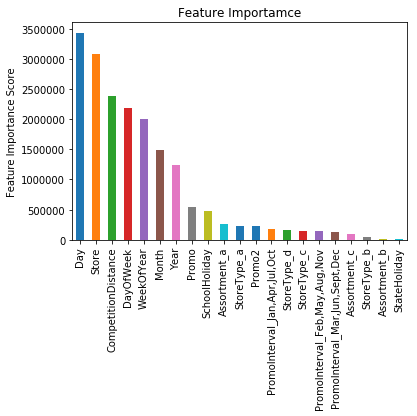

In [65]:
#clf3 特征重要度
feature_importance = pd.Series(dict(clf3.get_booster().get_fscore())).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importamce')
plt.ylabel('Feature Importance Score')

Text(0,0.5,u'Feature Importance Score')

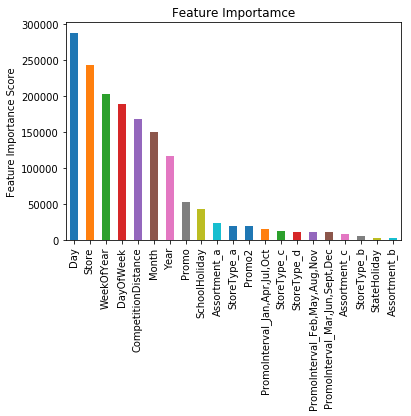

In [64]:
#clf2 特征重要度
feature_importance = pd.Series(dict(clf2.get_booster().get_fscore())).sort_values(ascending=False)
feature_importance.plot(kind='bar', title='Feature Importamce')
plt.ylabel('Feature Importance Score')